# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-15


Tentang Datasets  
Datasets ini berisi data tentang aplikasi pelayanan driver online uber dan lyft.

Problems  
Membuat Model menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing uber dan lyft.

Conceptual Problems
1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !


Answer:  
Di dalam Linear Regression memilki beberapa asumsi diantara sebagai berikut:
- Linear Relationship (hubungan linear) adalah perubahan yang terjadi secara proporsional dari variabel X Dan y. jika dibuat scatter plot 
titik-titik akan membuat bidang miring yang mendekati garis prediksi.
- No or Little Multicollinearity artinya tidak atau sedikit hubungan antara fitur. asumsi ini menggunakan method VIF
- Multivariate Normality adalah membandingkan data prediksi dengan data actual, dengan melihat pola selisih residual terhadap garis linear
- No Auto-Correlation artinya tidak ada korelasi antara nilai residual pada waktu tertentu dengan waktu sebelumnya
- Homoscedasticity adalah nilai residual konstan dimana variable yang terkait tidak berkorelasi dengan independent varibale 



---

# ii. Import Libraries

In [2]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# libraries model mechine learning
from sklearn.linear_model import LinearRegression

# libraries Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer # outlier
from sklearn.preprocessing import StandardScaler # scalling
from sklearn.preprocessing import OneHotEncoder # encoder

# Libraries model evaluation
from sklearn.metrics import r2_score, root_mean_squared_error

# Display QQ plot
import statsmodels.api as sm

# Libraries model saving
import pickle
import json


# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')





---

# iii. Data Loading

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  693071
Jumlah Kolom:  57


In [5]:
# Data 5 teratas 
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
# Data 5 Terbawah
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Catatan:
- Data memiliki baris 693071 dan Kolom 57
- Data memiliki tipe data float 29 kolom, int 17 kolom, object 11 kolom
- Melakukan drop kolom id, karena hanya identifier untuk record 

In [8]:
# drop id datasets
df.drop(columns=['id'], axis=1, inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Catatan:

Menurut deskripsi di atas rata-rata price (harga) $16.5 namun belum jelas antara uber atau lyft. untuk rata-rata temperature yaitu 39 derajat suhu panas berpotensi untuk customer memesan pelayanan uber atau lyft. dalam hal ini saya akan melakukan analisis lebih lanjut hubungan kenaikan harga.

---

# iv. Exploratory Data Analysis (EDA)

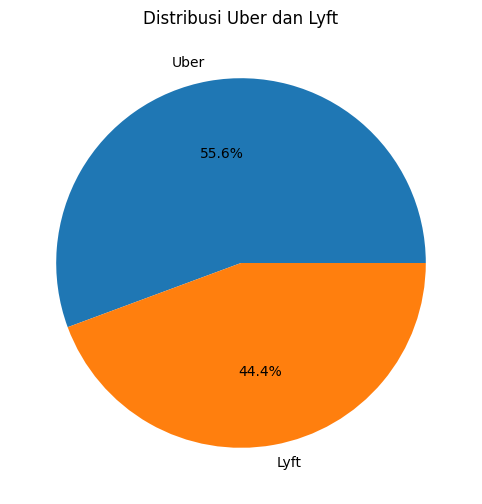

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [10]:
# Cek distribusi Uber dan lyft
plt.figure(figsize=(8,6))
df['cab_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Uber dan Lyft')
plt.ylabel('')
plt.show()
# dalam angka distribusi
df['cab_type'].value_counts()

plot data di atas menunjukan uber lebih banyak di bandingkan dengan Lyft dalam Dataset ini

- Analisis Price

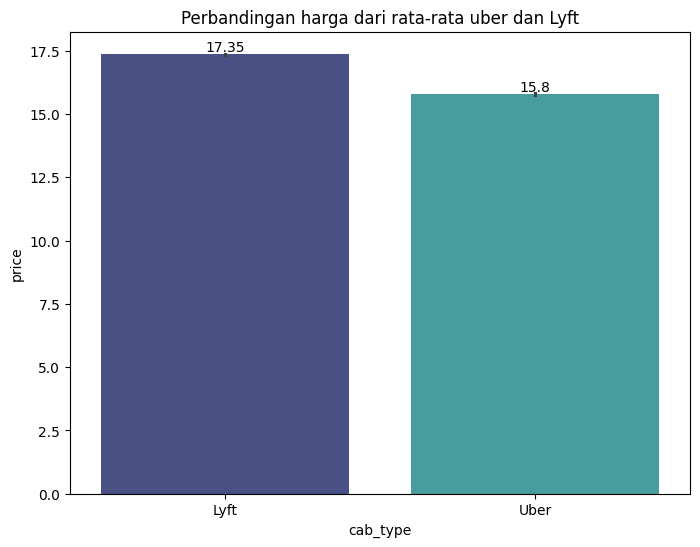

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64


In [11]:
# rata - rata price dari uber dan lyft
plt.figure(figsize=(8,6))
sns.barplot(x='cab_type', y='price', data=df, estimator=np.mean,palette='mako').set_title('Perbandingan harga dari rata-rata uber dan Lyft')
for index, value in enumerate(df.groupby('cab_type')['price'].mean()):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()
# distribusi dalam angka
print(df.groupby('cab_type')['price'].mean())

Plot diatas menunjukan harga rata-rata dari Lyft lebih mahal di bandingkan uber, yaitu lyft $17.35 sedangkan uber $15.8

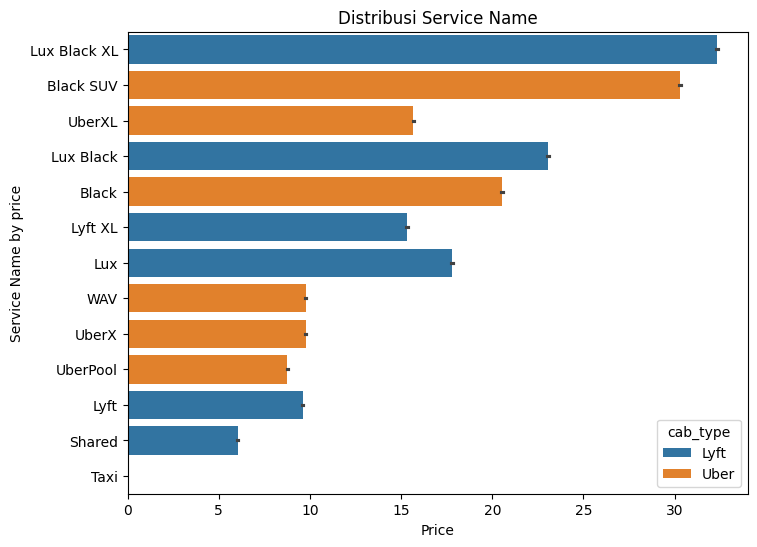

cab_type  name        
Lyft      Lux             17.771240
          Lux Black       23.062468
          Lux Black XL    32.324086
          Lyft             9.610885
          Lyft XL         15.309363
          Shared           6.029893
Uber      Black           20.523786
          Black SUV       30.286763
          Taxi                  NaN
          UberPool         8.752500
          UberX            9.765074
          UberXL          15.678144
          WAV              9.765019
Name: price, dtype: float64


In [12]:
# plot data distribusi service name berdasarkan price
plt.figure(figsize=(8, 6))
df_sorted = df.sort_values(by='price', ascending=False)

sns.barplot(x='price', y='name', data=df_sorted, hue='cab_type', estimator=np.mean)

plt.title('Distribusi Service Name')
plt.xlabel('Price')
plt.ylabel('Service Name by price')

plt.show()

# distribusi dalam angka
print(df.groupby(['cab_type', 'name'])['price'].mean())

Berdasarkan plot di atas bahwa harga tinggi adalah service premium, namun untuk harga uber cenderung lebih rendah dibandingkan dengan lyft.
adanya taxi saya asumsikan bahwa missing value atau payment tertentu.

In [13]:
df[df['name']=='Shared']

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
8,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,lyft_line,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
22,1.543545e+09,2,30,11,2018-11-30 02:28:04,America/New_York,North Station,Haymarket Square,Lyft,lyft_line,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
32,1.543289e+09,3,27,11,2018-11-27 03:30:22,America/New_York,North Station,Northeastern University,Lyft,lyft_line,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
44,1.543400e+09,10,28,11,2018-11-28 10:17:07,America/New_York,North Station,South Station,Lyft,lyft_line,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693015,1.543513e+09,17,29,11,2018-11-29 17:38:01,America/New_York,Northeastern University,Beacon Hill,Lyft,lyft_line,...,0.0000,1543510800,34.83,1543550400,45.03,1543510800,30.90,1543550400,38.93,1543510800
693019,1.543808e+09,3,3,12,2018-12-03 03:28:02,America/New_York,North End,Back Bay,Lyft,lyft_line,...,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
693029,1.544757e+09,3,14,12,2018-12-14 03:05:08,America/New_York,Northeastern University,Beacon Hill,Lyft,lyft_line,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
693038,1.543364e+09,0,28,11,2018-11-28 00:15:22,America/New_York,North End,Beacon Hill,Lyft,lyft_line,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000


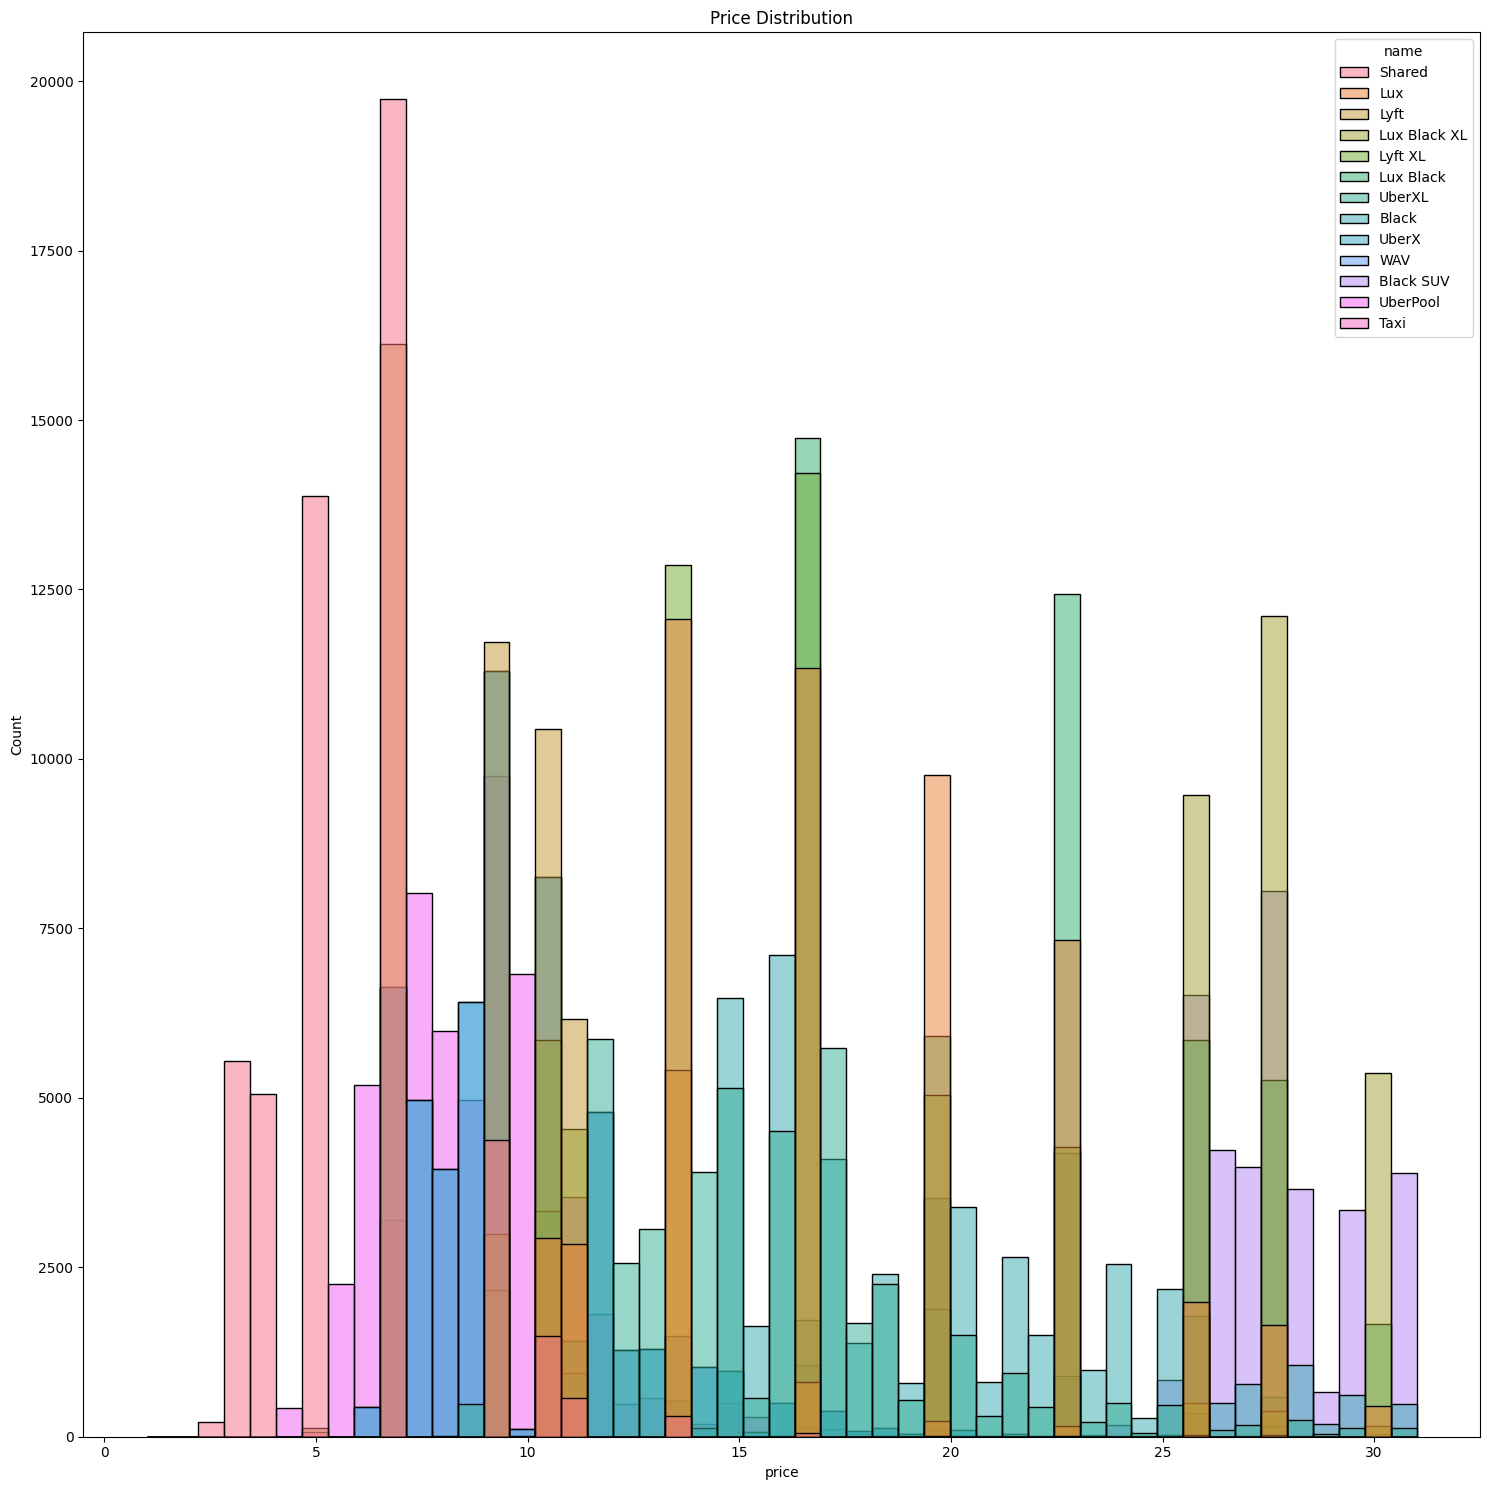

In [14]:
# plot data price berdasarkan nama service dengan performance

plt.figure(figsize=(15,15))
sns.histplot(x='price', data=df,bins=np.linspace(1,31),hue='name')
plt.title('Price Distribution')
plt.tight_layout()
plt.show()

plot data di atas Shared service yang mendominasi di datasets. dalam hal pelayanan shared service memiliki cost rendah dan dengan cara berbagi dengan penumpang lain, yang mana service tersebut tidak ada di uber.

- Time Analisis

month
12    406614
11    286457
Name: count, dtype: int64

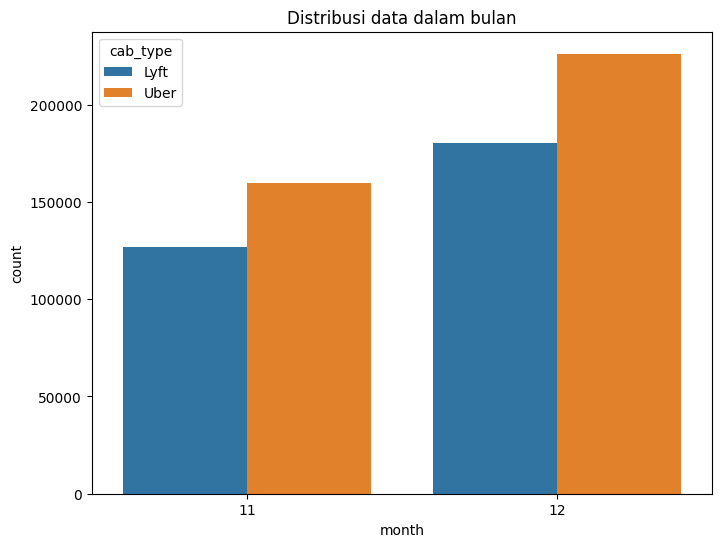

In [15]:
# Distribusi bulan
plt.figure(figsize=(8,6))
sns.countplot(x='month', data=df, hue='cab_type')
plt.title('Distribusi data dalam bulan')
df['month'].value_counts()

Distribusi data dalam bulan di dataset hanya memiliki bulan 11 dan 12. dalam hal ini Uber lebih dominan di bandingkan dengan lyft atau customer lebih banyak di uber dari pada di lyft

In [16]:
# Cek hari apa yang memiliki customer terbanyak
daily_count = df['day'].value_counts().reset_index()
daily_count.sort_values(by='count', ascending=False)

,day,count
0,27,76121
1,28,73691
2,29,59974
3,1,45240
4,30,45084
10,17,44928
9,2,44928
8,3,44928
7,14,44928
6,15,44928


Text(0.5, 1.0, 'Distribusi Data date')

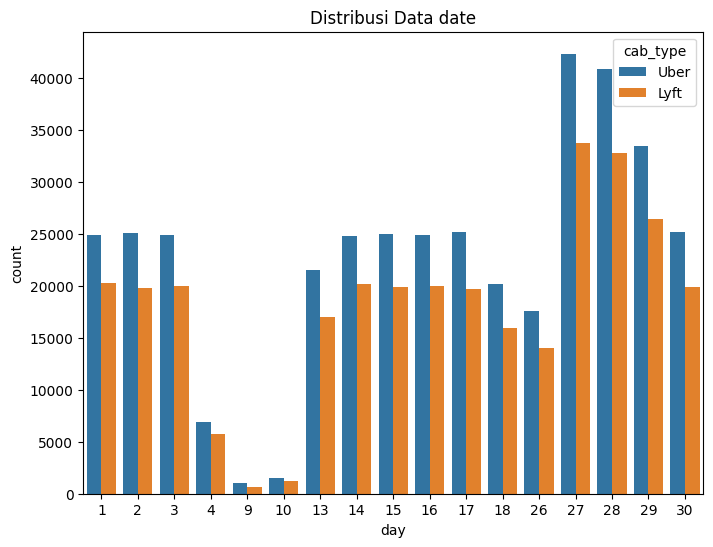

In [17]:
# Plot data hari
plt.figure(figsize=(8,6))
sns.countplot(x='day', data=df, hue='cab_type')
plt.title('Distribusi Data date')

plot data diatas menunjukan pola dimana tanggal 27 adalah service terbaik dalam dataset ini, namun ada juga penurunan di tanggal 4,9 dan 10

Text(0.5, 1.0, 'Distribusi data Hour')

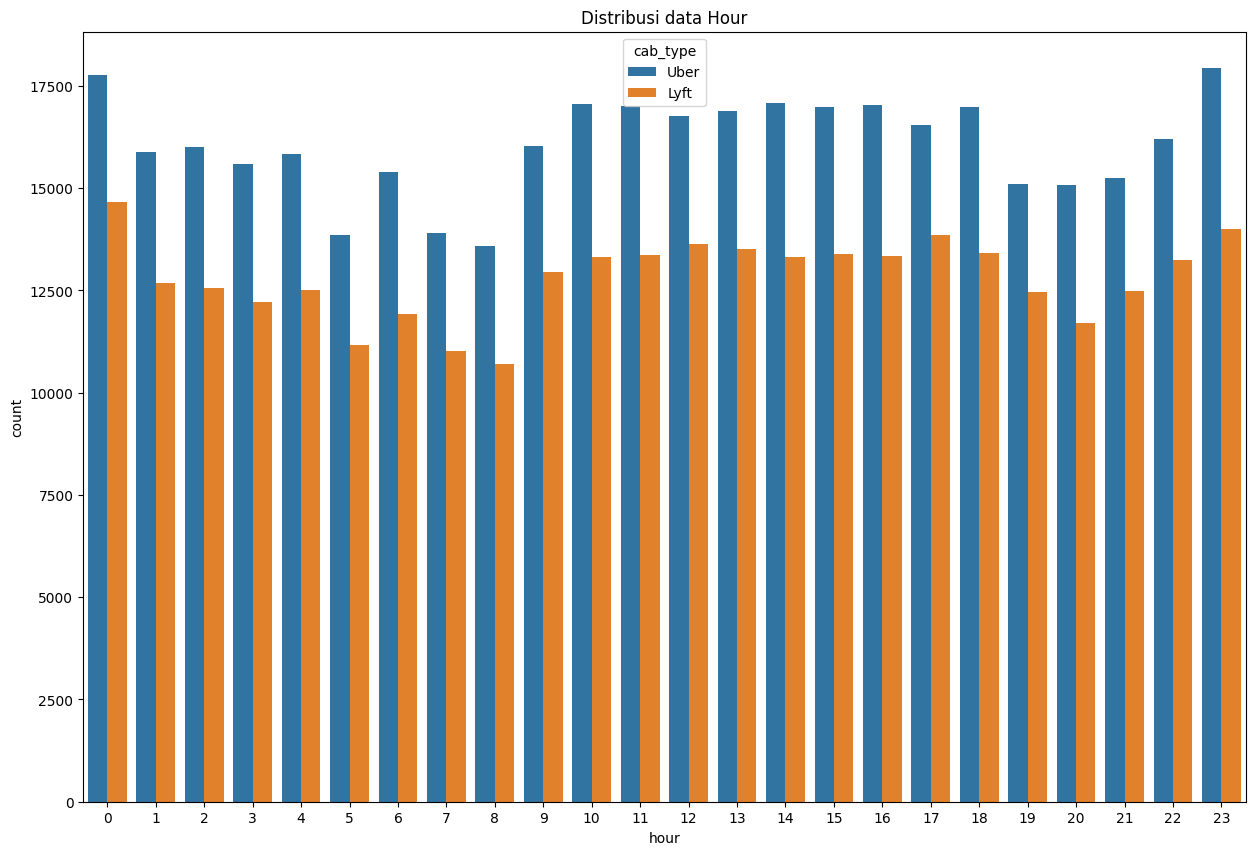

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='hour', data=df, hue='cab_type')
plt.title('Distribusi data Hour')

plot data hour beroperasi 24 jam, ada pola penurunan di jam 5,7,8 pagi, dan di jam 18,19, 20, 21

- Analisis Destination dan Source

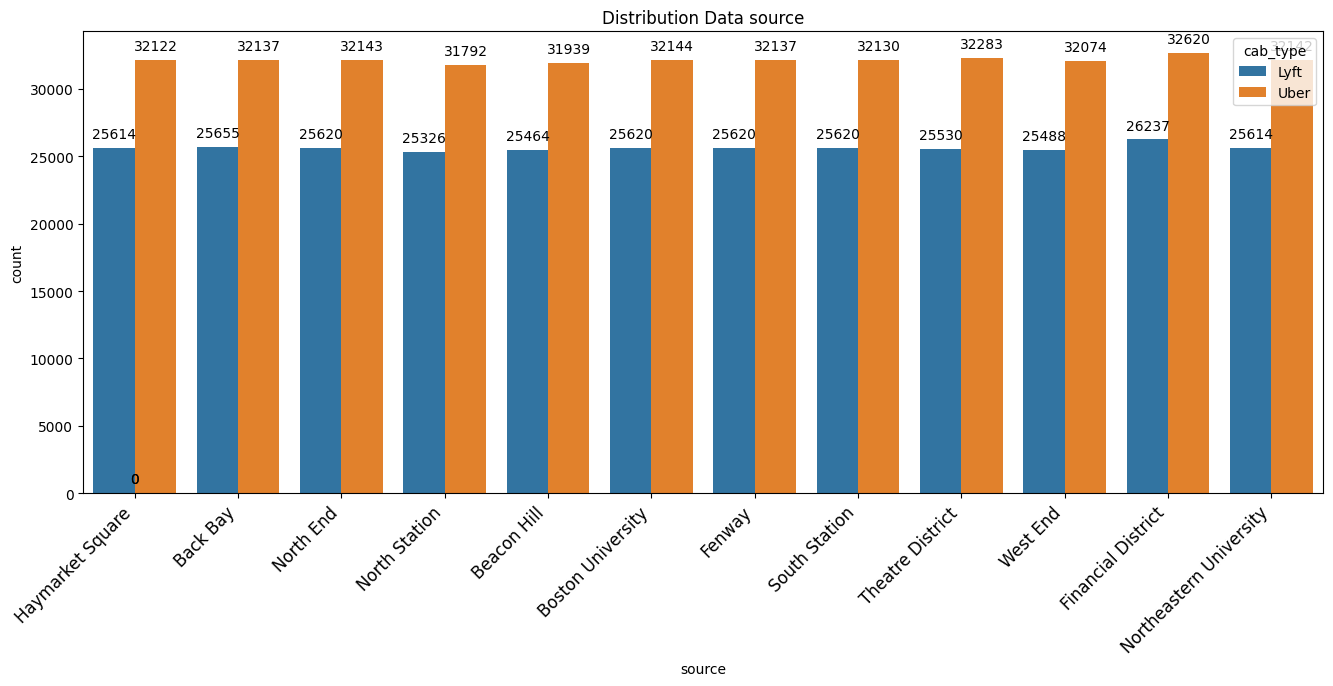

In [19]:
# plot data ditribusi source
plt.figure(figsize=(16,6))

sns.countplot(x=df['source'], data=df, hue='cab_type')
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.title('Distribution Data source')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points',
                       fontsize=10,
                       color='black')




Dari Source distribusi uniform seragam, hal ini di jelaskan customer tidak ada kecenderungan berasal dari mana yang lebih banyak berdasarkan asal order atau dimana yang lebih sedikit dari order. 

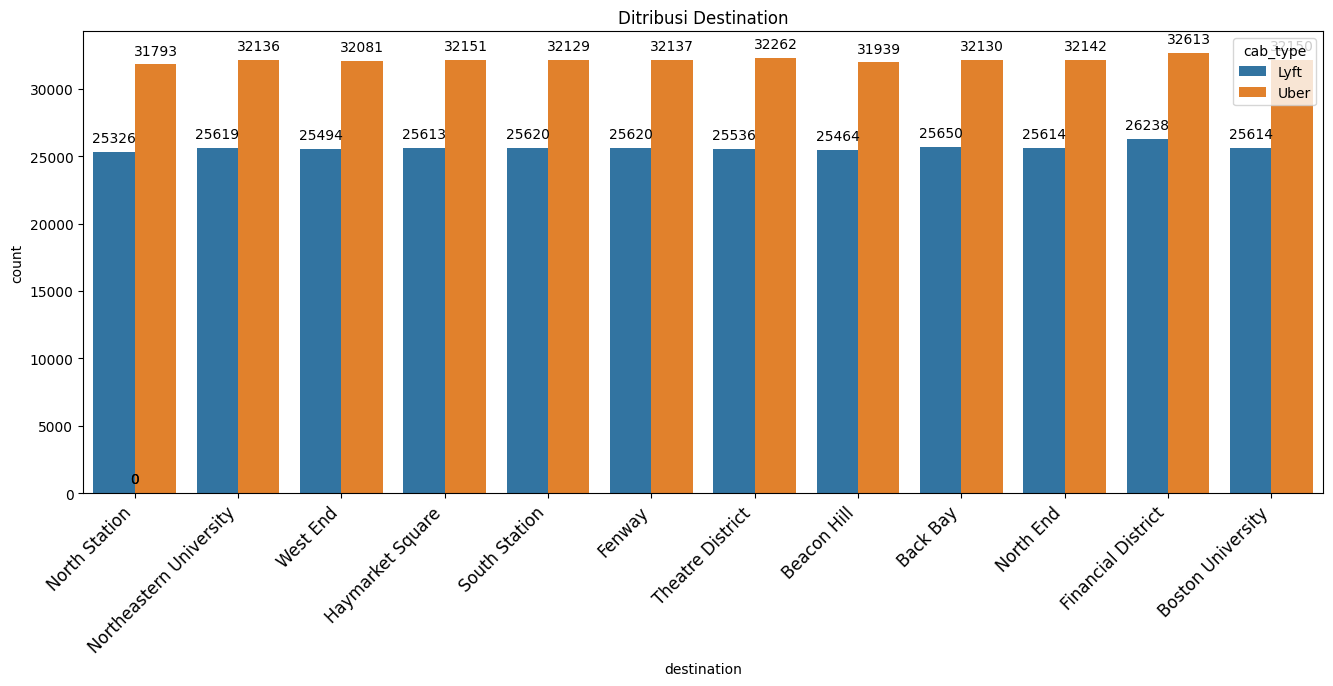

In [20]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['destination'], data=df, hue='cab_type')
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.title('Ditribusi Destination')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points',
                       fontsize=10,
                       color='black')

sama halnya tujuan tidak ada perbedaan signifikan atau pola dalam tujuan oreder.

In [21]:
data_mean_price_by_destination = df.groupby(by=["source","destination"])['price'].agg(['mean'])

pd.set_option('display.max_rows', 72)
data_mean_price_by_destination

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

hasil di atas merupakan agregate dari price dengan grouping dari asal dan tujuan. dalam hal ini bisa di jadikan model lagi untuk predict price rata-rata.

---

# v. Feature Engineering

In [22]:
# cek duplicated data
df.duplicated().sum()

1046

In [23]:
# drop data duplikat
df.drop_duplicates(inplace=True)

In [24]:
# cek duplicated data
df.duplicated().sum()

0

## Spliting Data

In [25]:
# dump dataset agar tidak mengulang
data_copy = df.copy()

In [26]:
# split data feature dan target
X = df.drop('price', axis=1)
y = df['price']

In [27]:
# Split data Train dan Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
# cek ukuran
print('Train Data')
print('Ukuran X_train : ', X_train.shape)
print('Ukuran y_train : ', y_train.shape)
print('\n')
print('Test Data')
print('Ukuran X_test : ', X_test.shape)
print('Ukuran y_test : ', y_test.shape)


Train Data
Ukuran X_train :  (553620, 55)
Ukuran y_train :  (553620,)


Test Data
Ukuran X_test :  (138405, 55)
Ukuran y_test :  (138405,)


## Checking cardinality

In [29]:
# split data list kategorikal dan numerik agar mudah di analisis
cat = X_train.select_dtypes(include=['object']).columns.to_list()
num = X_train.select_dtypes(include=np.number).columns.to_list()

In [30]:
df[cat].head()

,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [31]:
df[cat].nunique()

datetime         31350
timezone             1
source              12
destination         12
cab_type             2
product_id          13
name                13
short_summary        9
long_summary        11
icon                 7
dtype: int64

Di kategorik tidak ada yang di decrease cardinality karena sudah mewakili semua informasi. untuk long_summary bisa diwakili informasinya  dengan short_summry atau icon lebih baik, abaikan sekarang mungkin bisa saja berkolerasi terhadap y target(price)

In [32]:
df[num].head()

,timestamp,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,0.44,1.0,42.2148,-71.033,42.34,37.12,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,0.44,1.0,42.2148,-71.033,43.58,37.35,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,0.44,1.0,42.2148,-71.033,38.33,32.93,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,0.44,1.0,42.2148,-71.033,34.38,29.63,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,0.44,1.0,42.2148,-71.033,37.44,30.88,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [33]:
df[num].nunique()

timestamp                      36179
hour                              24
day                               17
month                              2
distance                         549
surge_multiplier                   7
latitude                          11
longitude                         12
temperature                      308
apparentTemperature              319
precipIntensity                   63
precipProbability                 29
humidity                          51
windSpeed                        291
windGust                         286
windGustTime                      25
visibility                       227
temperatureHigh                  129
temperatureHighTime               23
temperatureLow                   133
temperatureLowTime                31
apparentTemperatureHigh          124
apparentTemperatureHighTime       27
apparentTemperatureLow           136
apparentTemperatureLowTime        32
dewPoint                         313
pressure                         316
w

Sama untuk numerikal tidak ada informasi yang dapat di decrease cardinality, karena kebanyakan continues data

## Handling Missing Value

In [34]:
# cek missing values 
X_train.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTe

In [35]:
null_values = X_test.isnull()
null_count = null_values.sum()
print(null_count)

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTe

Tidak ada missing value di Feature

In [36]:
null_values = y_test.isnull()
null_count = null_values.sum()
print(null_count)

10773


In [37]:
null_values = y_test.isnull()
null_count = null_values.sum()
print(null_count)

10773


Di target price memilki missing value sebesar 43657 di y_train dan 11046 di y_test, sehingga harus cek pola apa jenis missing value

In [38]:
# Menggunakan df mempermudah analisis
df[df.price.isnull()].head().T

,18,31,40,60,69
timestamp,1543673584.211,1543794776.318,1543523885.298,1544731816.318,1543583283.653
hour,14,23,20,20,13
day,1,2,29,13,30
month,12,12,11,12,11
datetime,2018-12-01 14:13:04,2018-12-02 23:52:56,2018-11-29 20:38:05,2018-12-13 20:10:16,2018-11-30 13:08:03
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,North End,Beacon Hill,North Station,North End,North End
destination,West End,South Station,Fenway,West End,Beacon Hill
cab_type,Uber,Uber,Uber,Uber,Uber
product_id,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a


Dari pola tersebut uber dengan name service taxi mengabaikan price yanga mana taxi tersebut tidak tentu dalama hal pembayaran atau tidak menerima order dari uber. sehingga Missing value adalah MCAR. saya memlakukan drop karane price berpengaruh terhdap model.

In [39]:
# Saving the target's null values index
nulYtrain = y_train[y_train.isnull()].index.tolist()
nulYtest = y_test[y_test.isnull()].index.tolist()
# Drop Missing Value

X_train_cleaned = X_train.drop(index=nulYtrain)
X_test_cleaned = X_test.drop(index=nulYtest)

y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

In [40]:
# cek ukuran
print('Train Data')
print('Ukuran X_train : ', X_train_cleaned.shape)
print('Ukuran y_train : ', y_train.shape)
print('')
print('Test Data')
print('Ukuran X_test : ', X_test_cleaned.shape)
print('Ukuran y_test : ', y_test.shape)

Train Data
Ukuran X_train :  (509690, 55)
Ukuran y_train :  (509690,)

Test Data
Ukuran X_test :  (127632, 55)
Ukuran y_test :  (127632,)


## Handiling Outlier

In [41]:
# Filter Numerical Columns into Variable
kolom_numerik = X_train_cleaned.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in kolom_numerik:
    skewness = X_train_cleaned[kolom].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

In [42]:
# Showing Normally distributed columns
data_norm = pd.DataFrame(data=data_numerik_normal, columns=['kolom_terdistribusi_normal', 'skewness'])
data_norm

,kolom_terdistribusi_normal,skewness
0,timestamp,0.432221
1,hour,-0.046495
2,day,-0.377093
3,month,-0.350442
4,longitude,-0.356111
5,apparentTemperature,-0.393095
6,humidity,-0.074675
7,windSpeed,0.450261
8,windGustTime,0.438606
9,temperatureHigh,0.076354


In [43]:
# Showing skewed columns
data_skew = pd.DataFrame(data=data_numerik_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

,kolom_skewed,skewness
0,distance,0.818504
1,surge_multiplier,7.941726
2,latitude,-2.113129
3,temperature,-0.611115
4,precipIntensity,3.328000
5,precipProbability,2.028337
6,windGust,1.117821
7,visibility,-1.507593
8,apparentTemperatureLow,-0.503465
9,windBearing,-0.626902


In [44]:
# Input low variation columns into variable
kolom_low_variation = ['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# Drop the low variation columns in skewed columns, and add it into normal distribution columns
for kolom in kolom_low_variation:
    kolom_numerik_skewed.remove(kolom) #-> removing low variation columns in skewed columns
    kolom_numerik_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [45]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train_cleaned)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test_cleaned)

In [46]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_cleaned)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_cleaned)

In [47]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

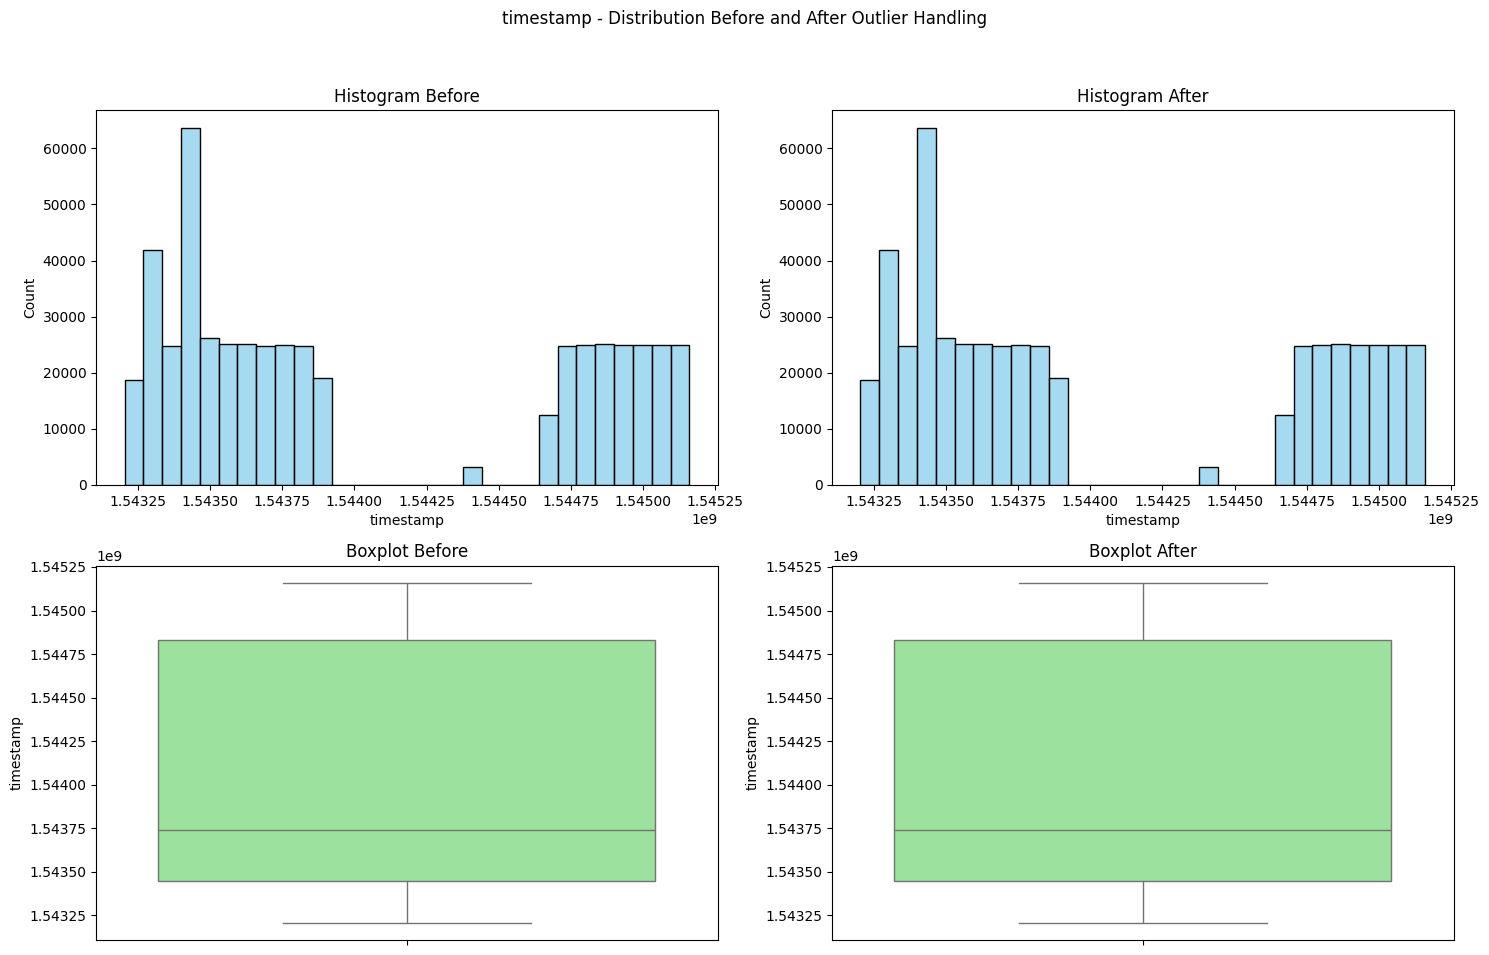

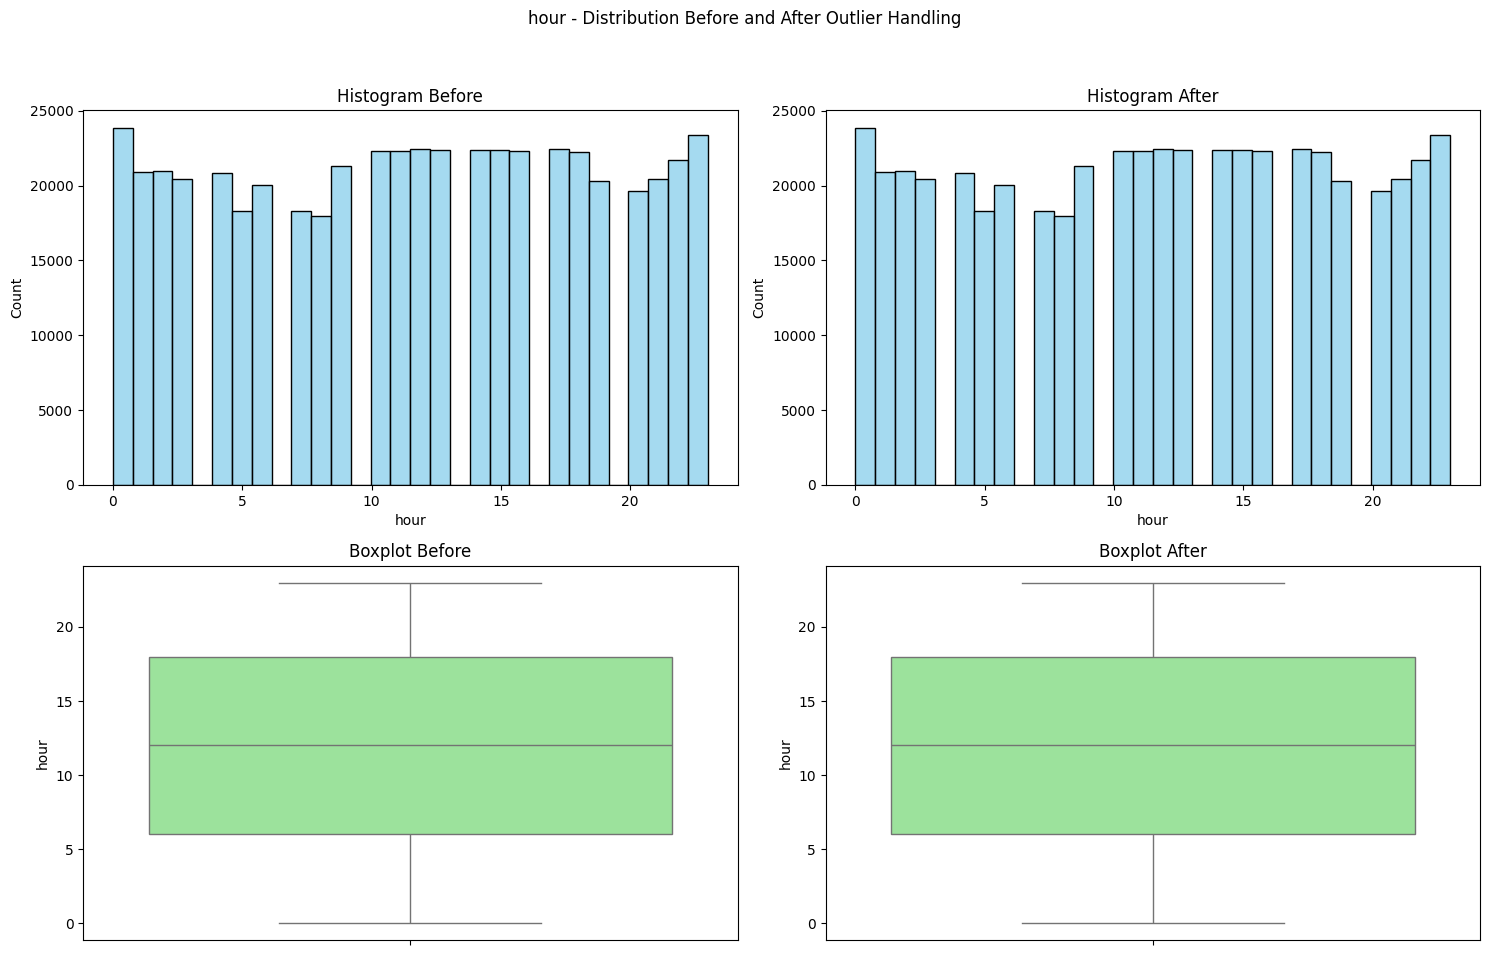

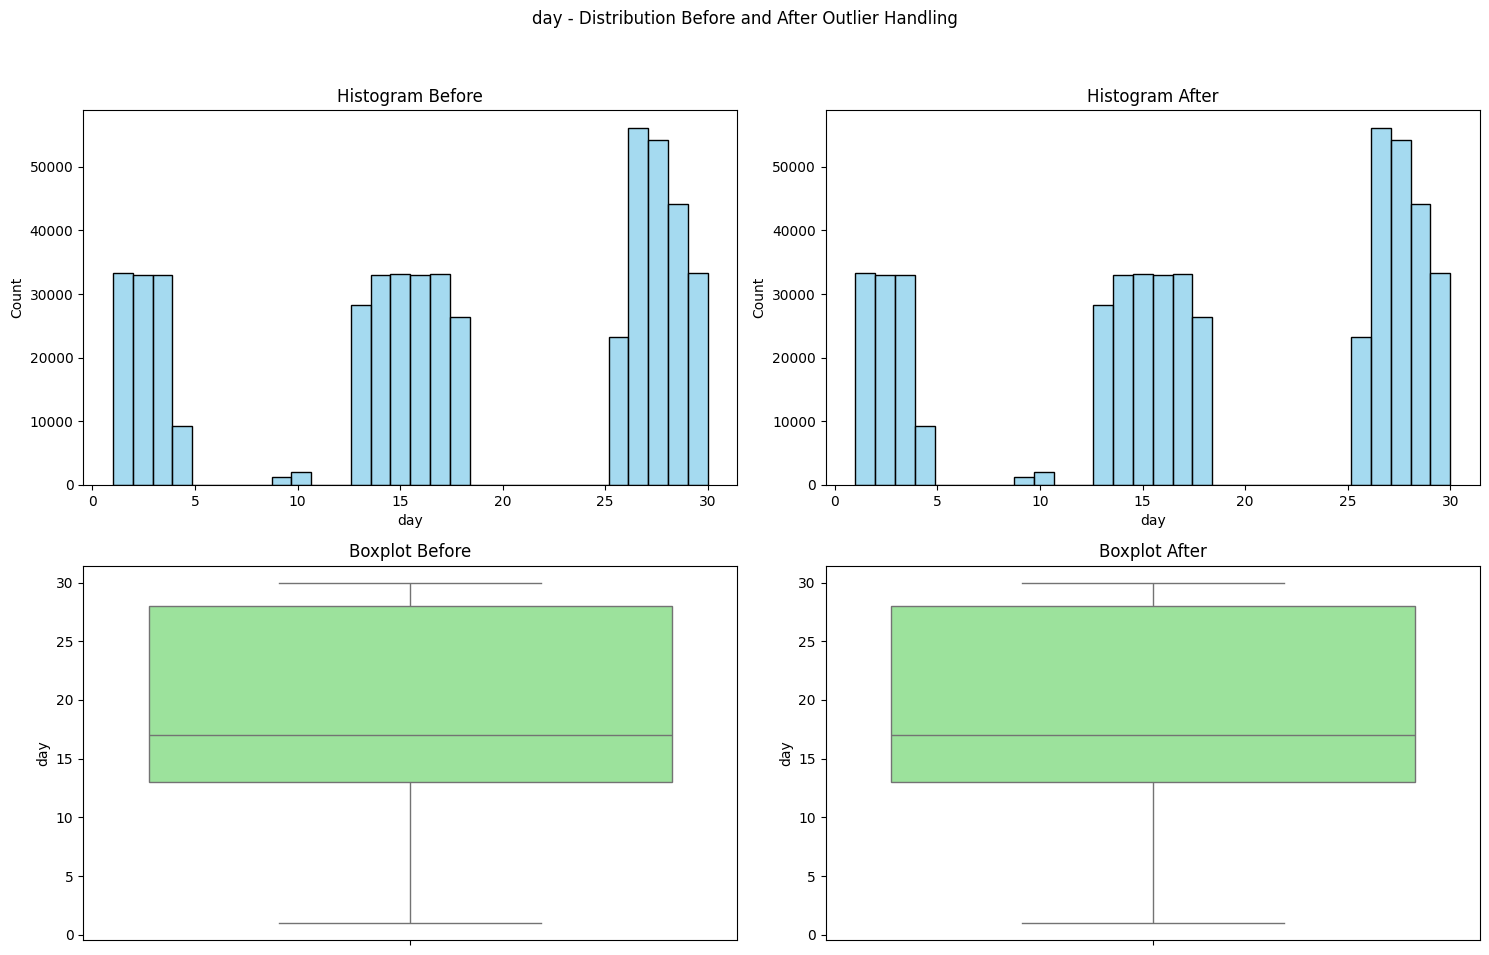

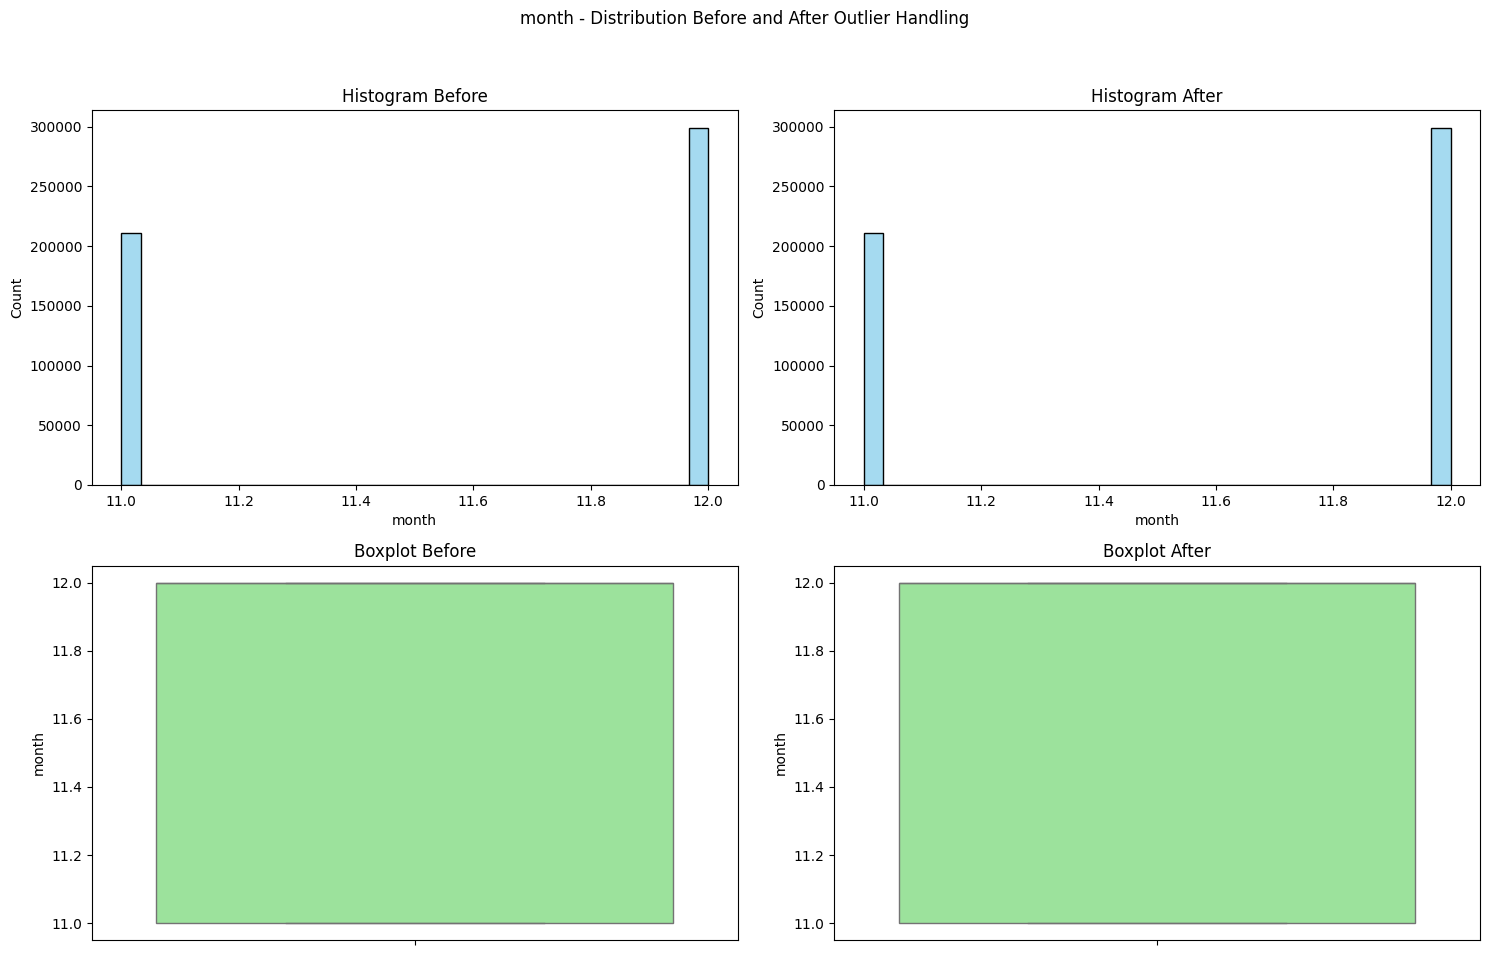

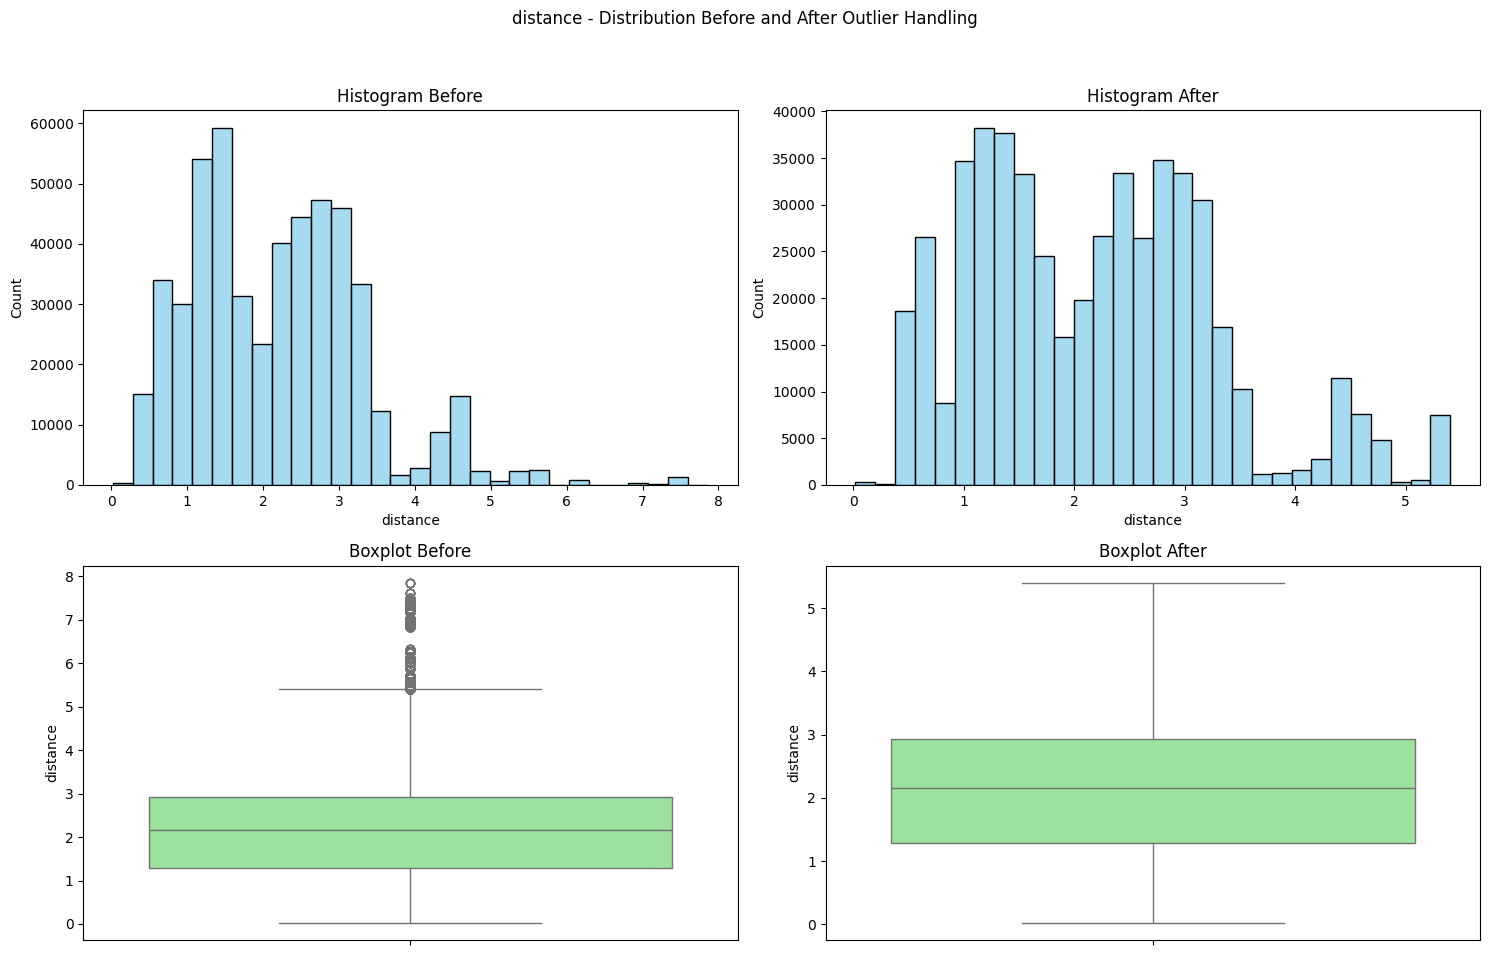

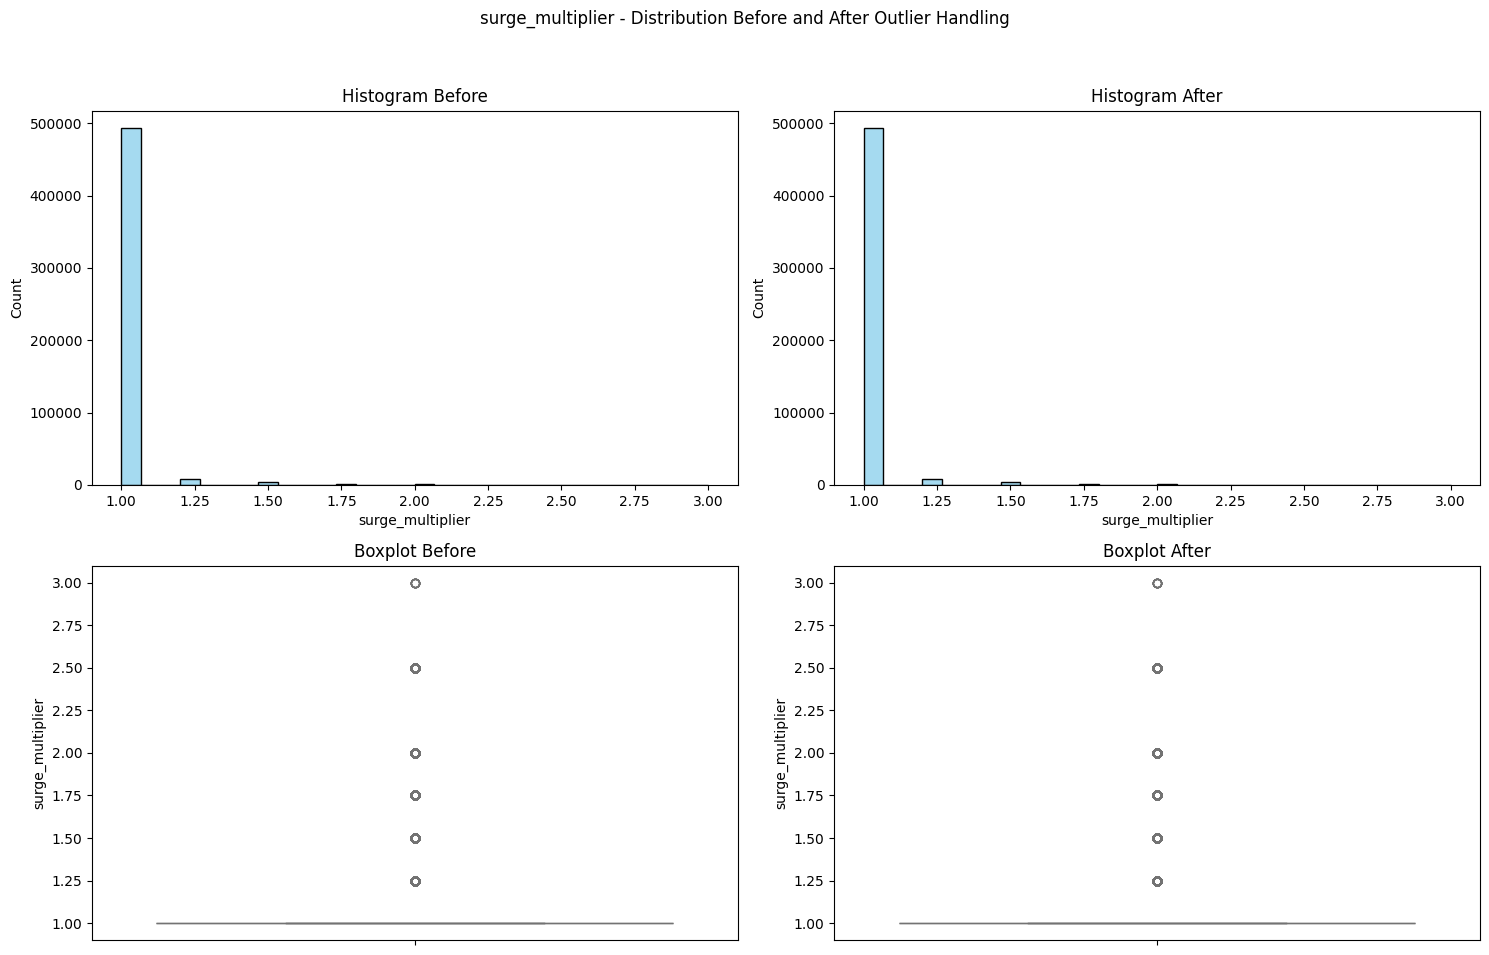

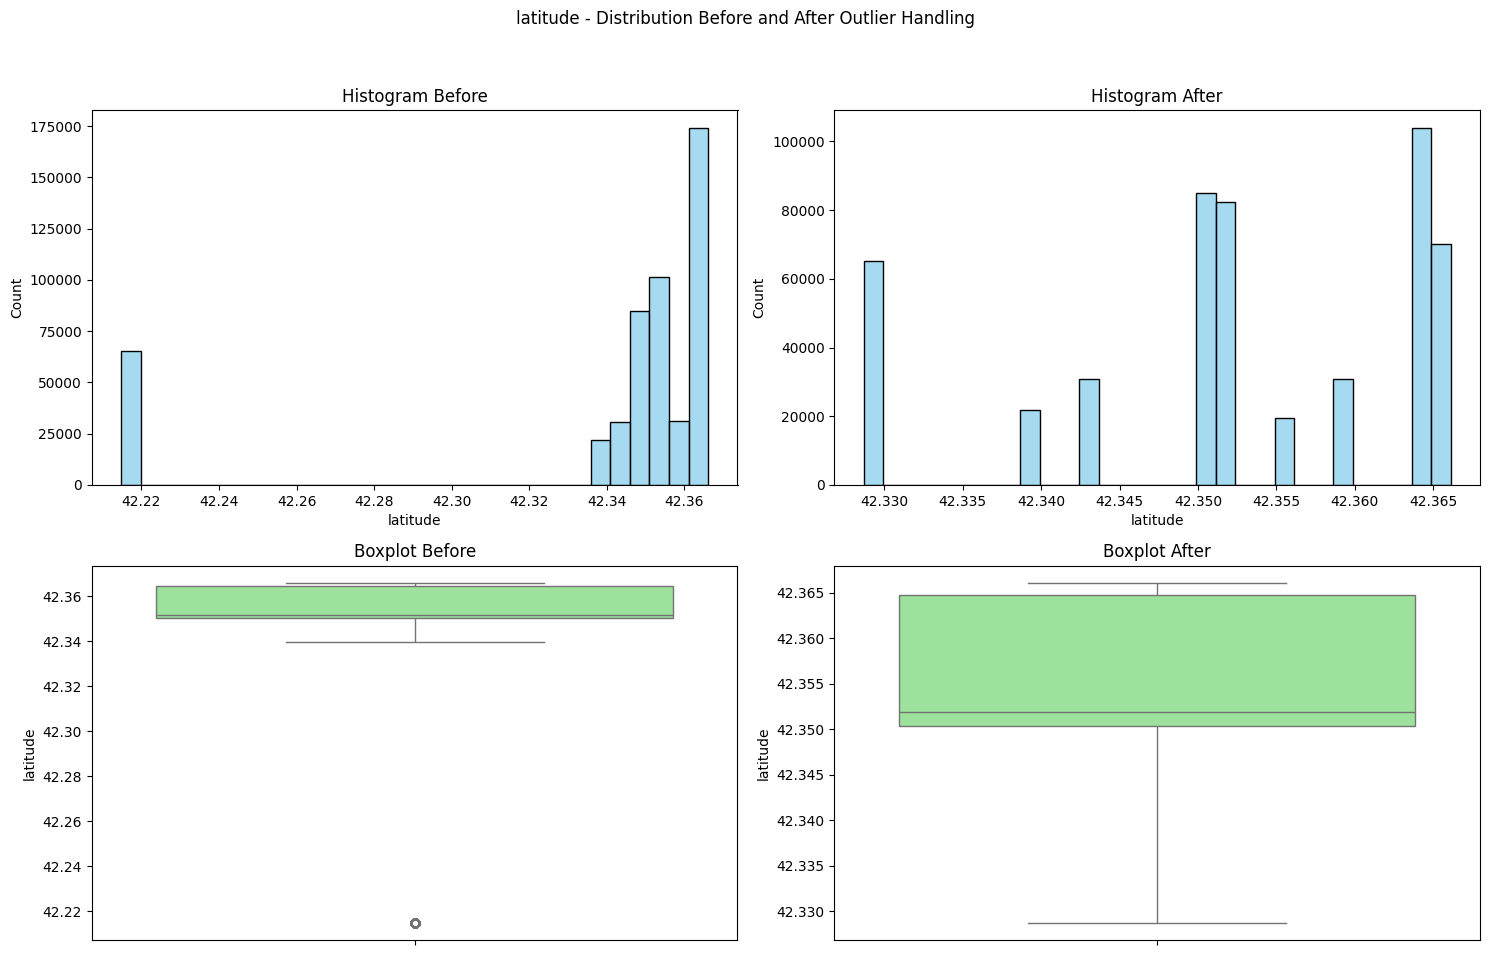

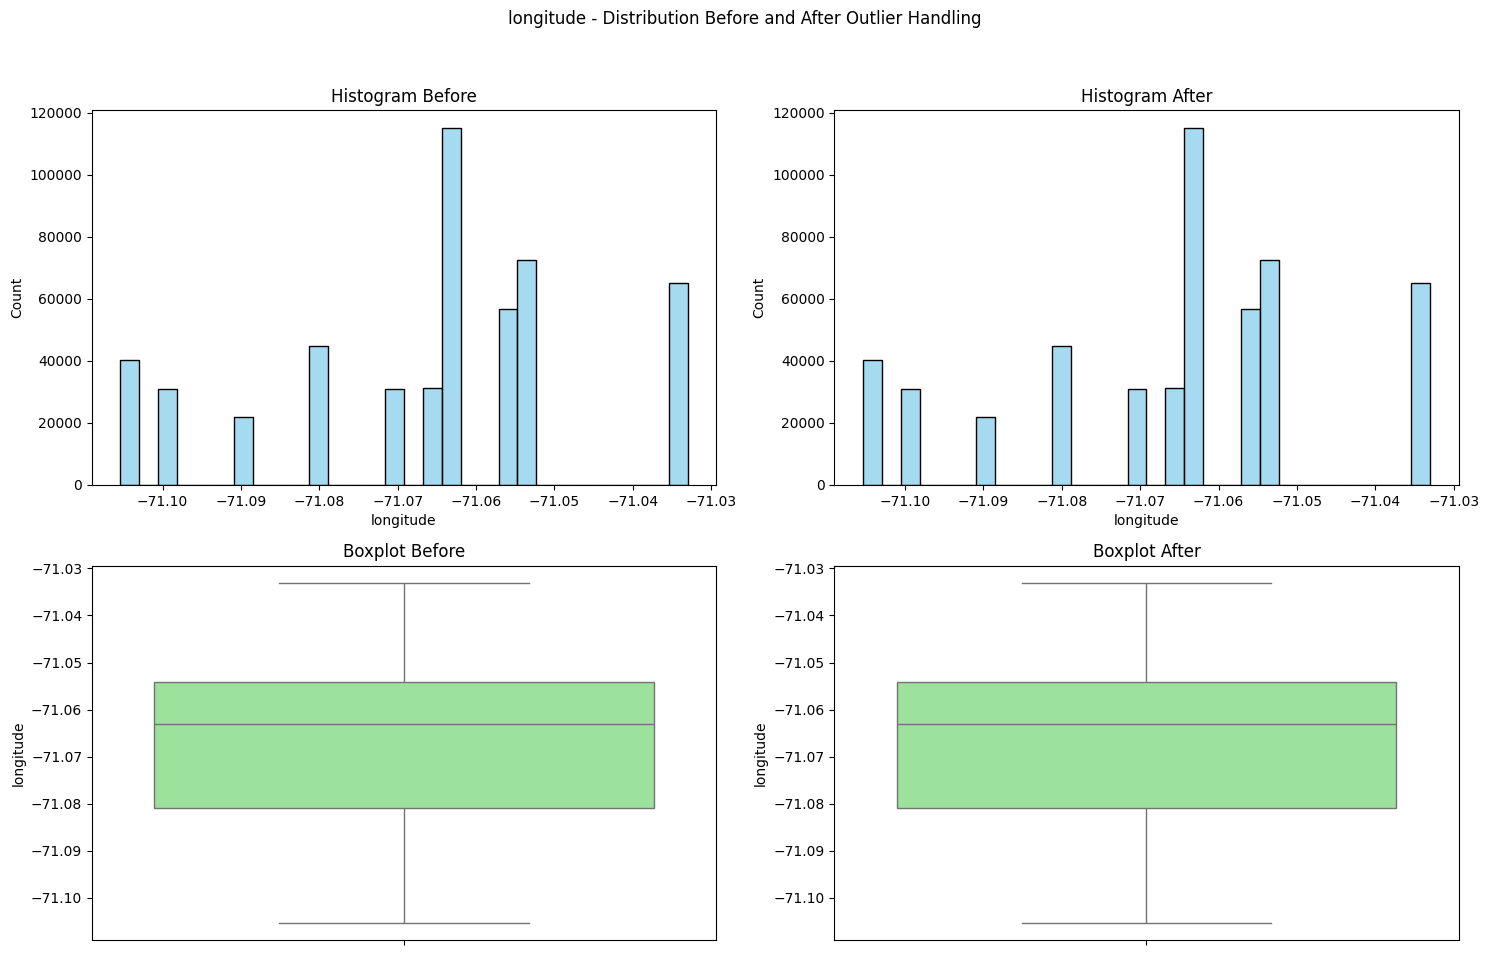

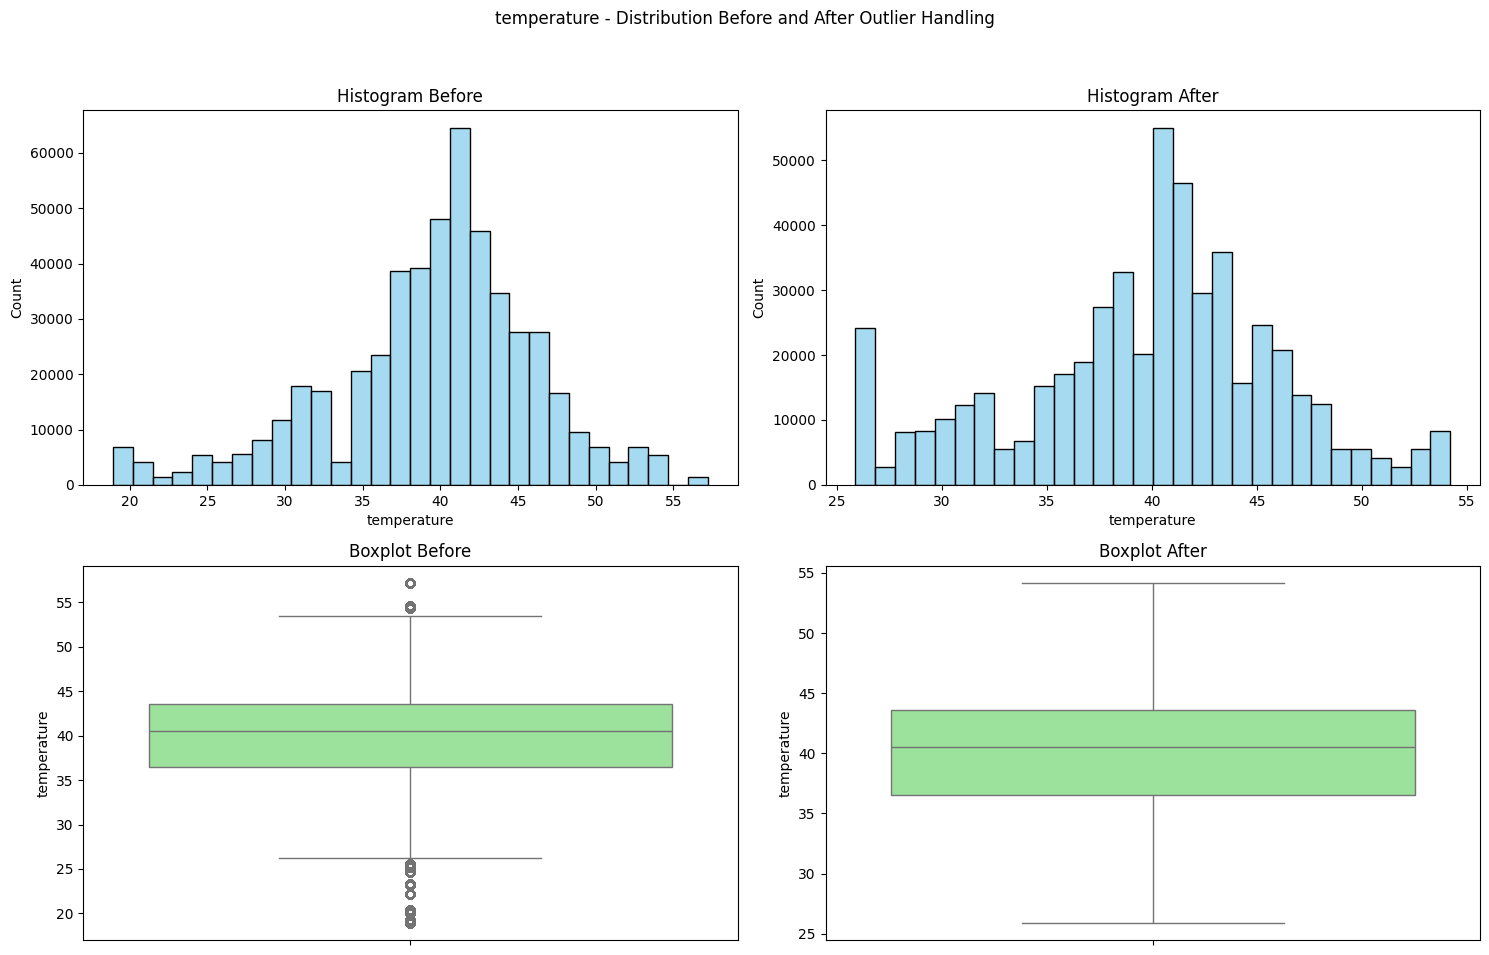

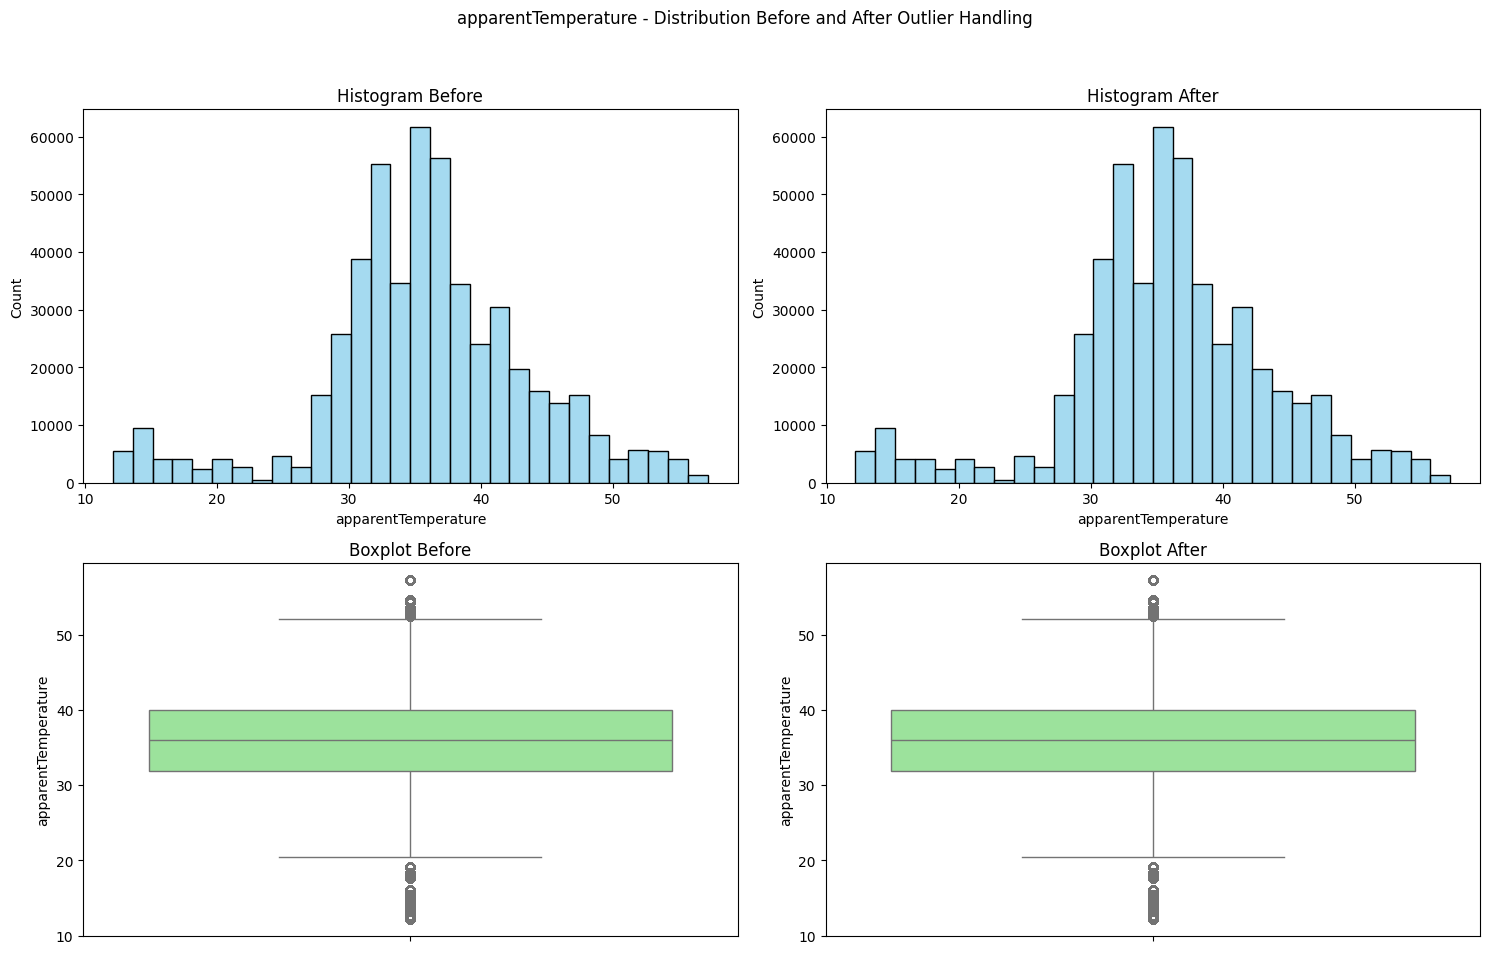

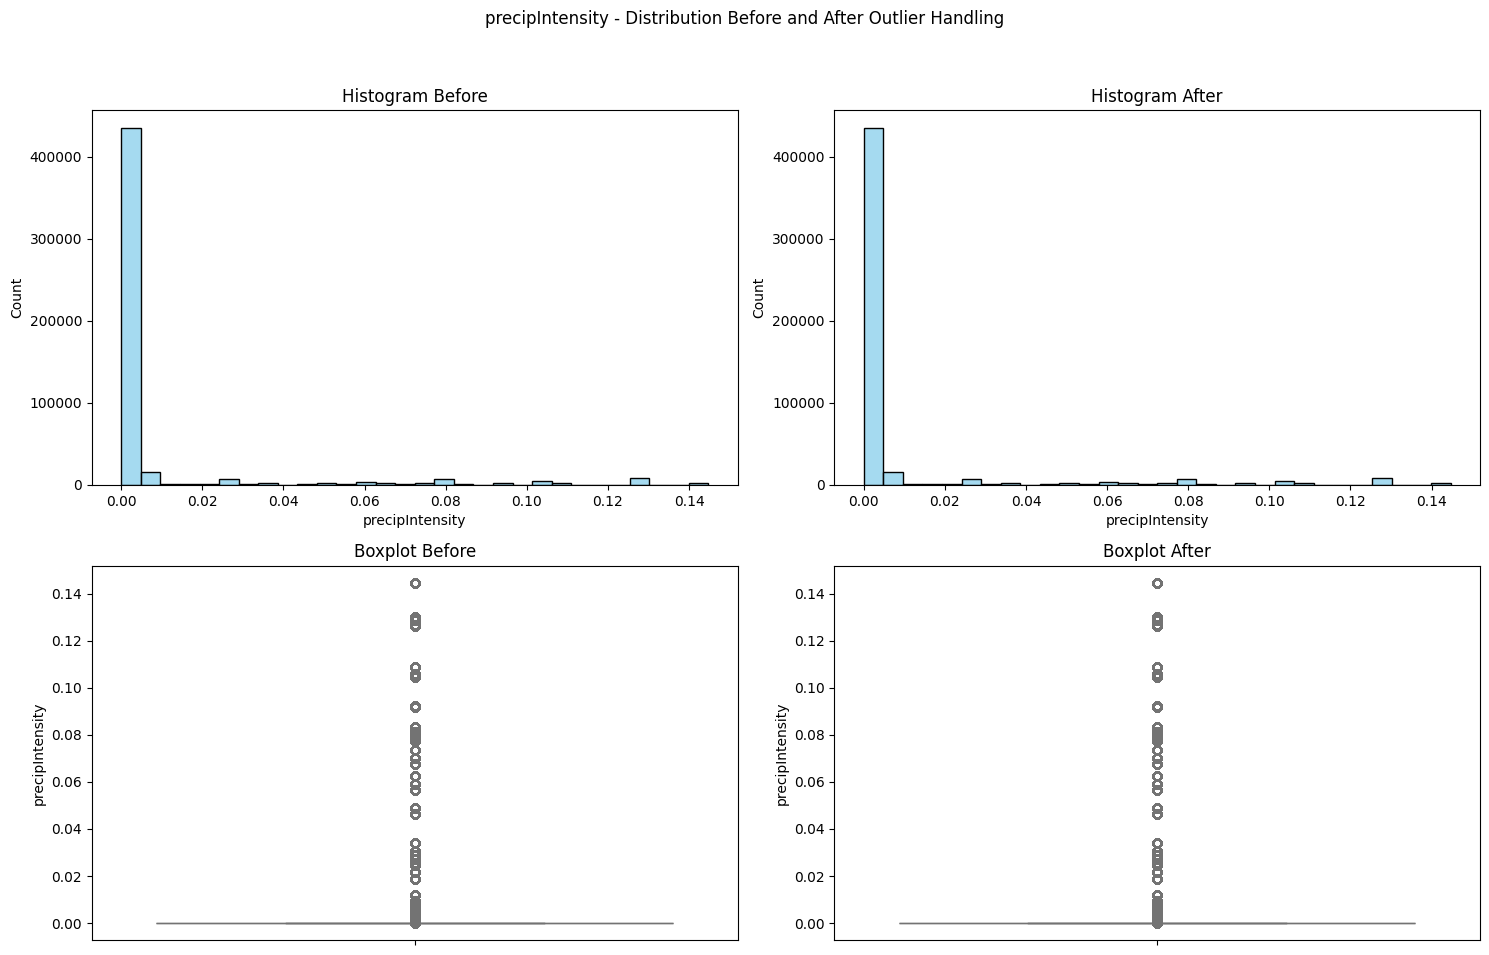

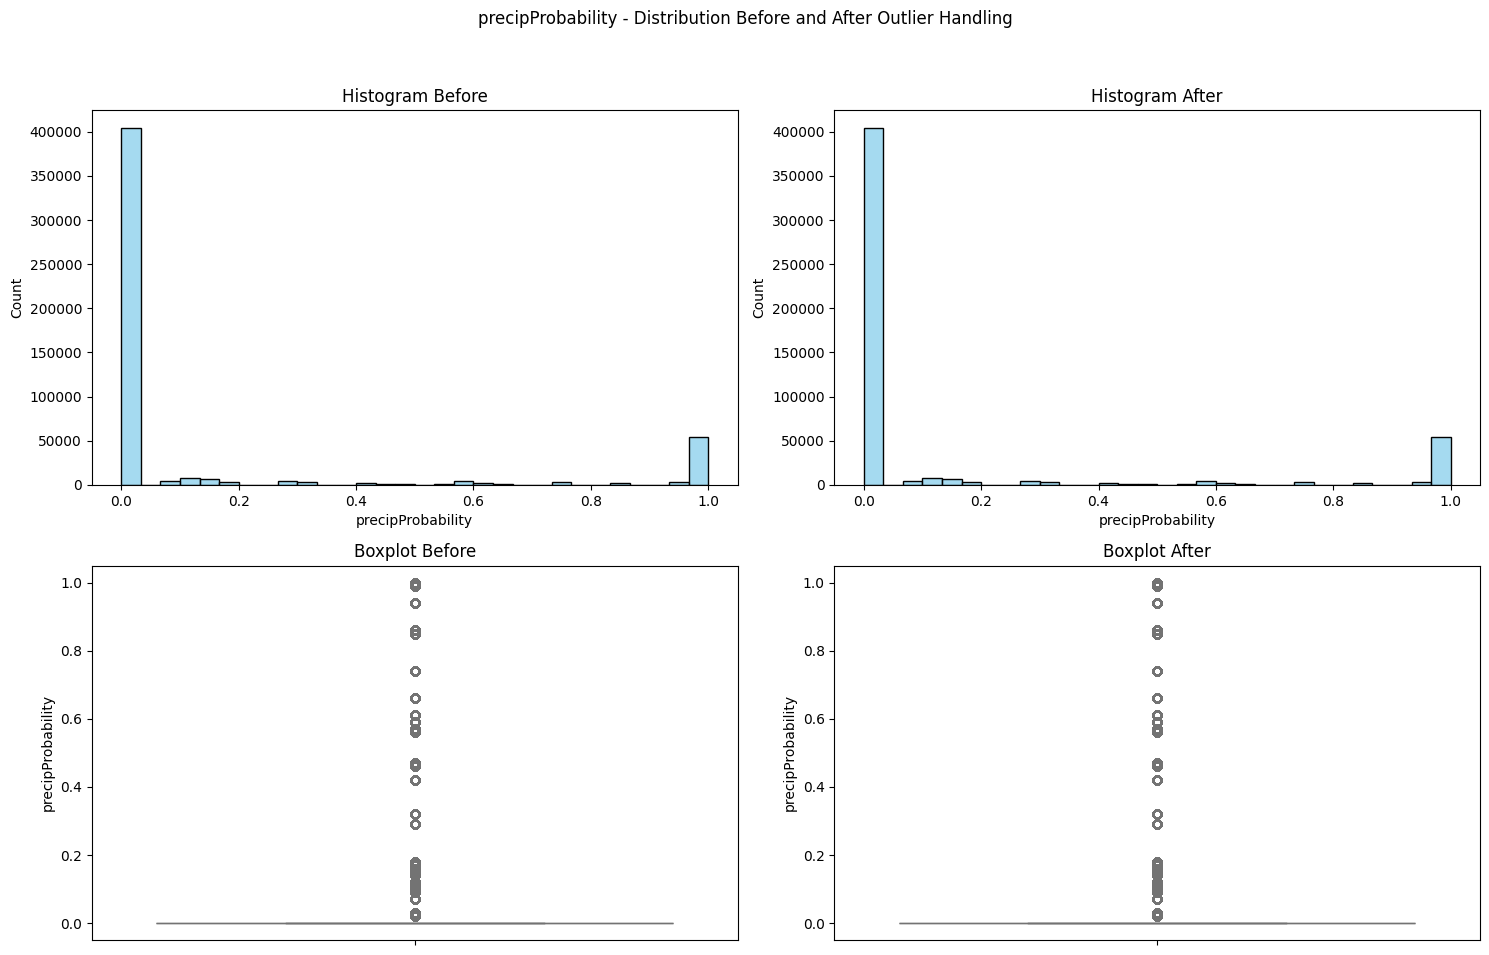

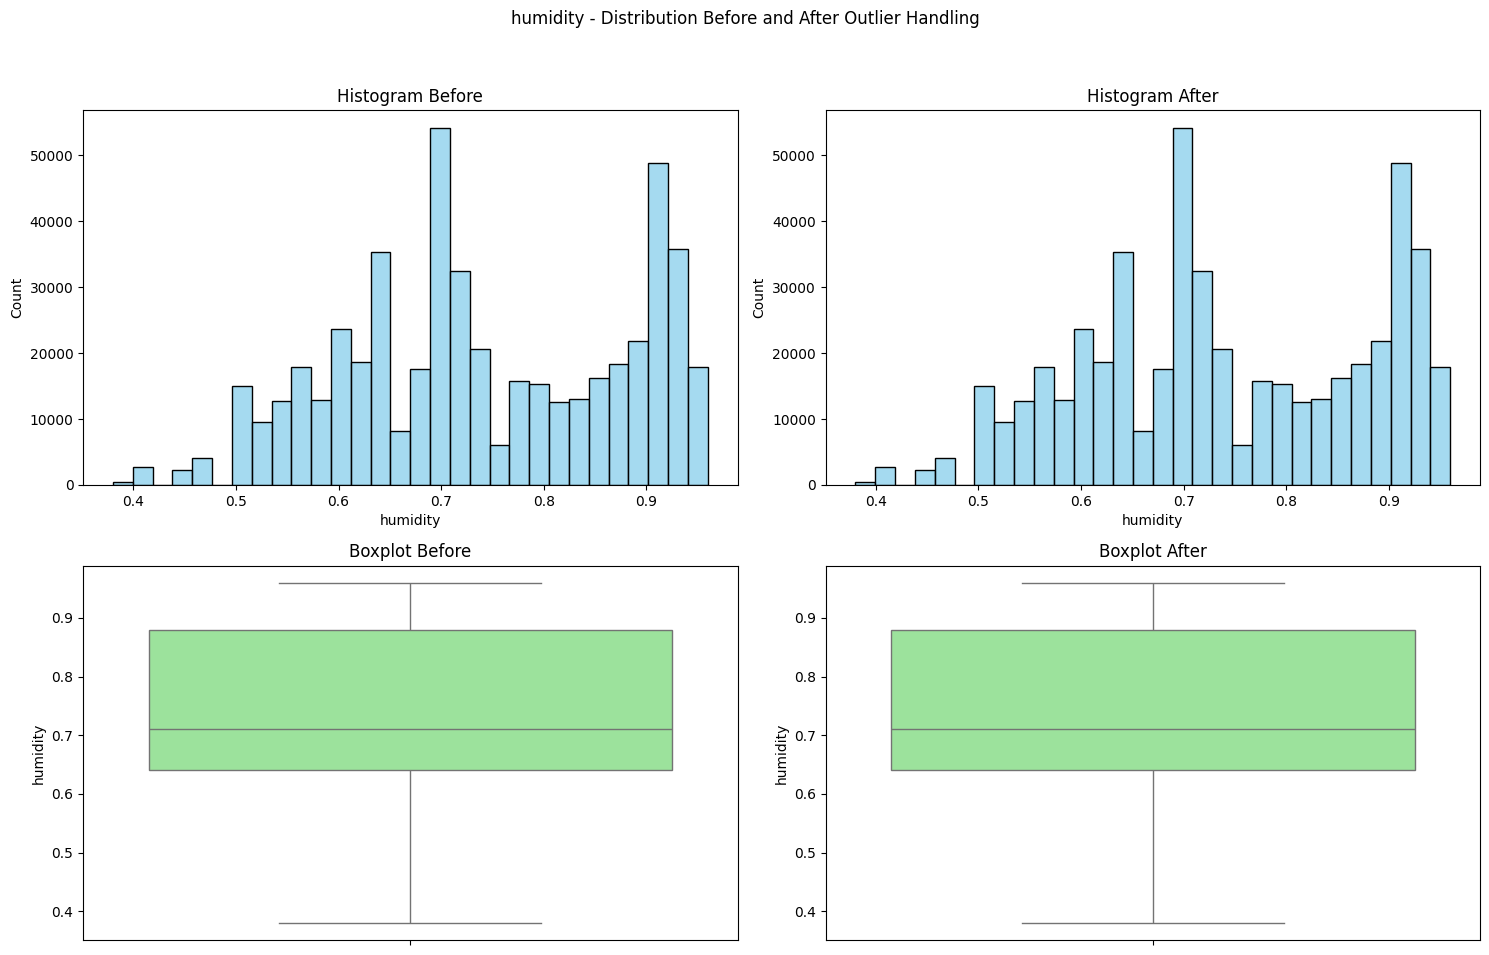

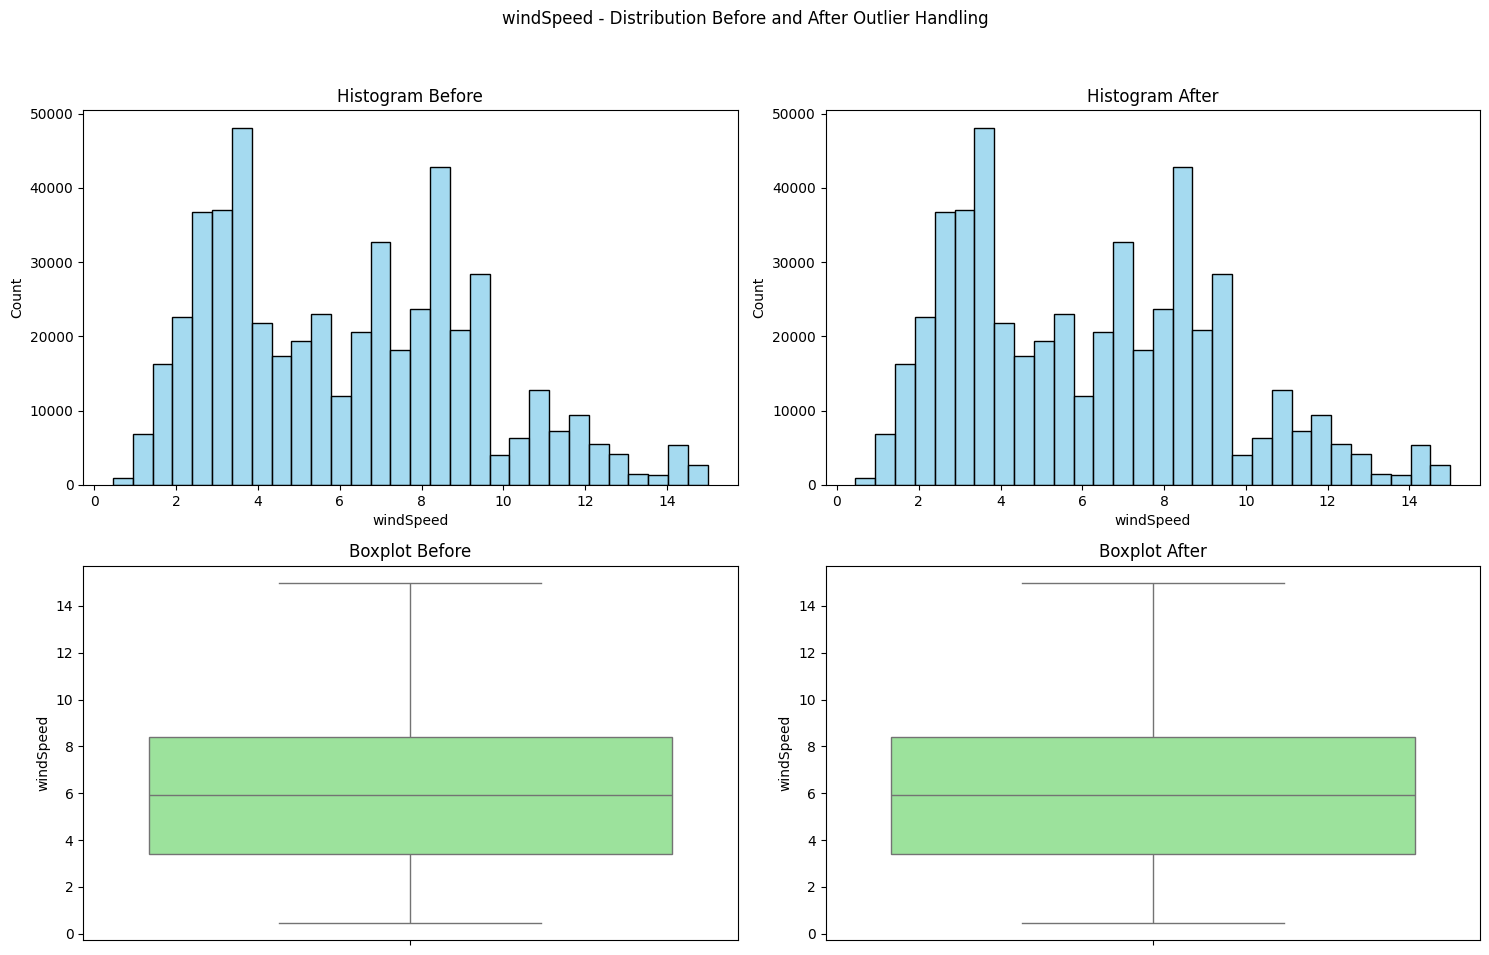

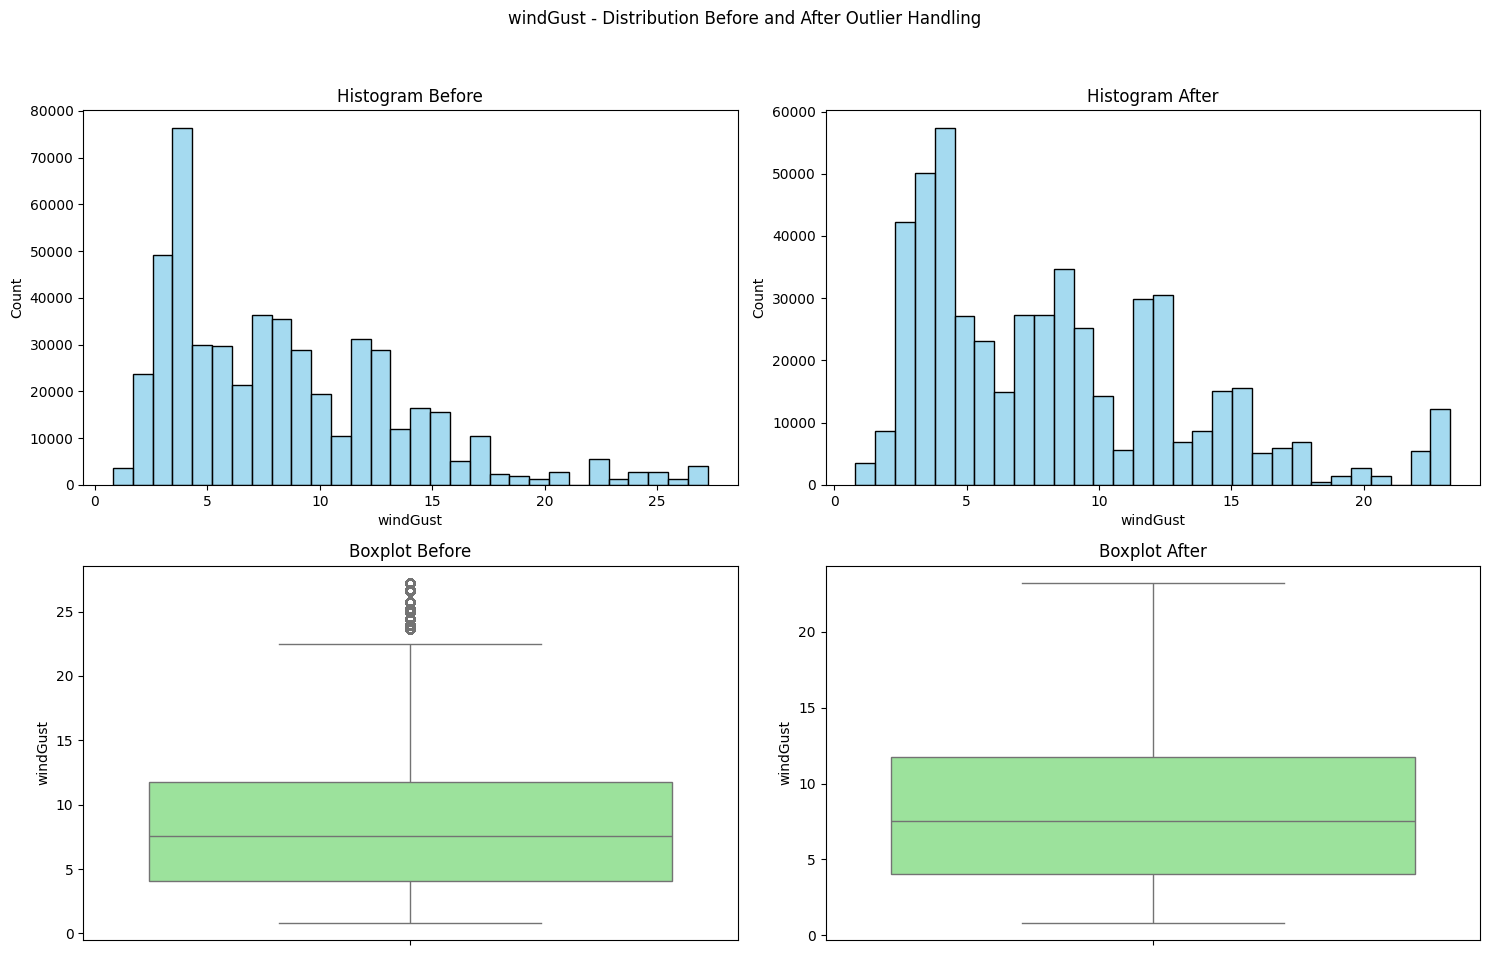

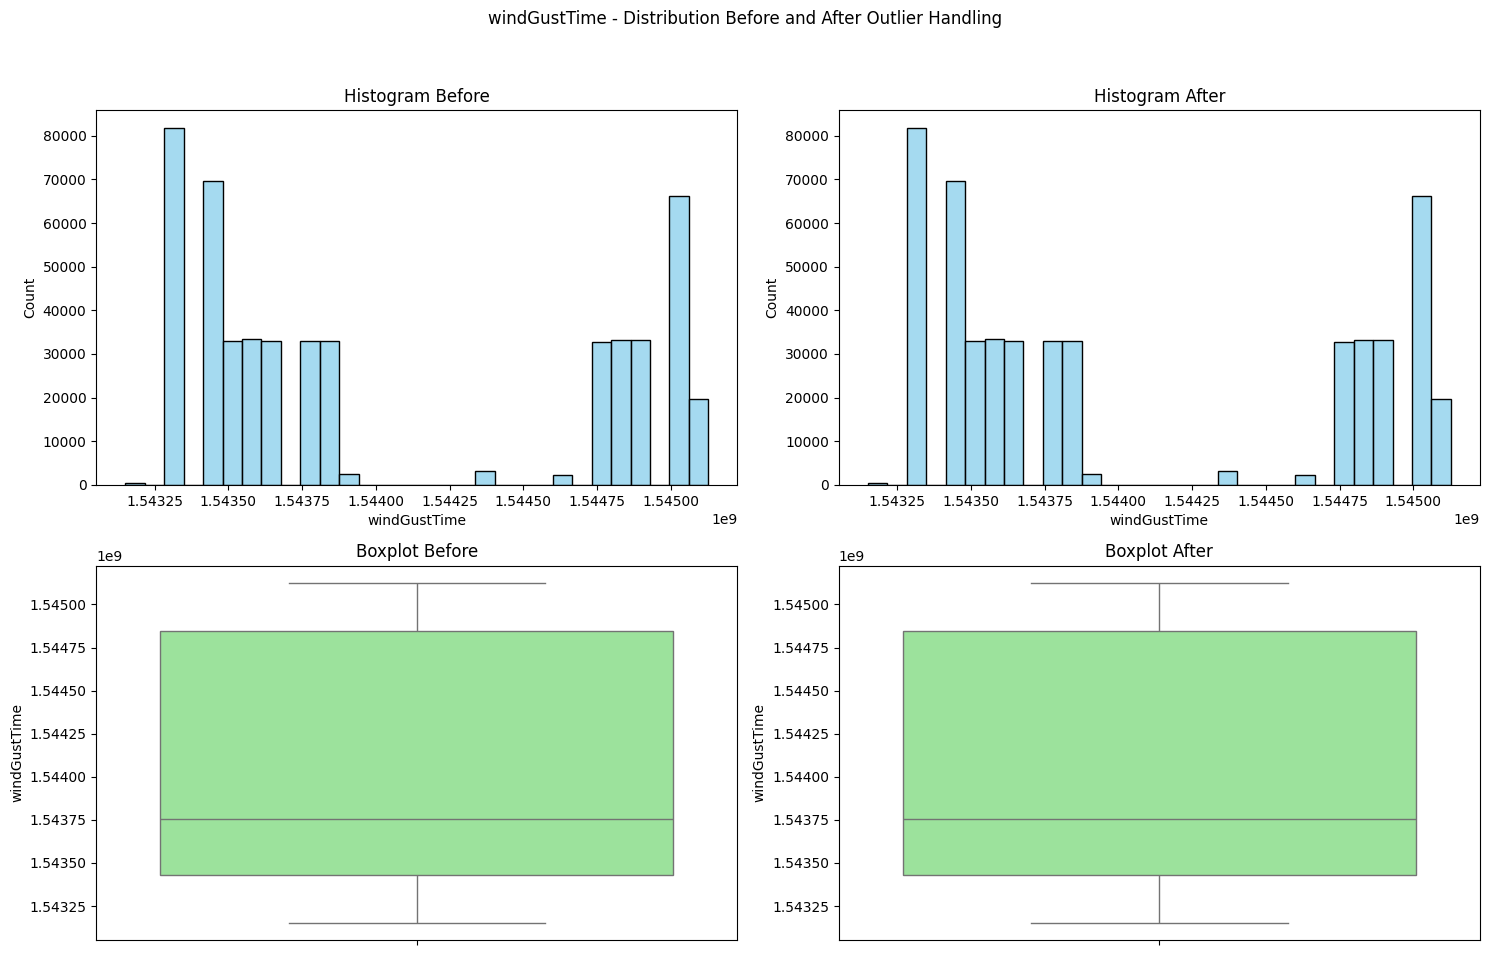

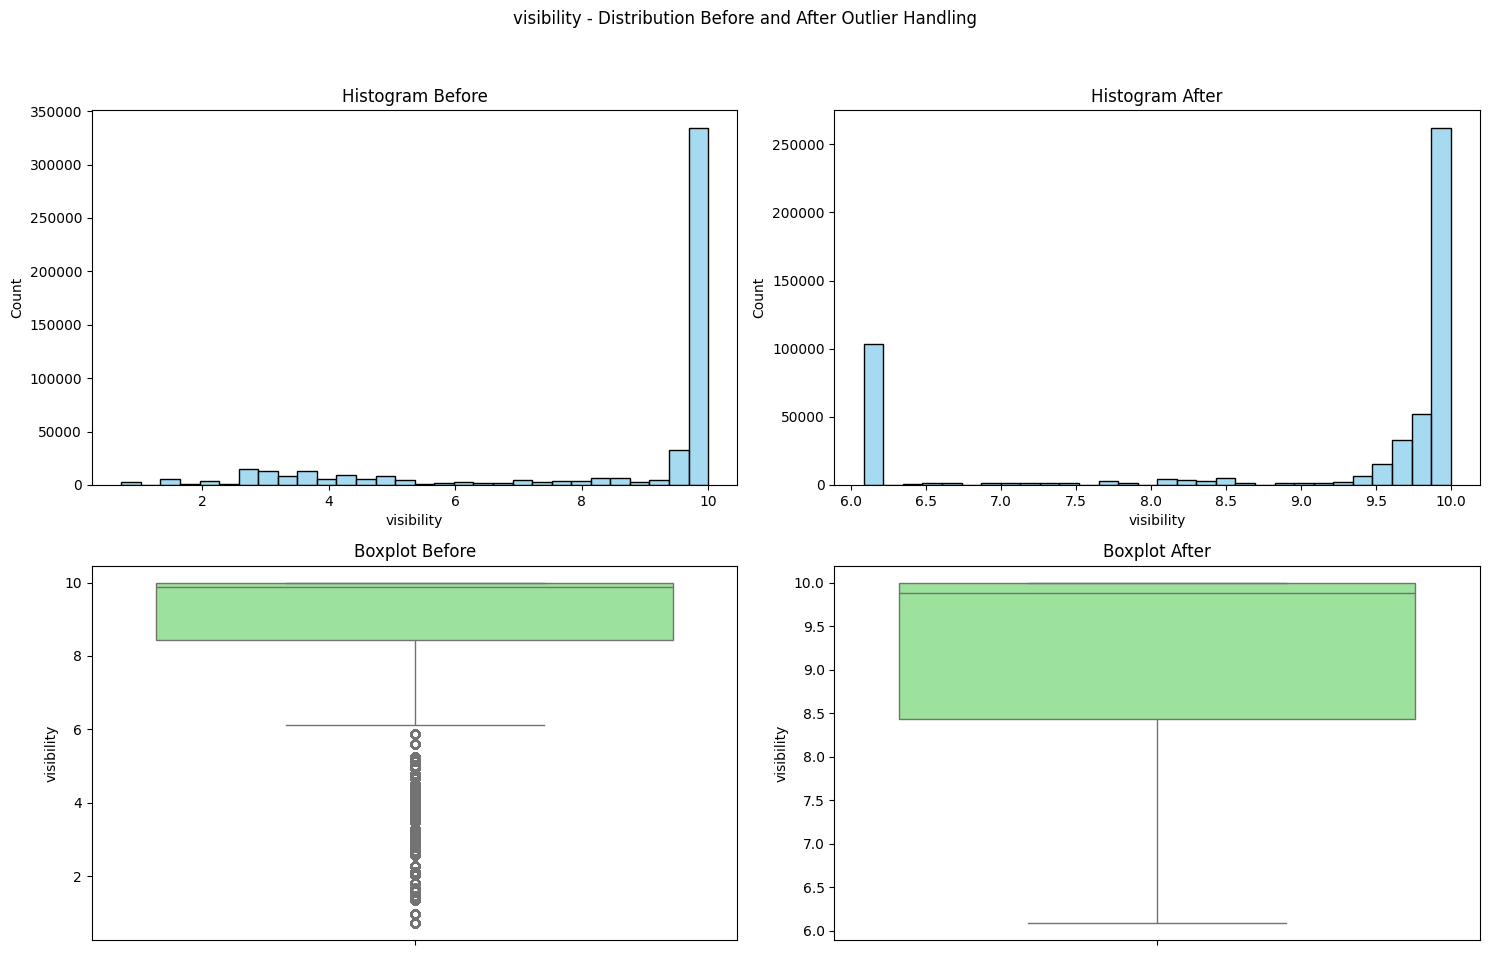

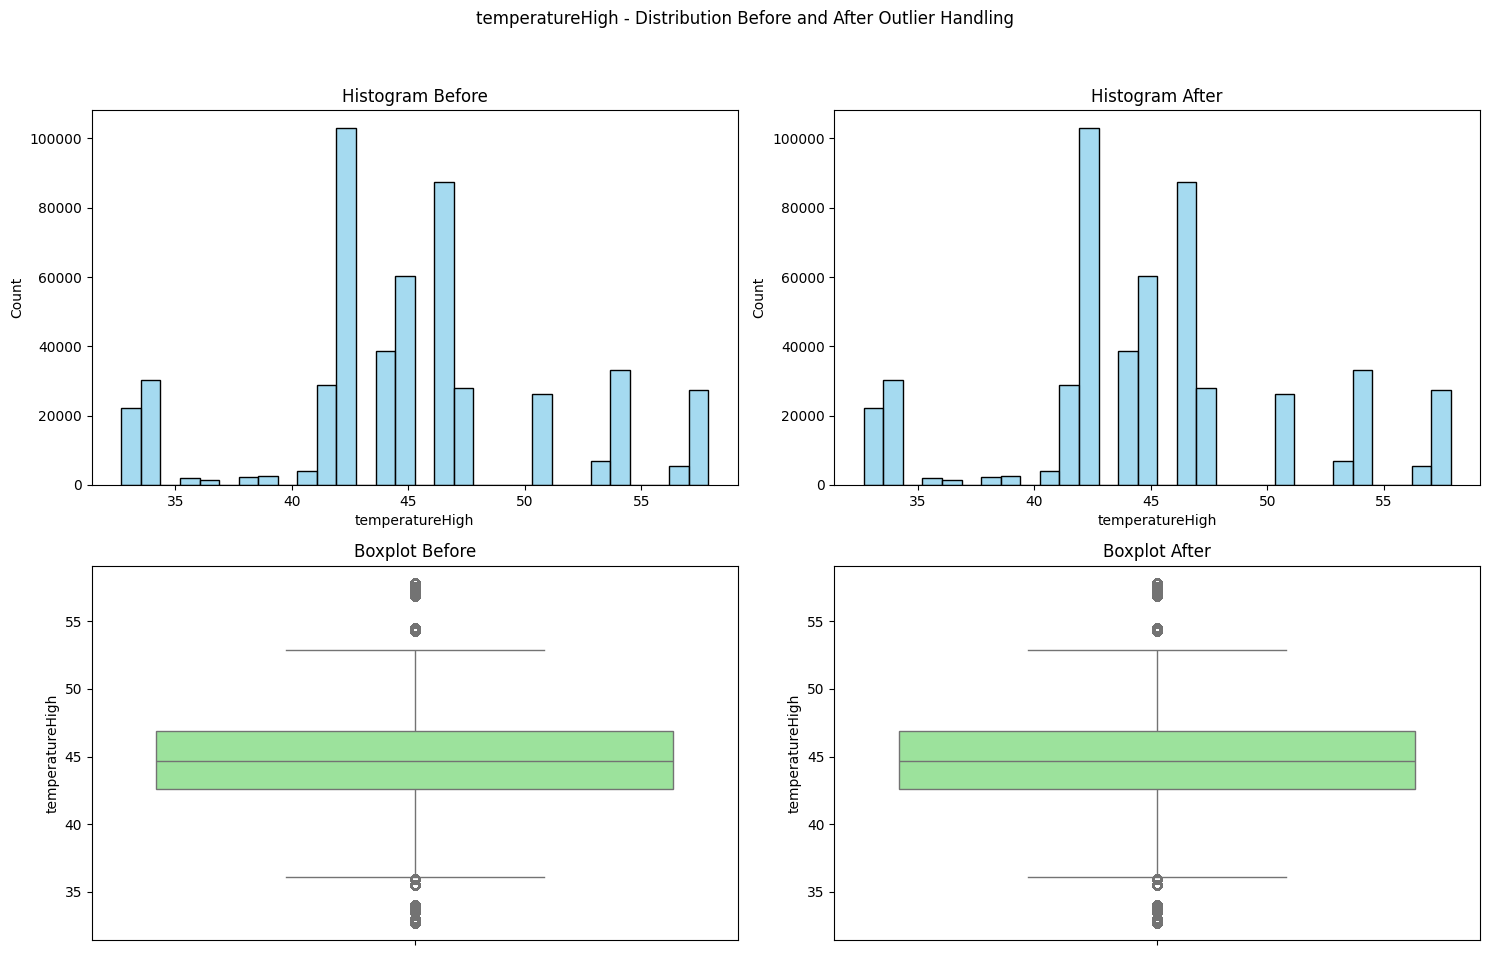

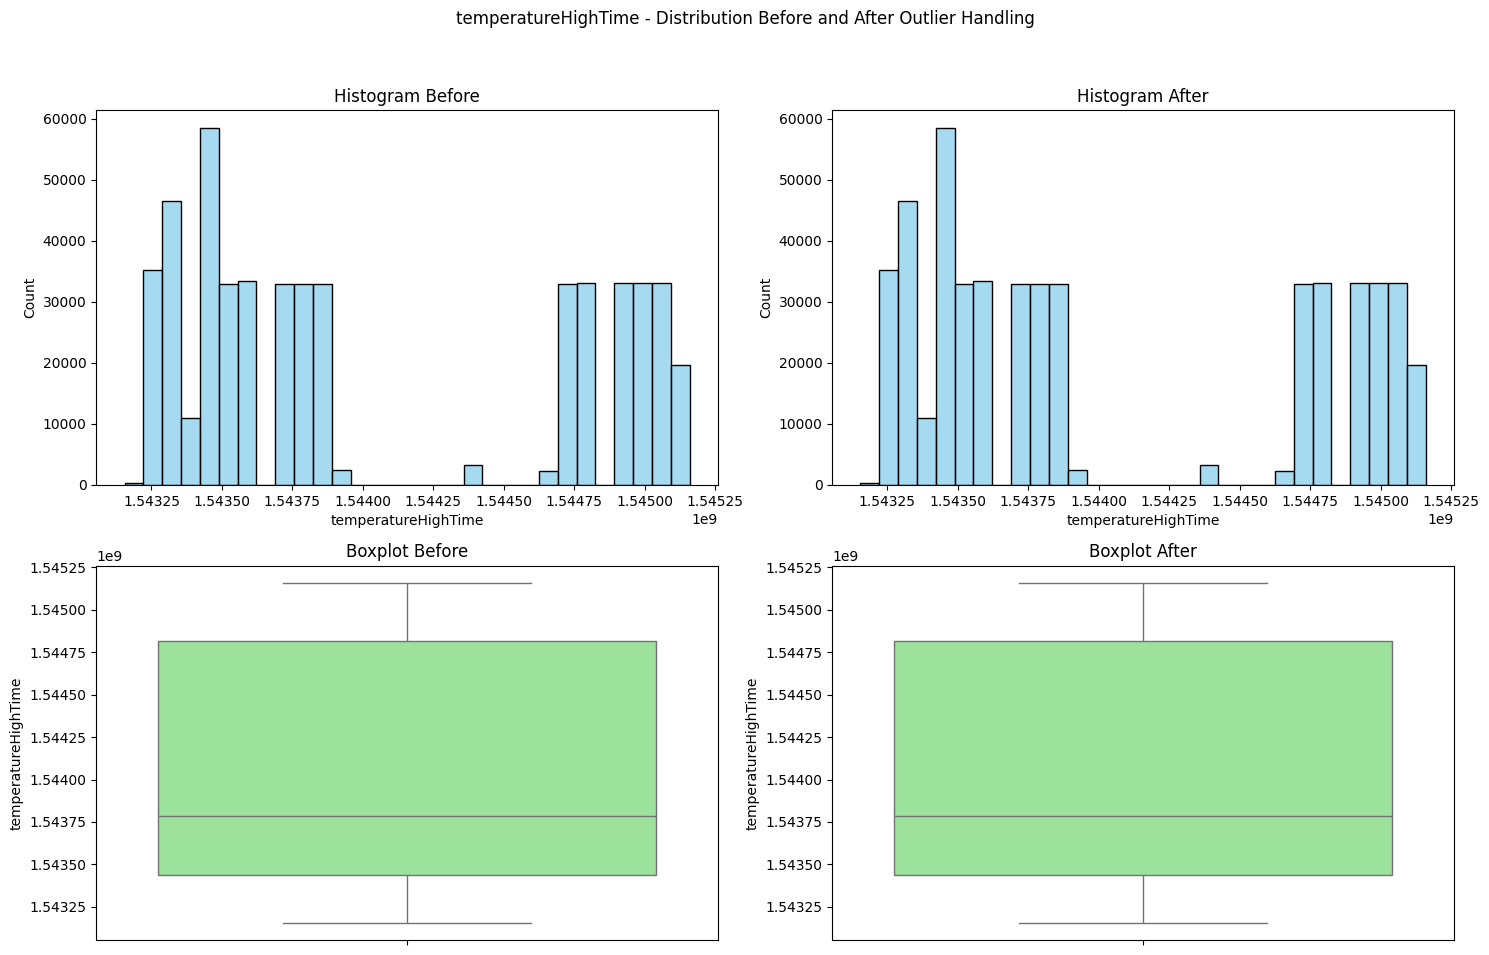

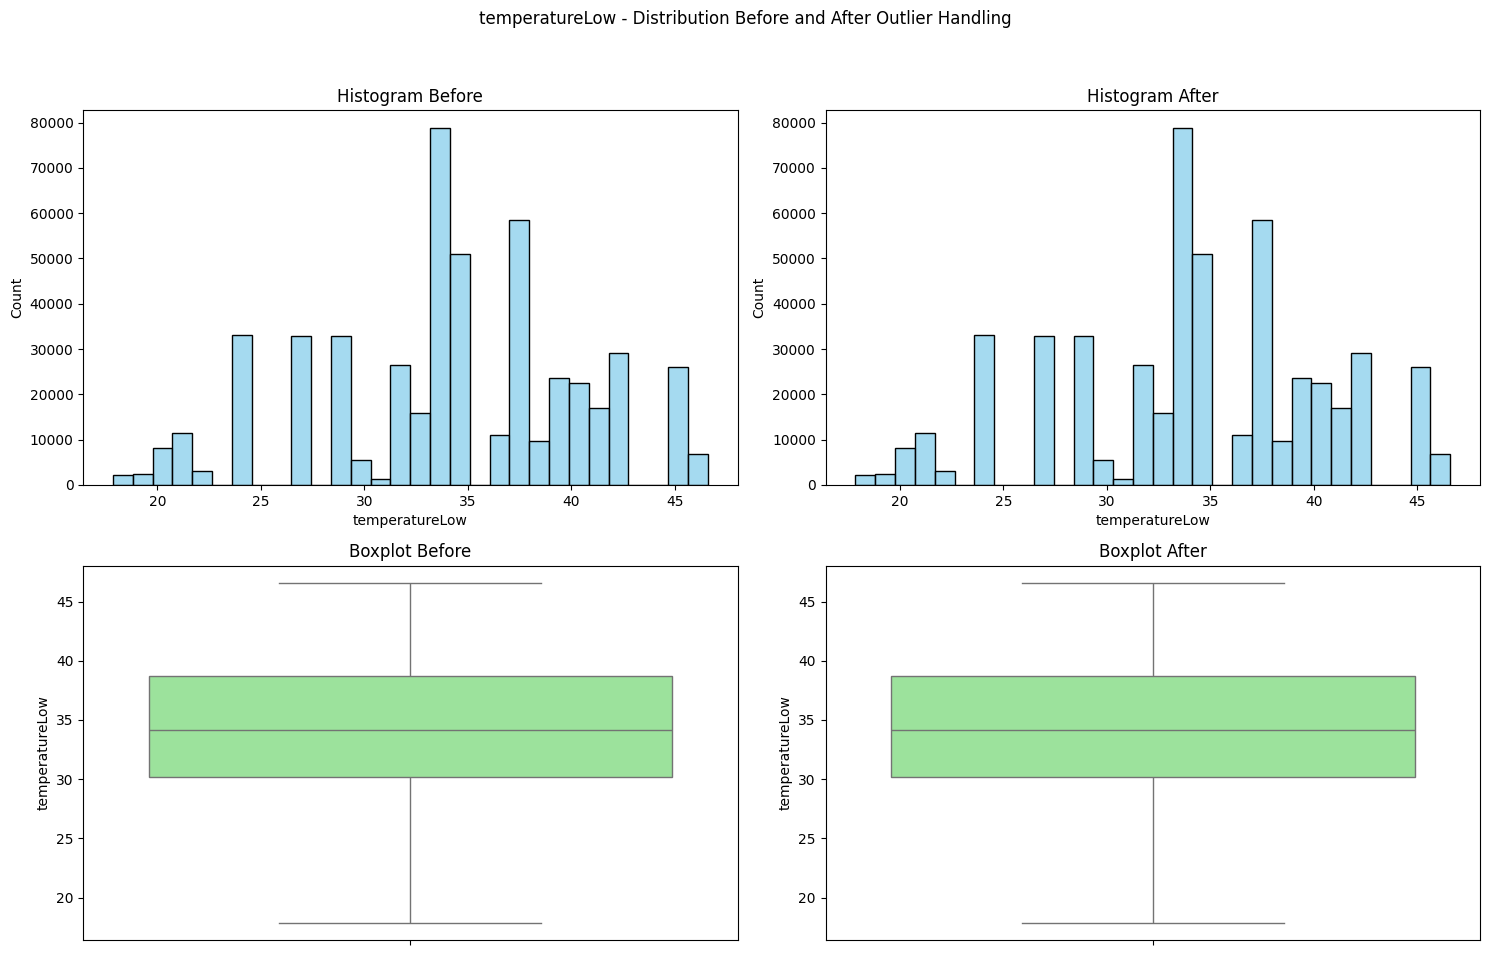

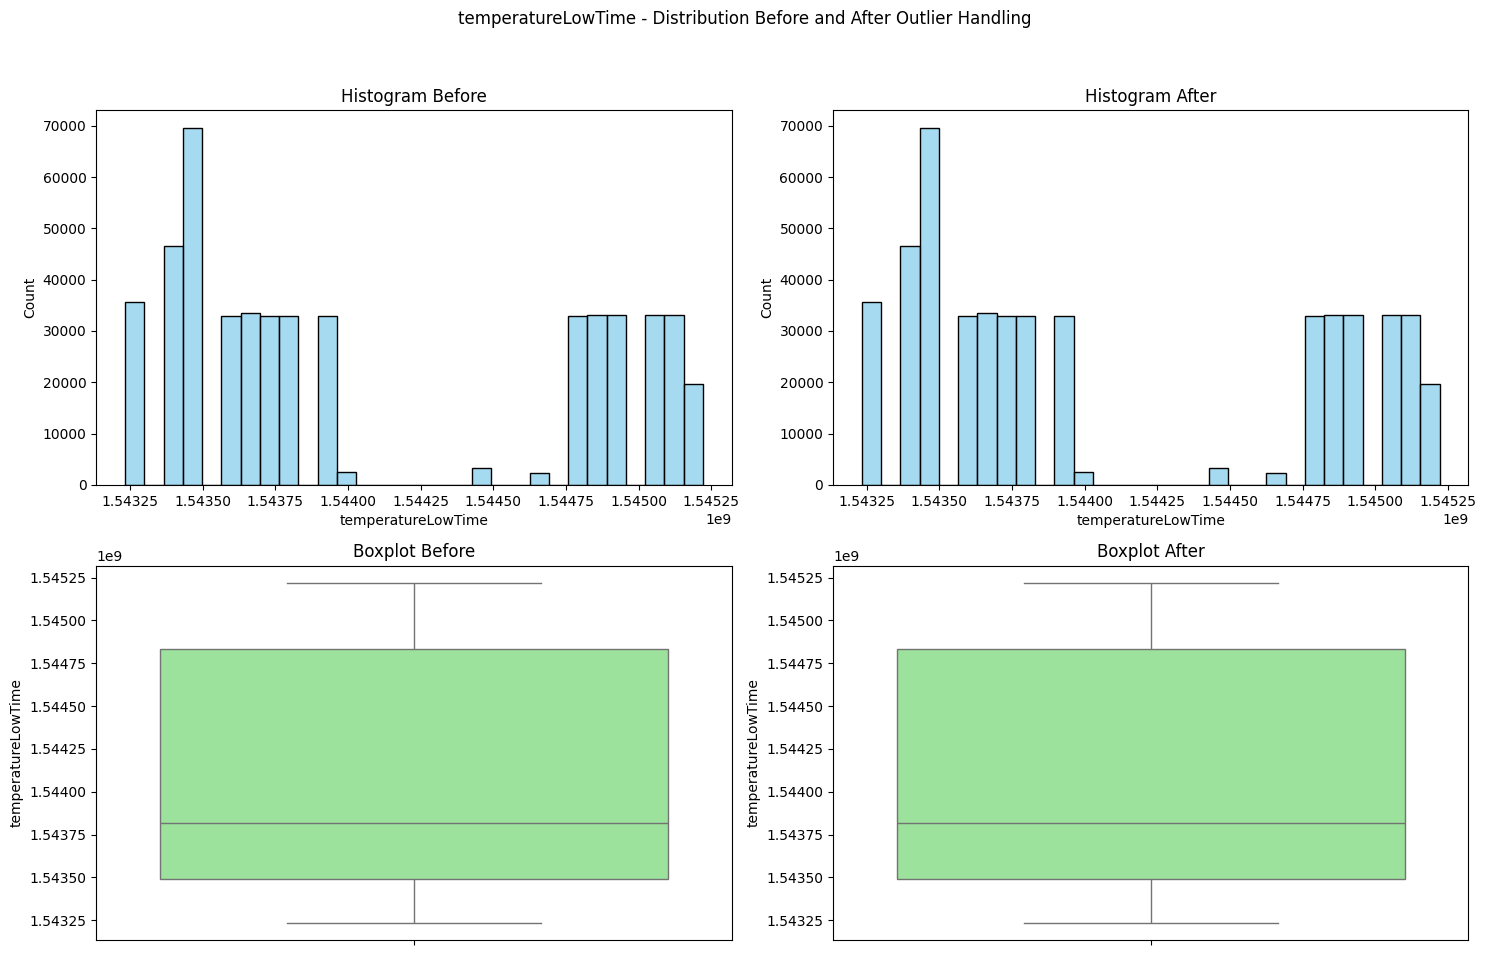

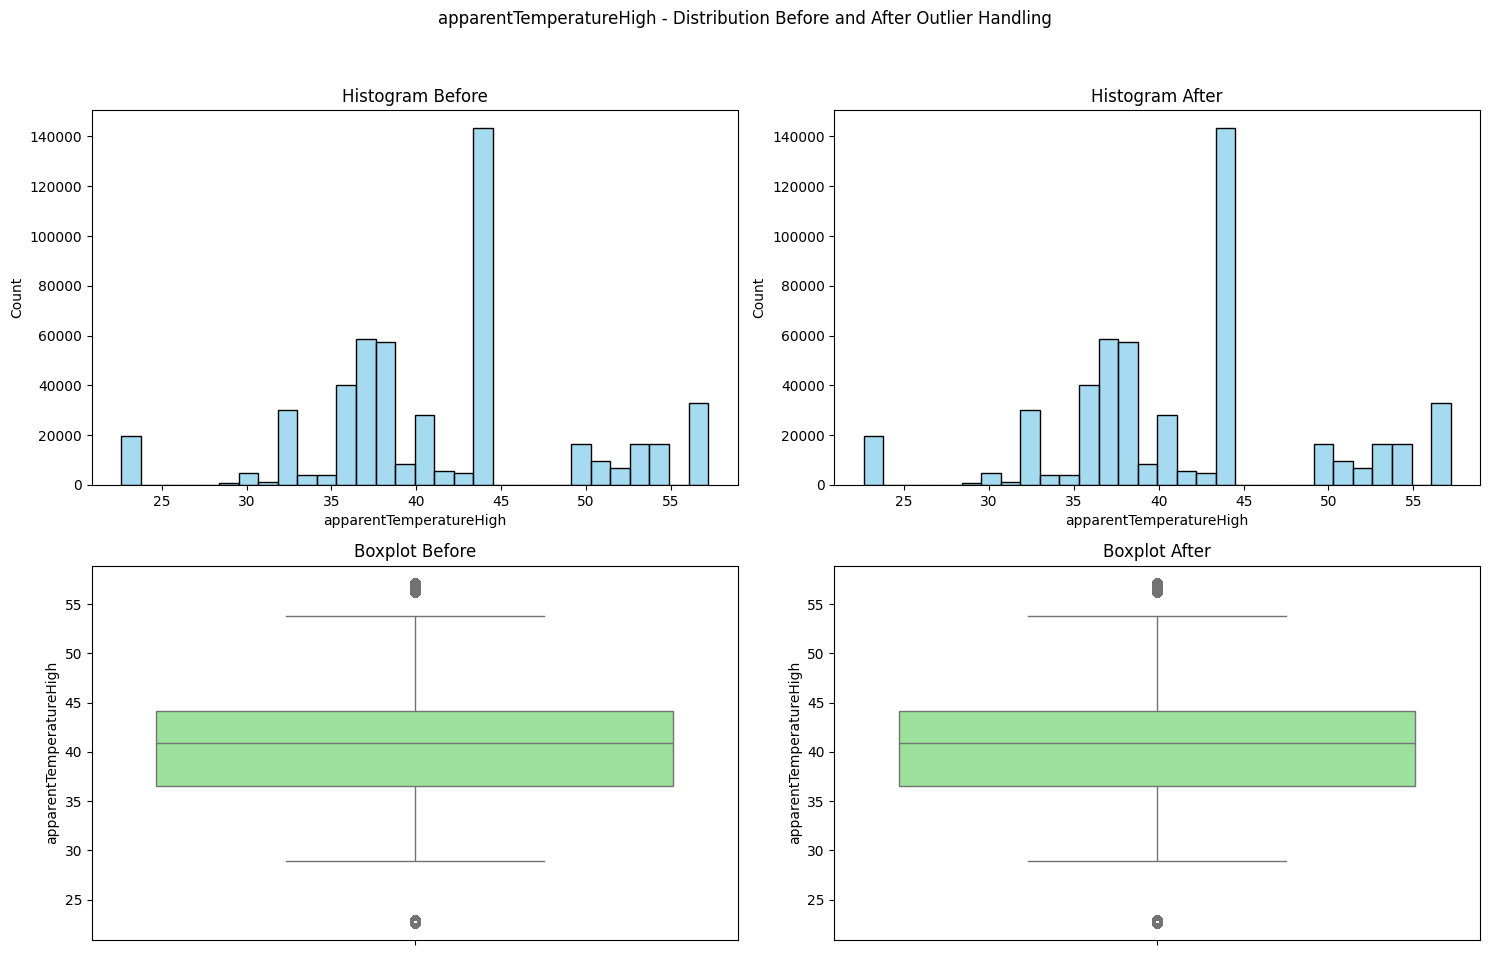

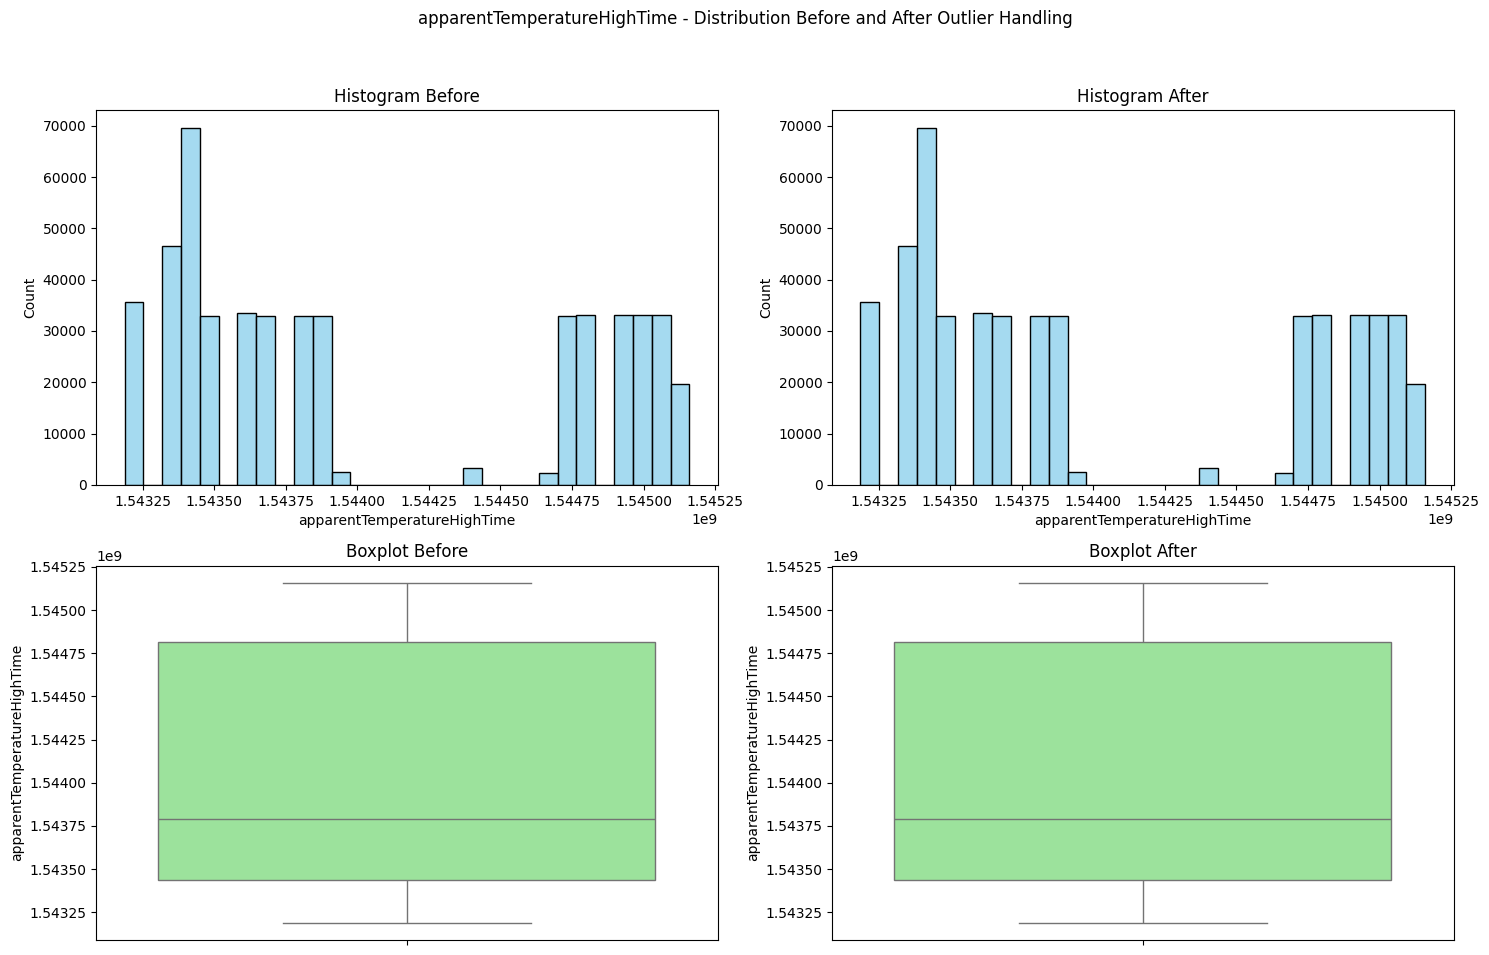

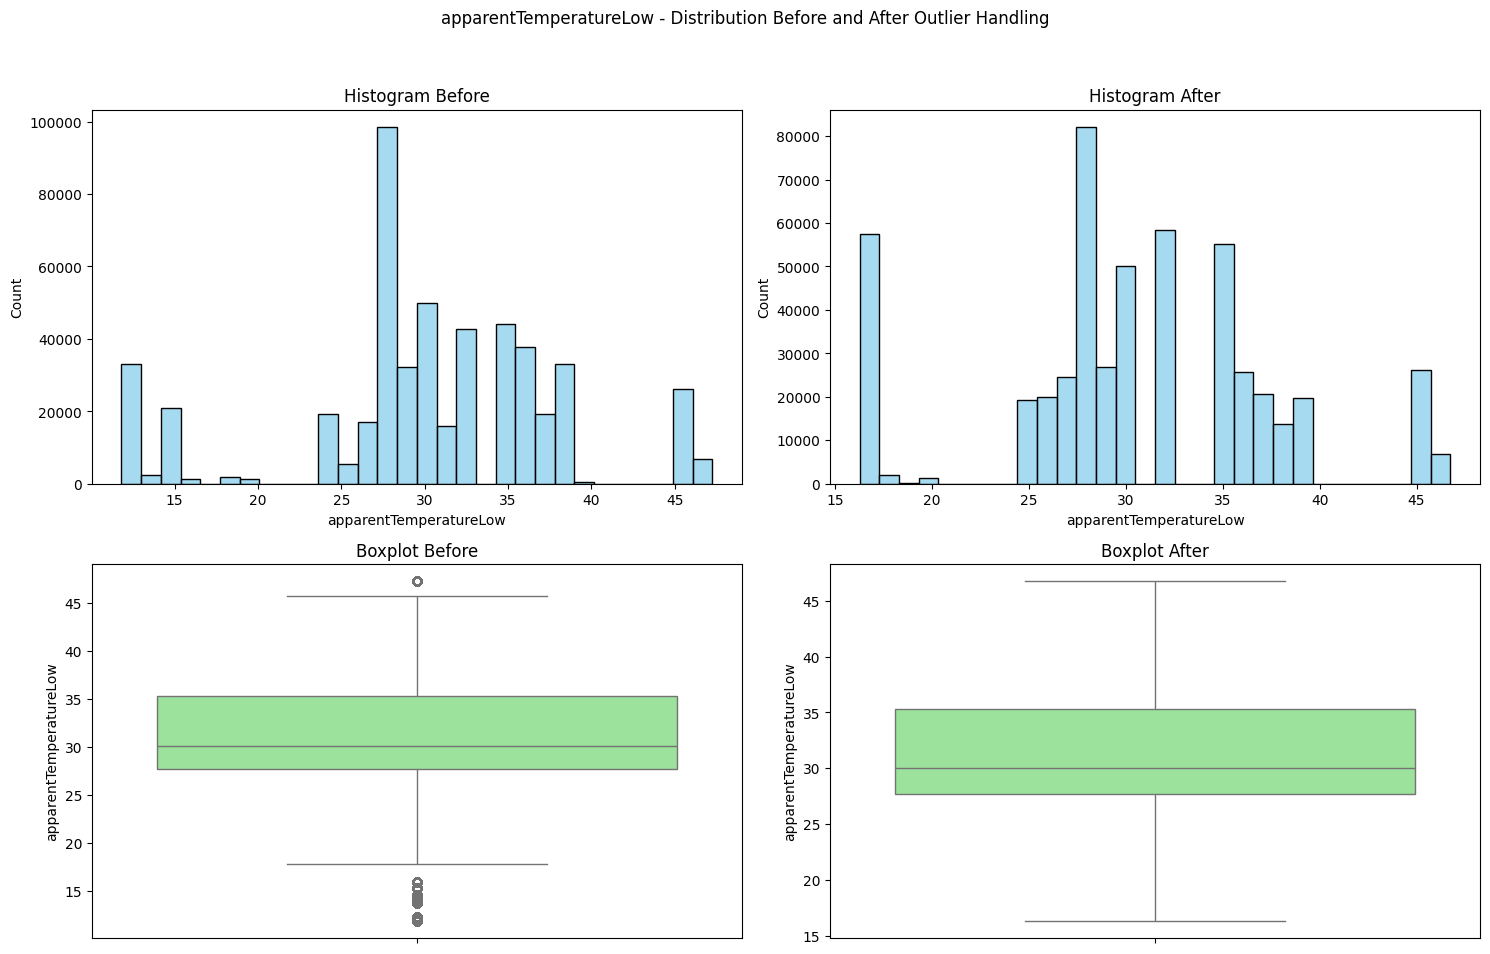

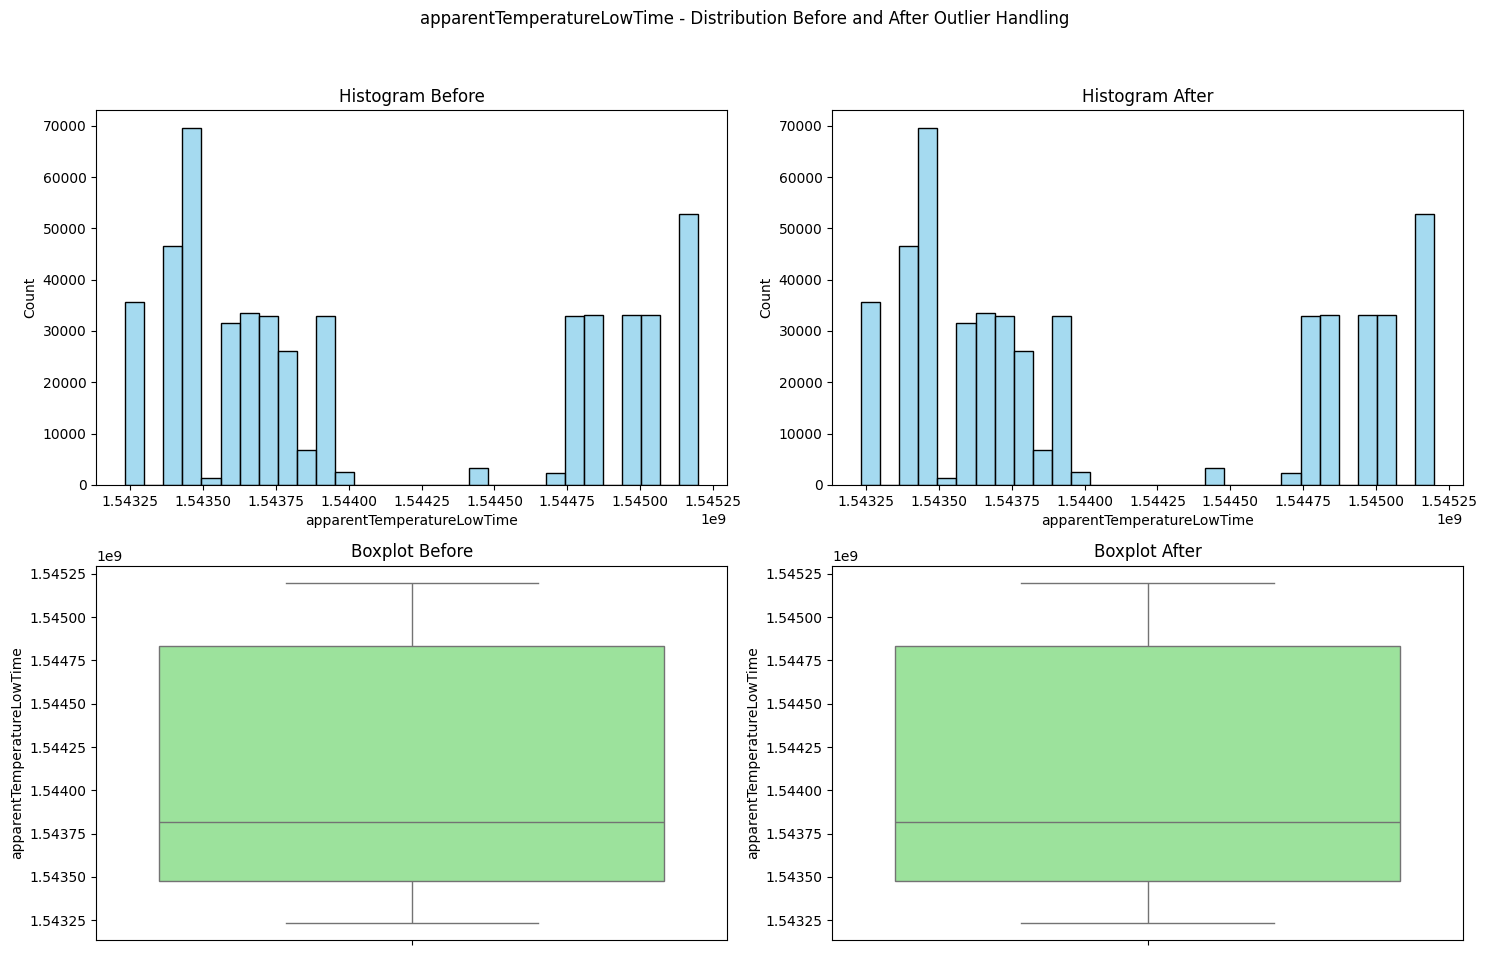

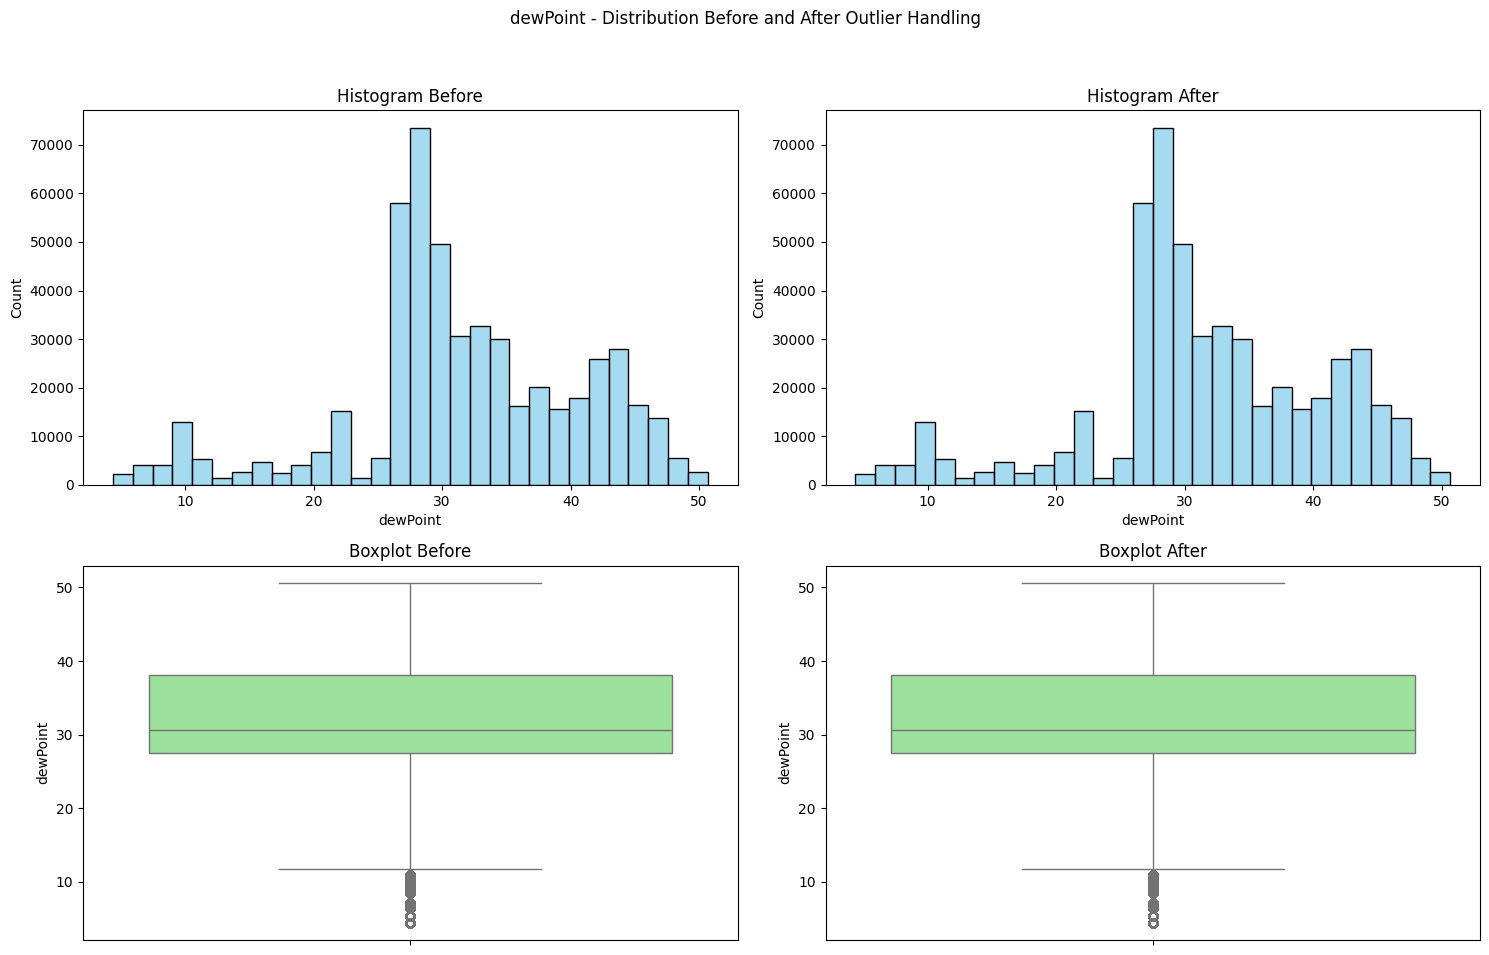

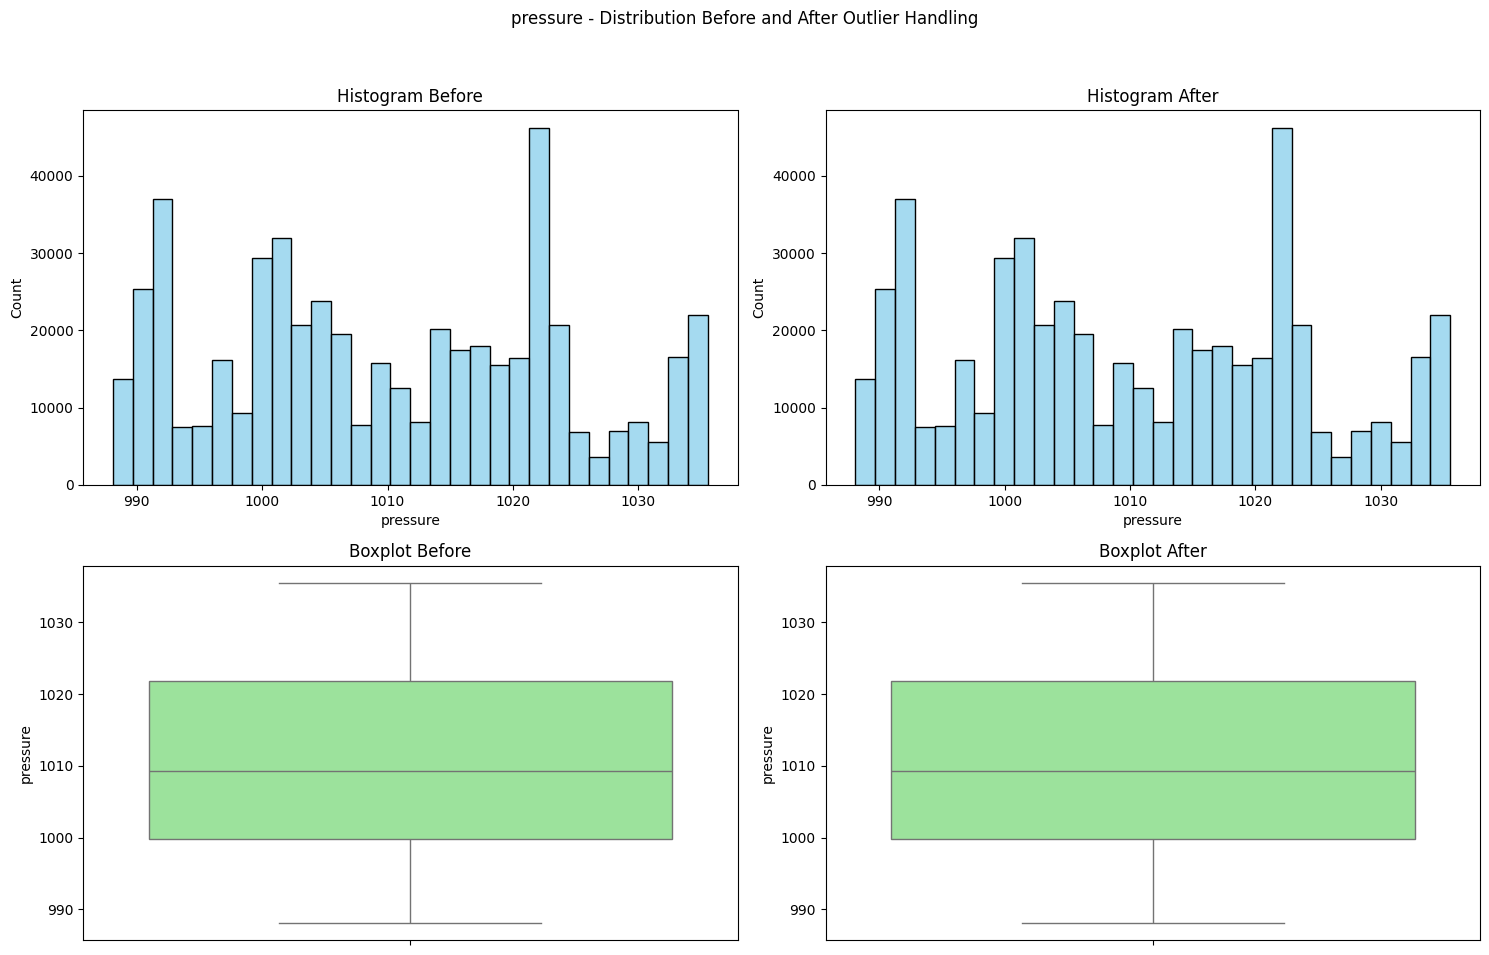

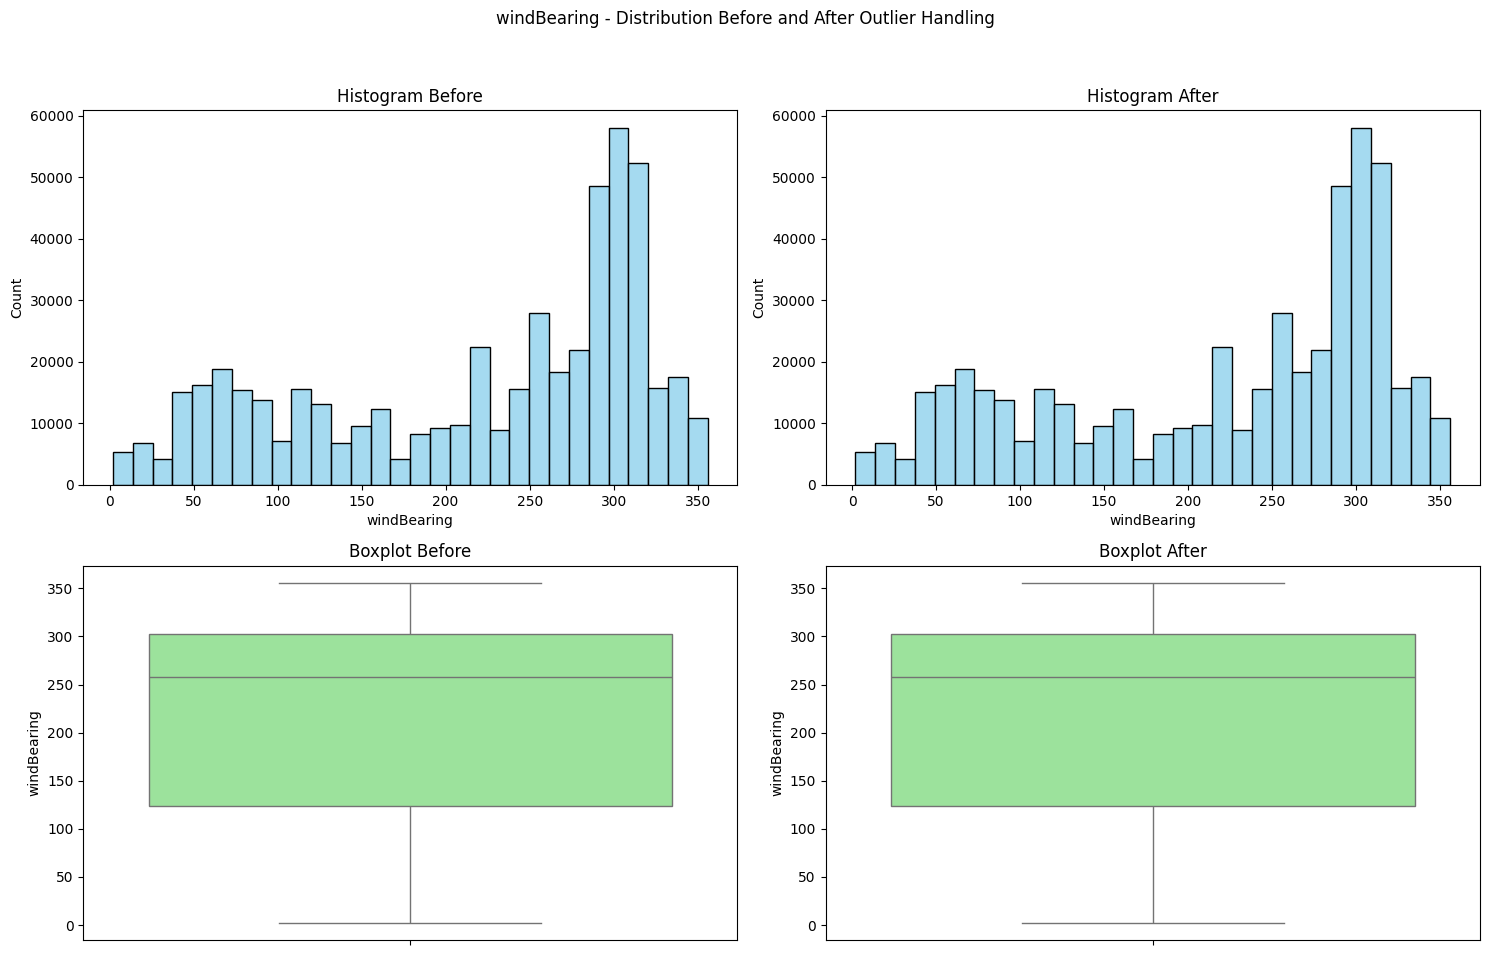

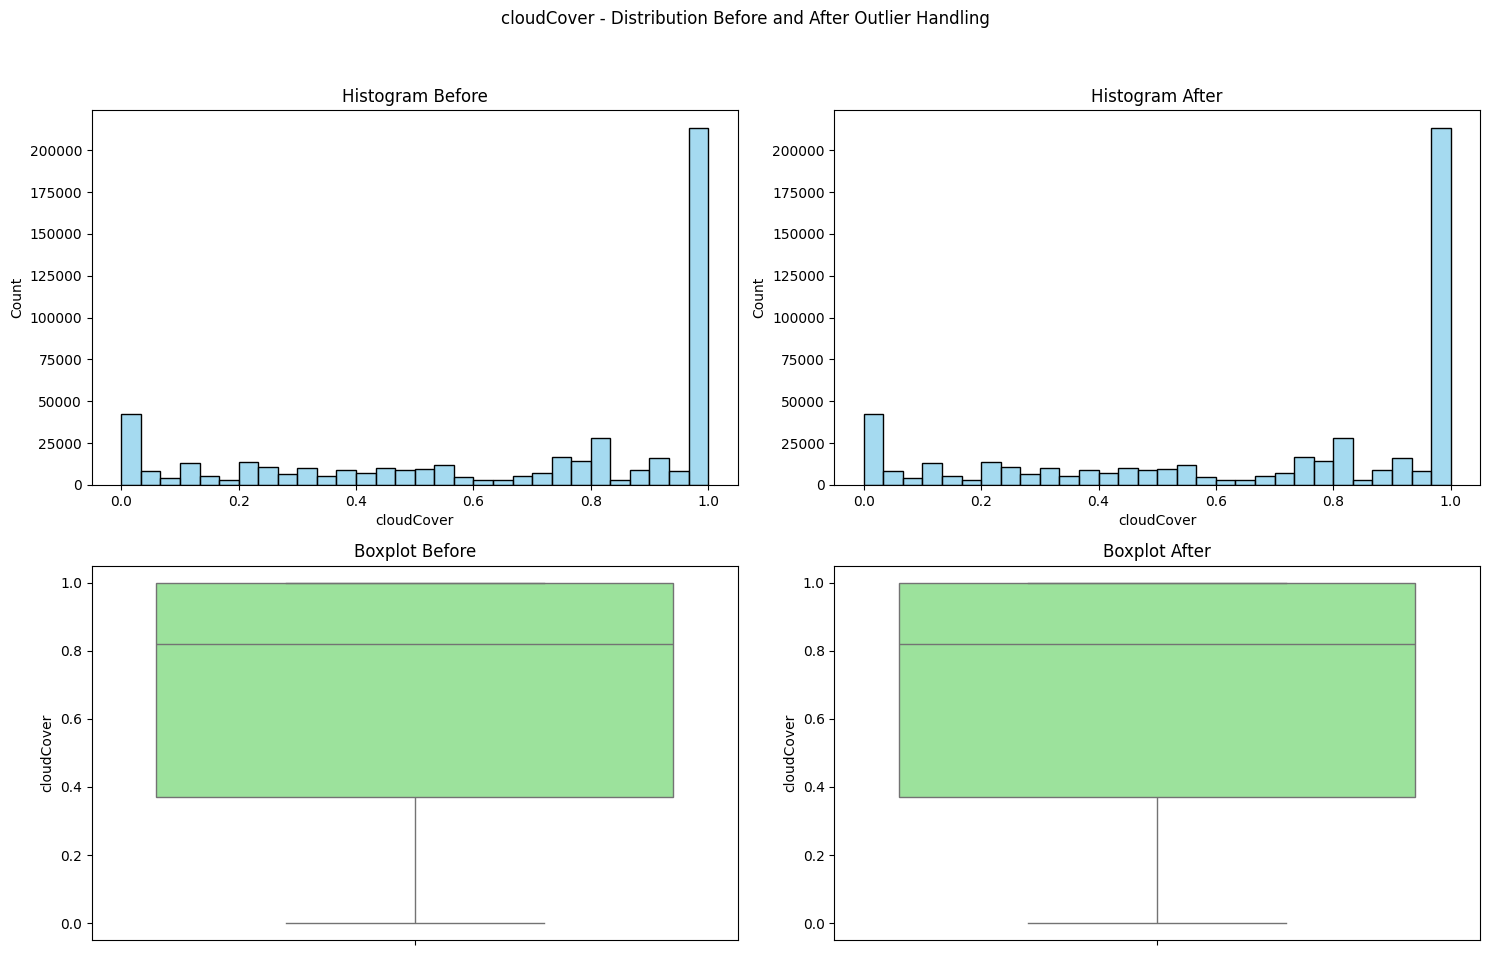

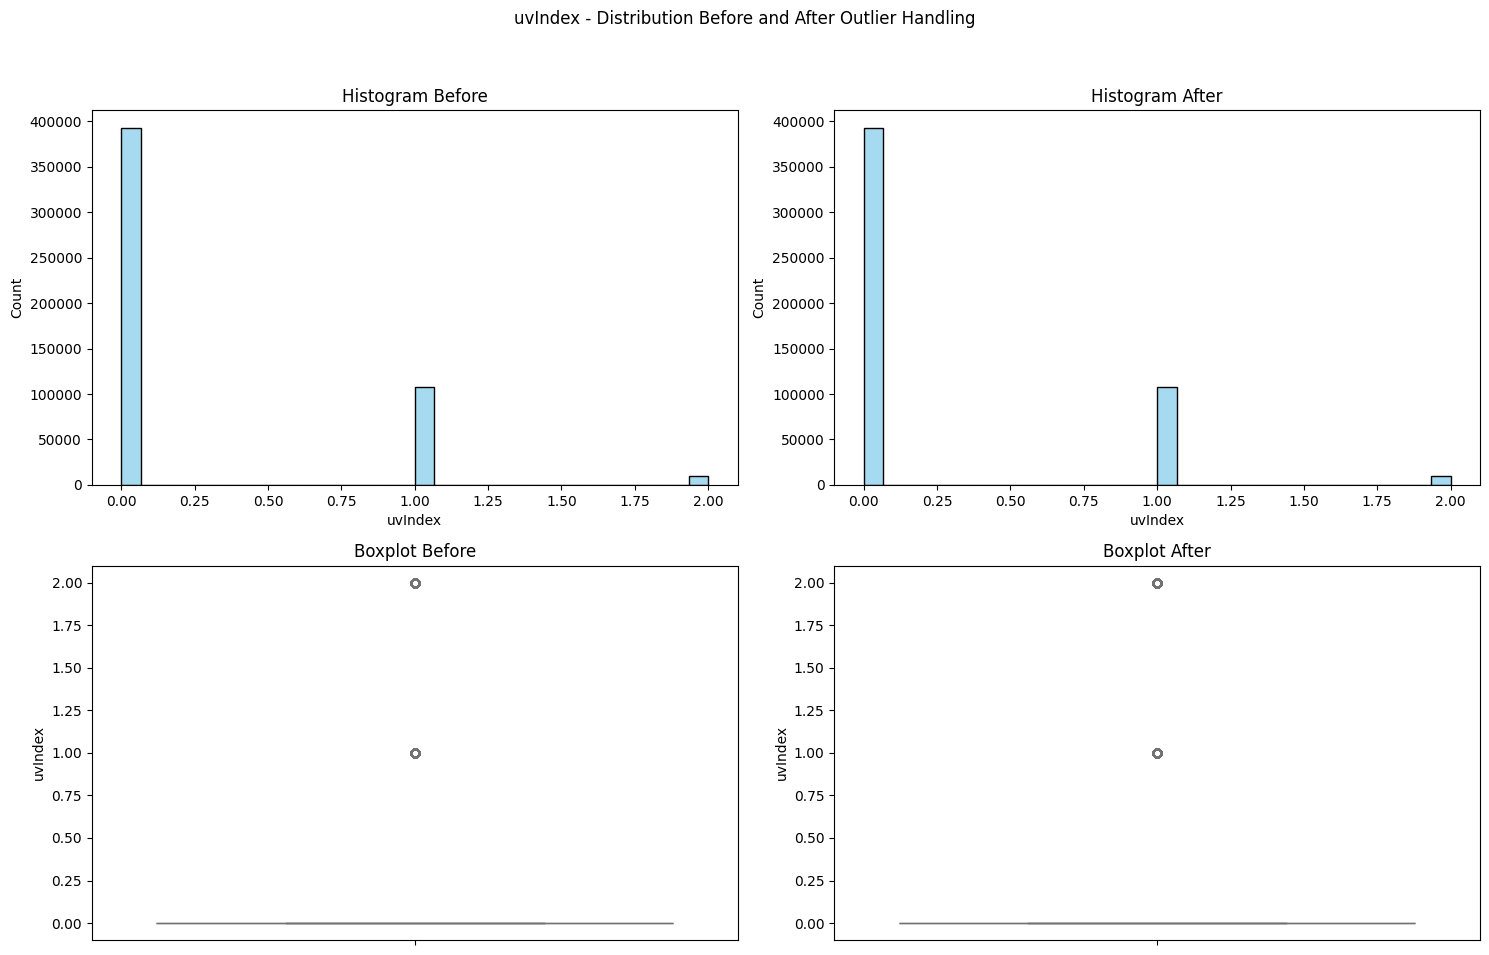

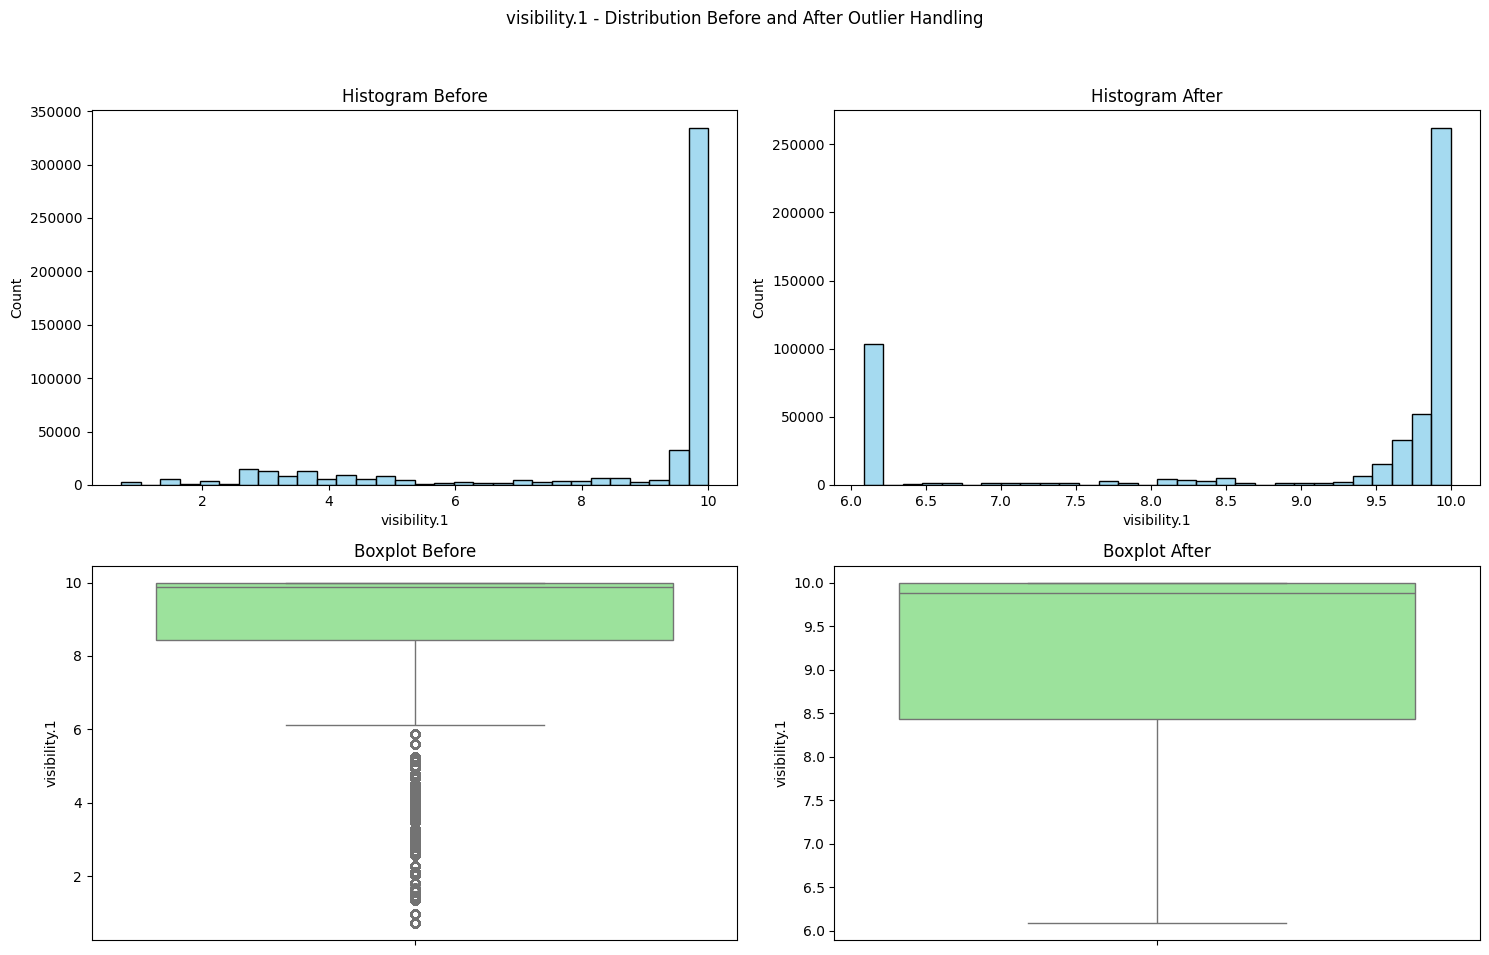

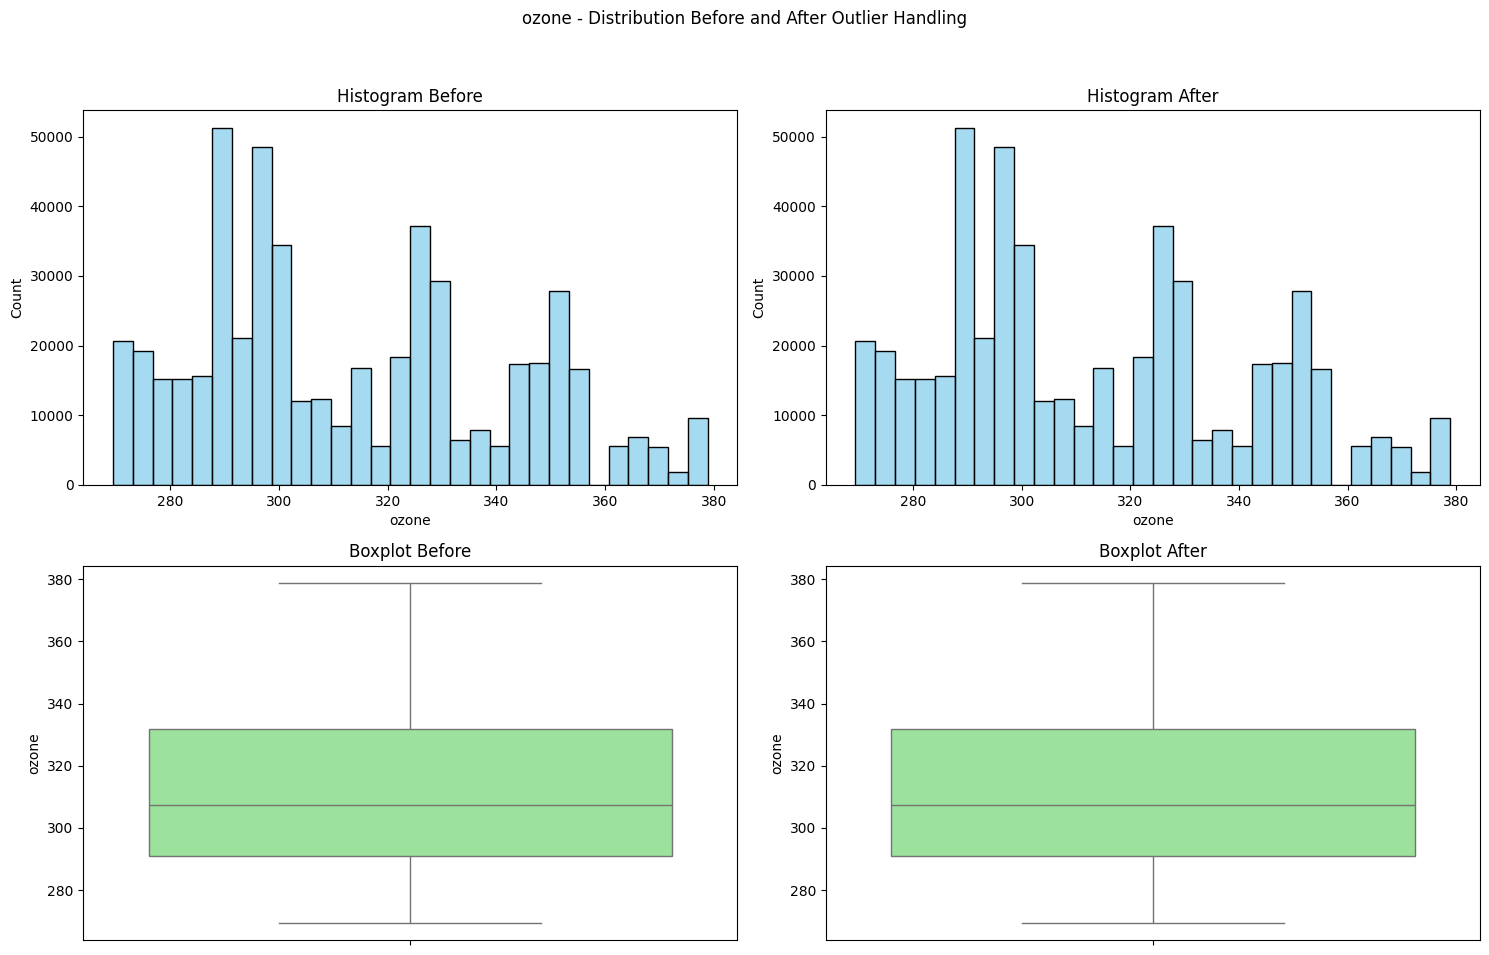

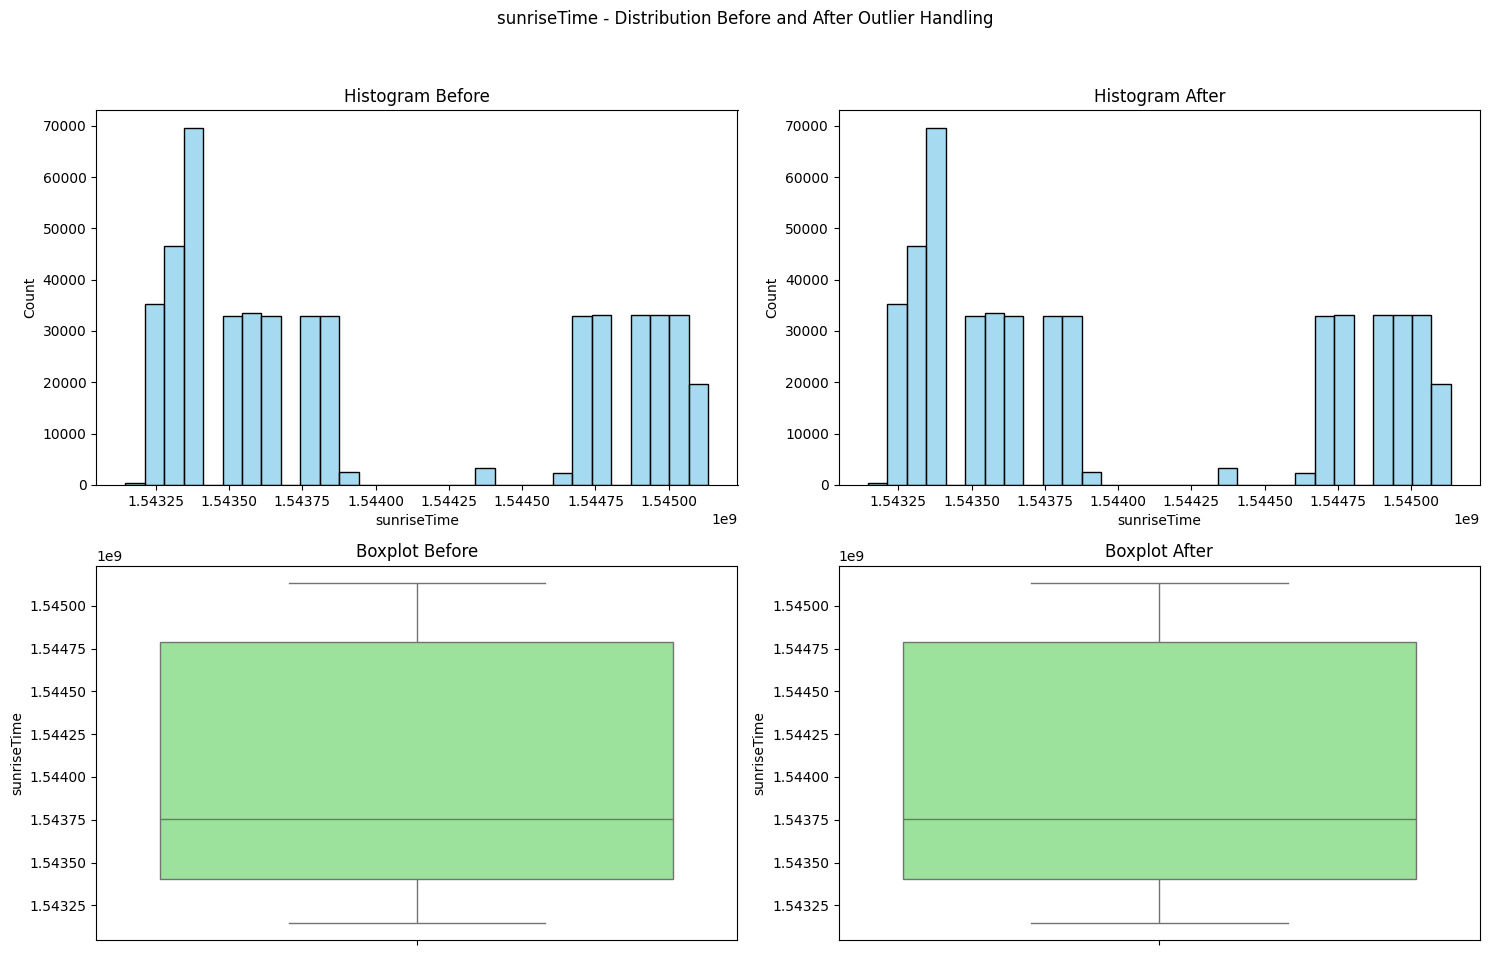

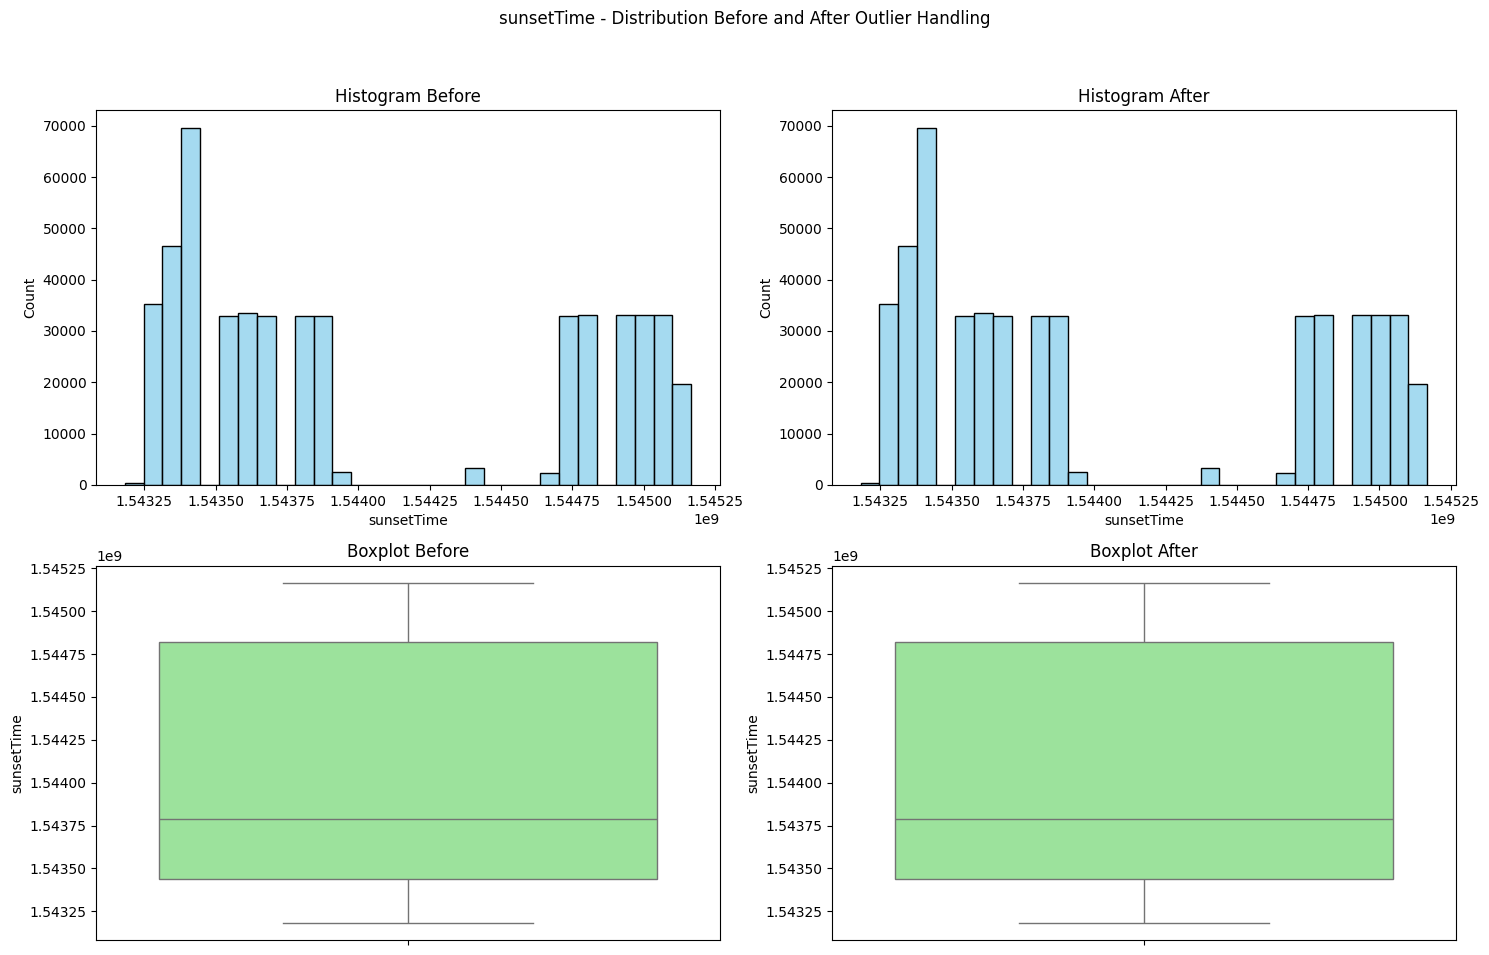

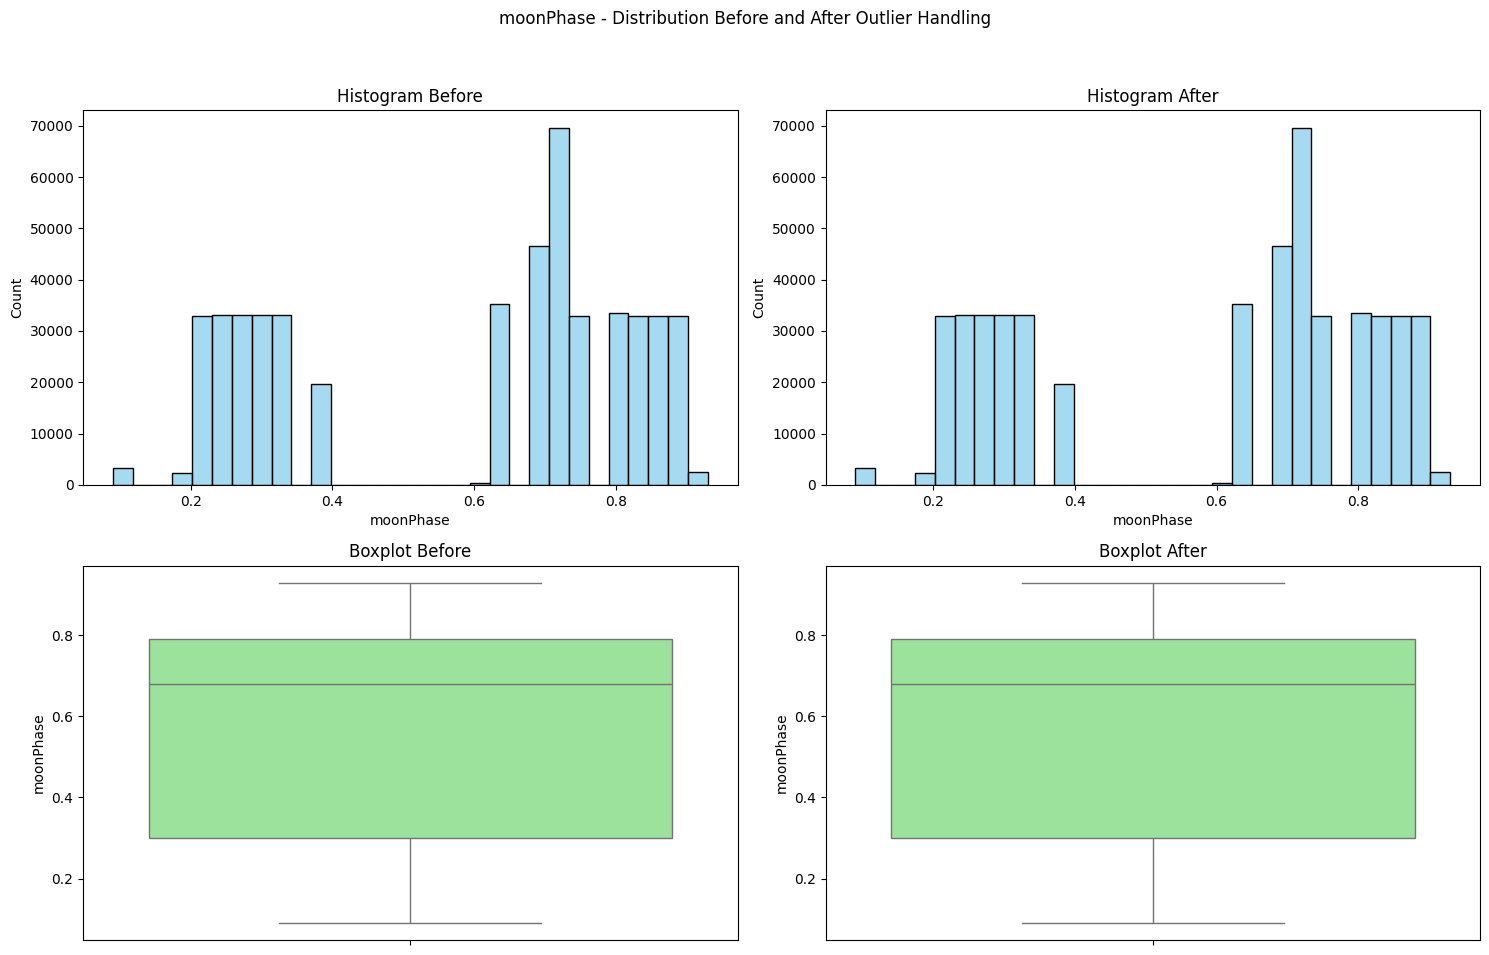

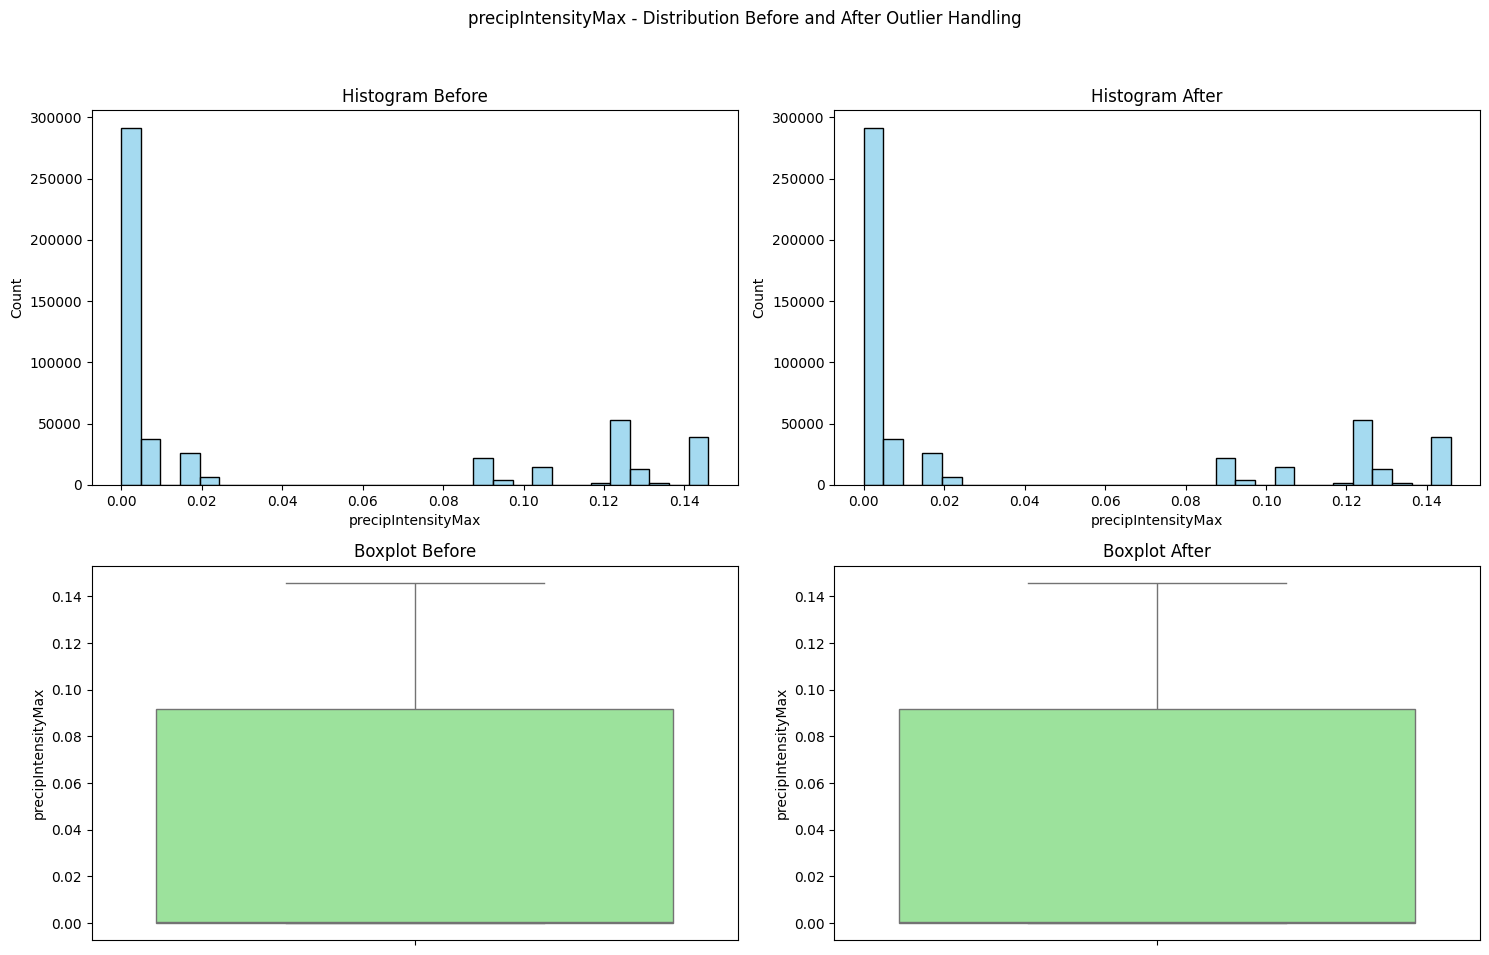

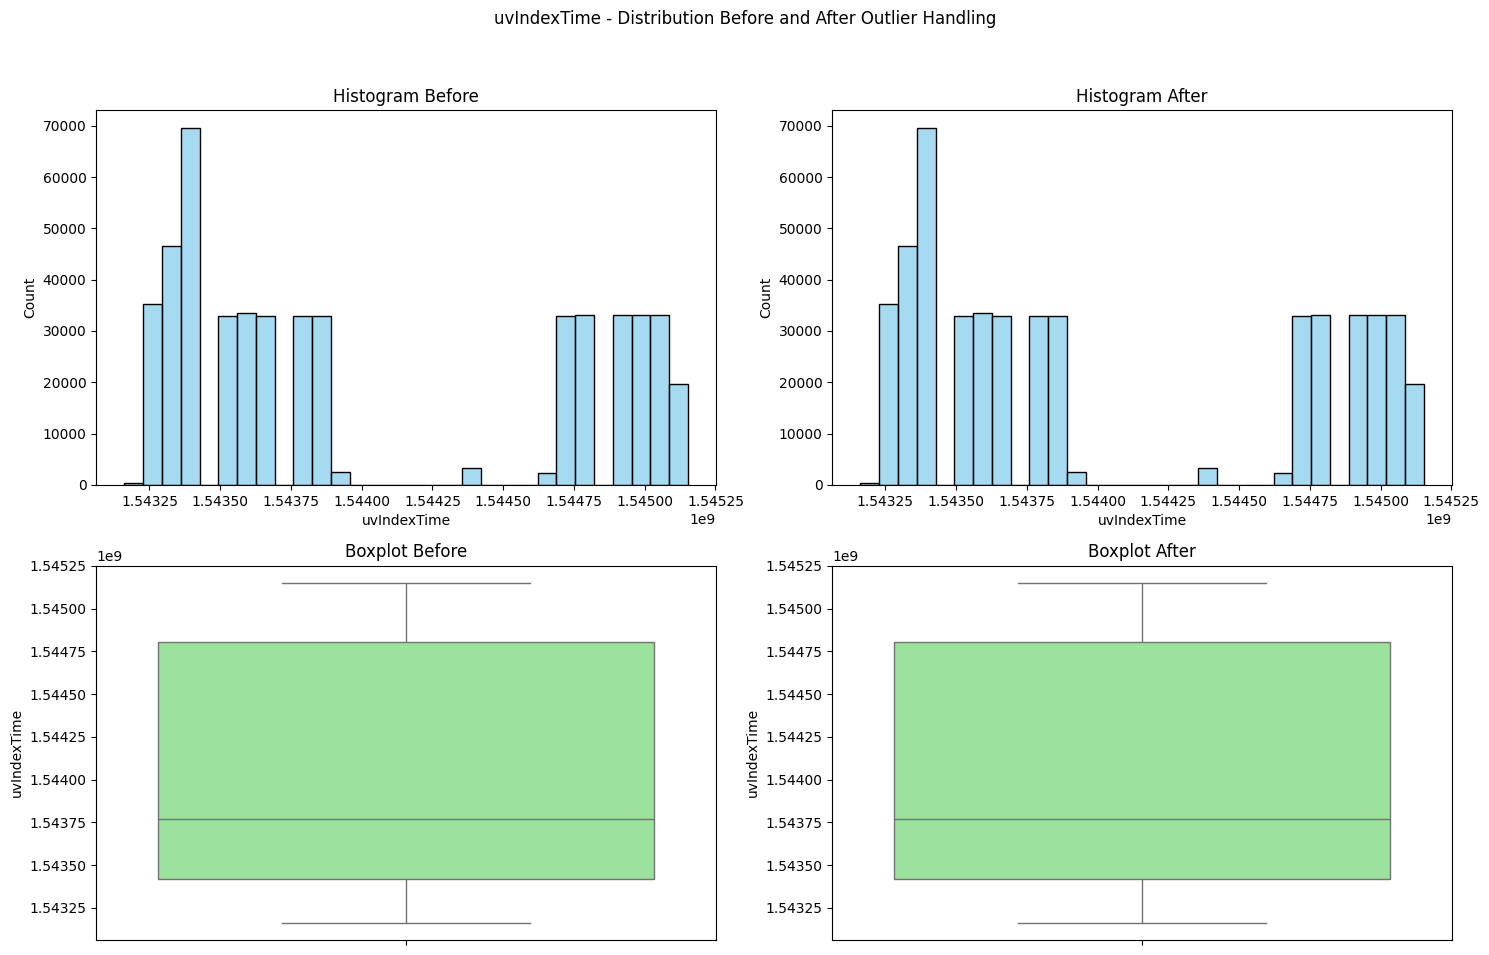

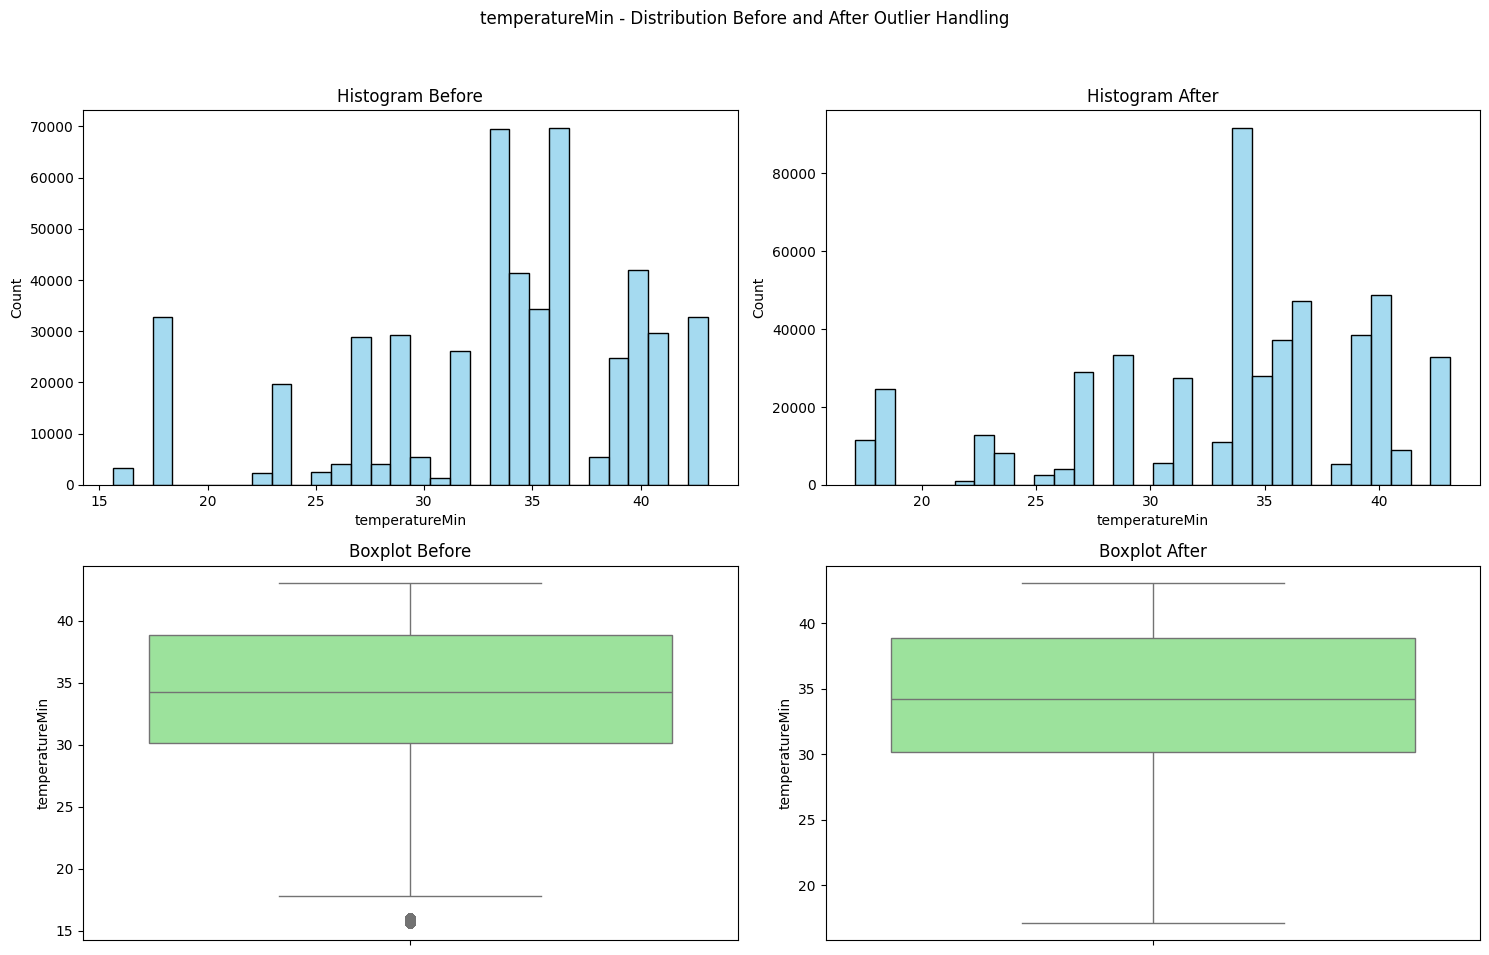

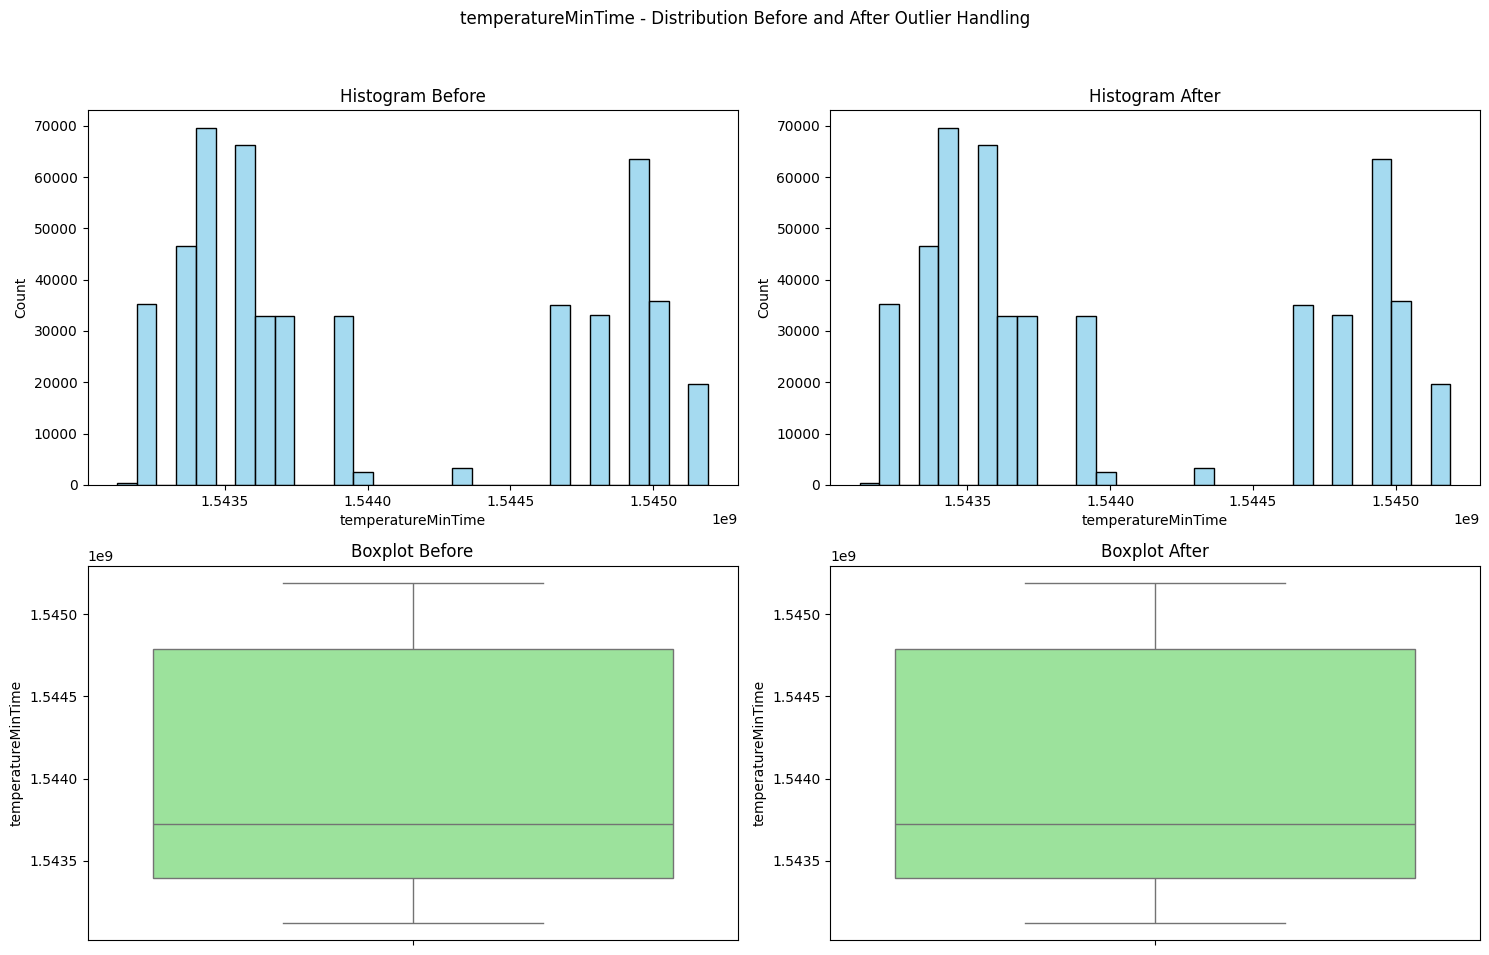

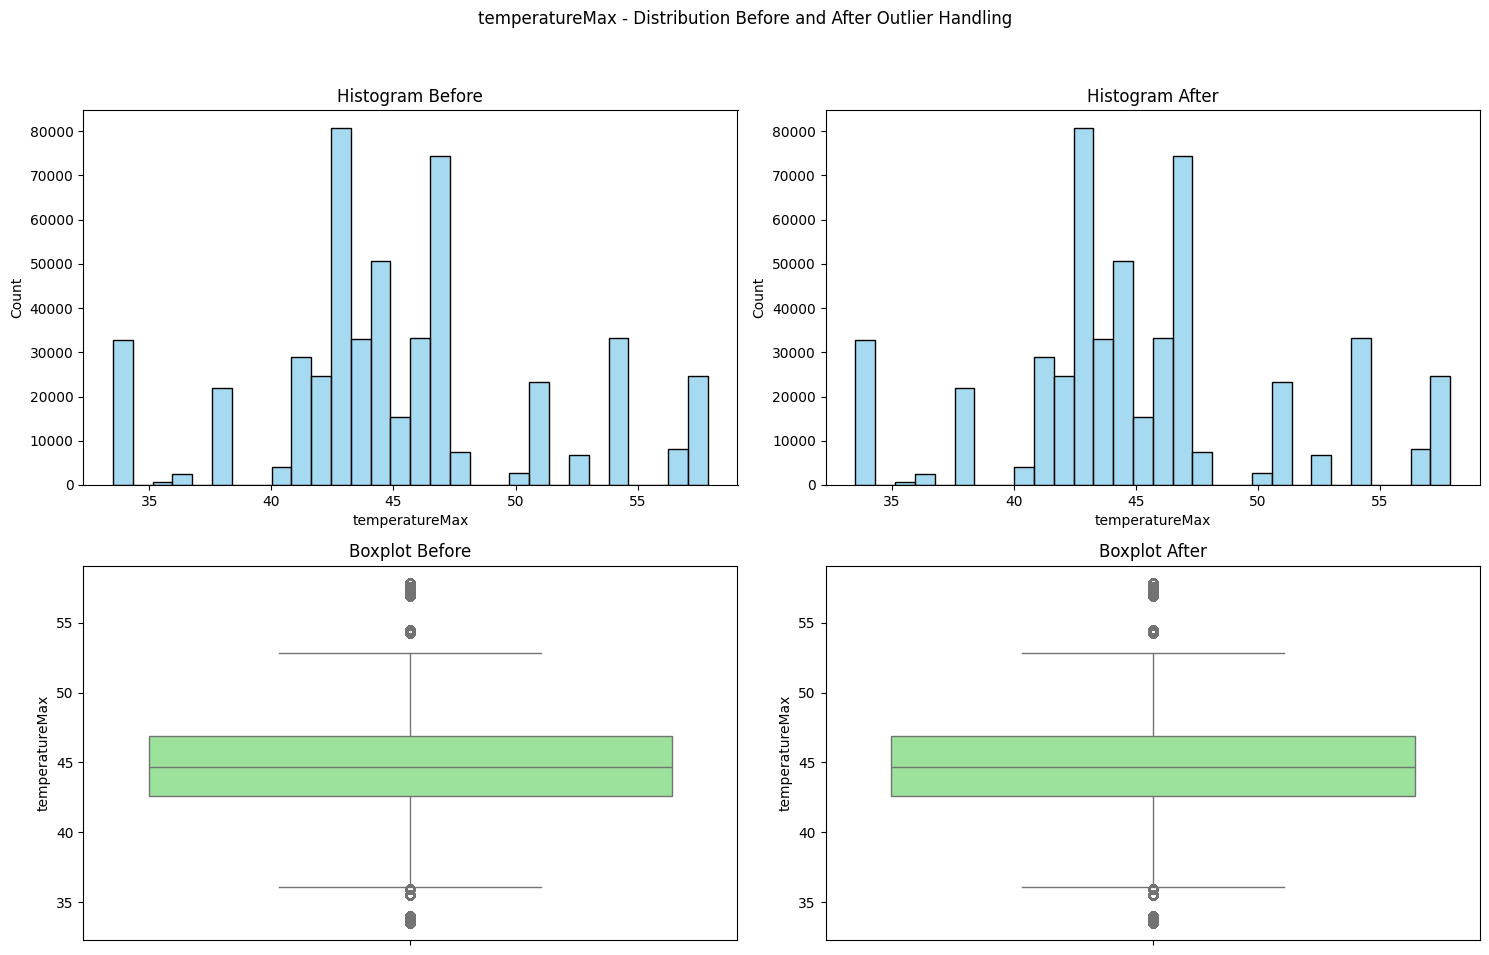

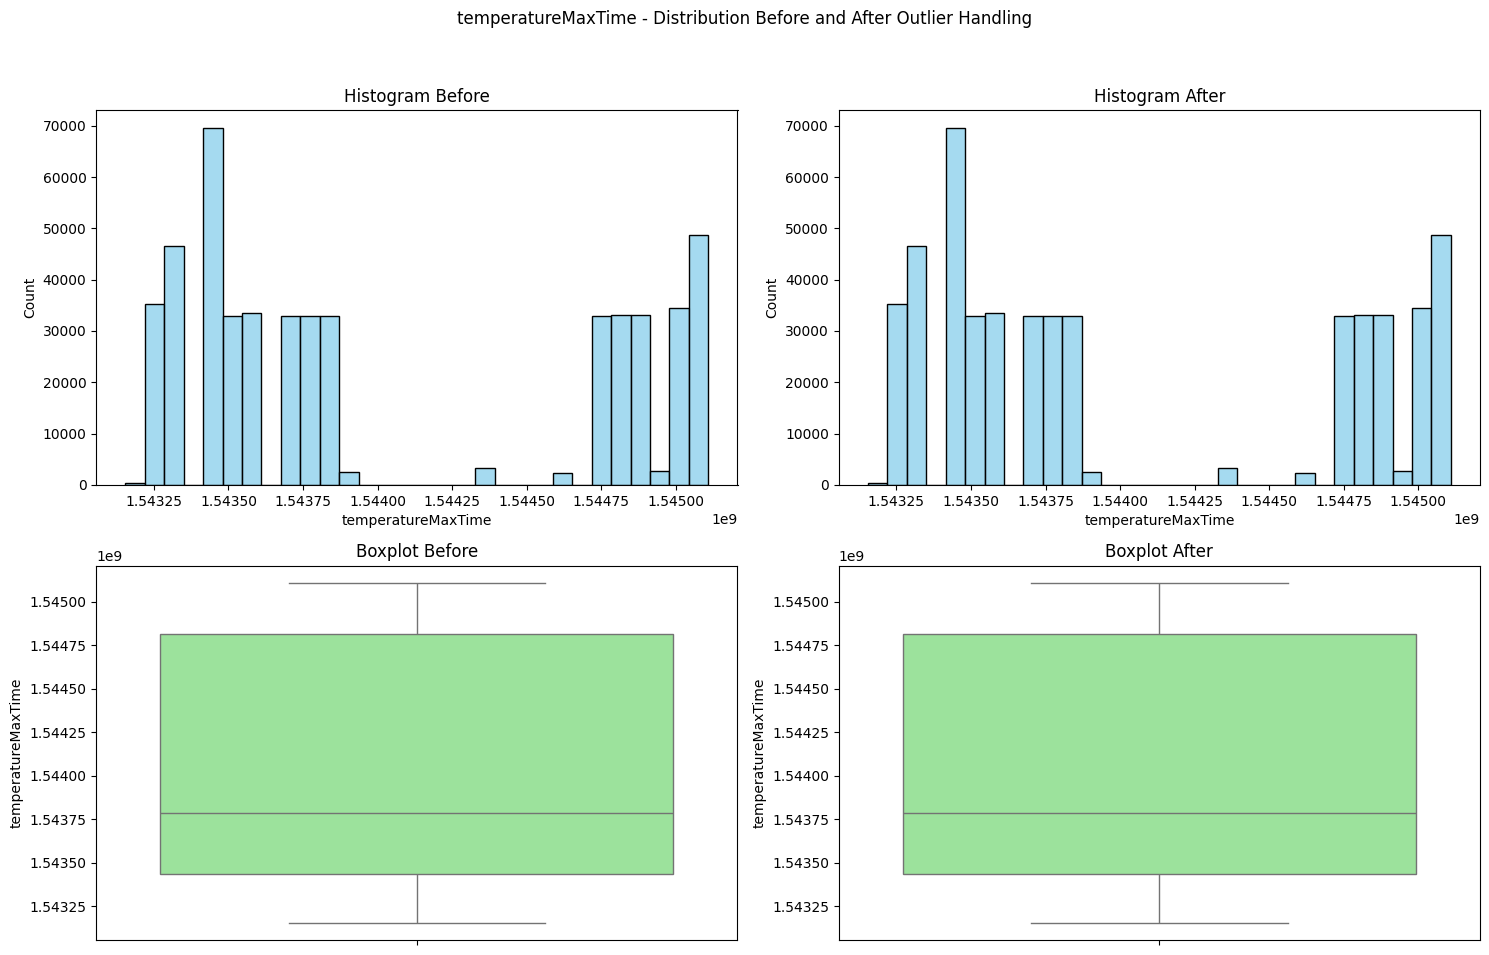

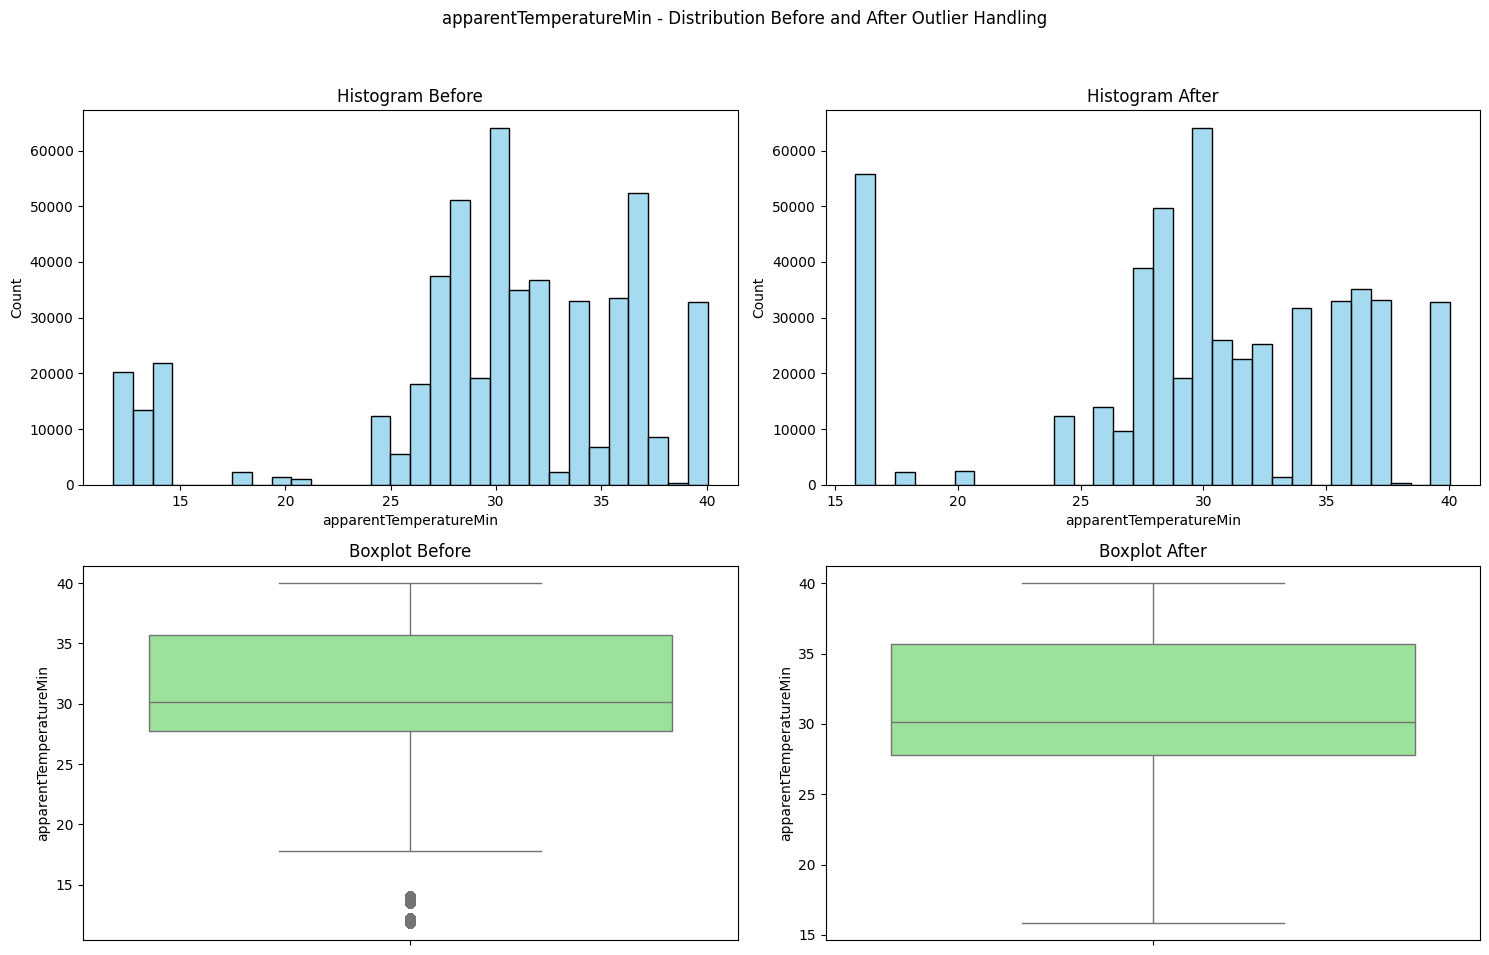

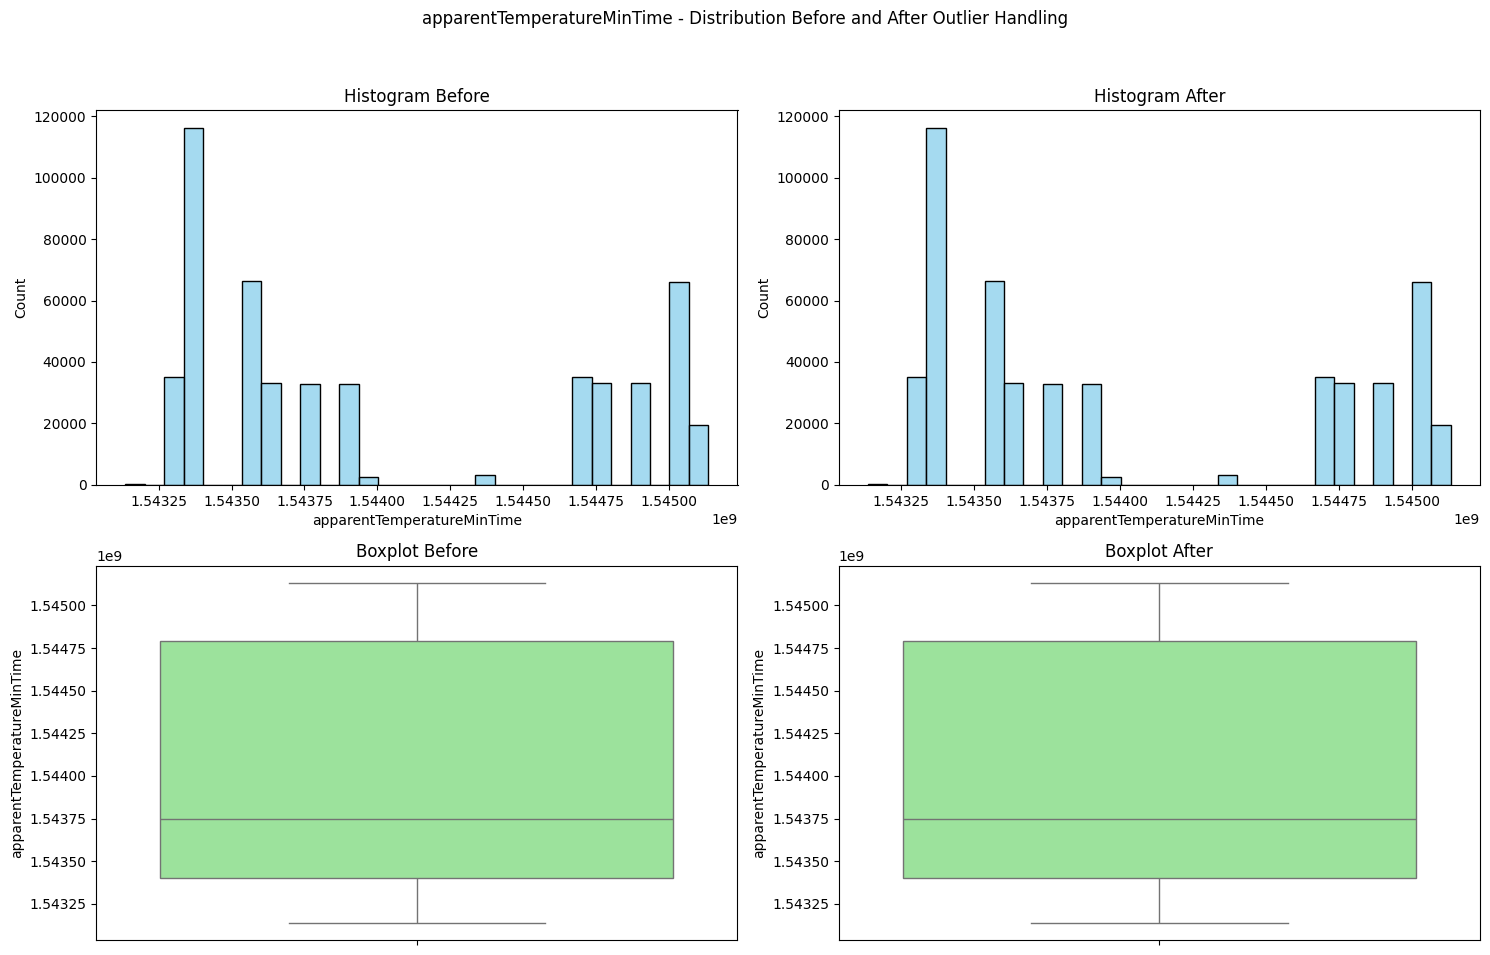

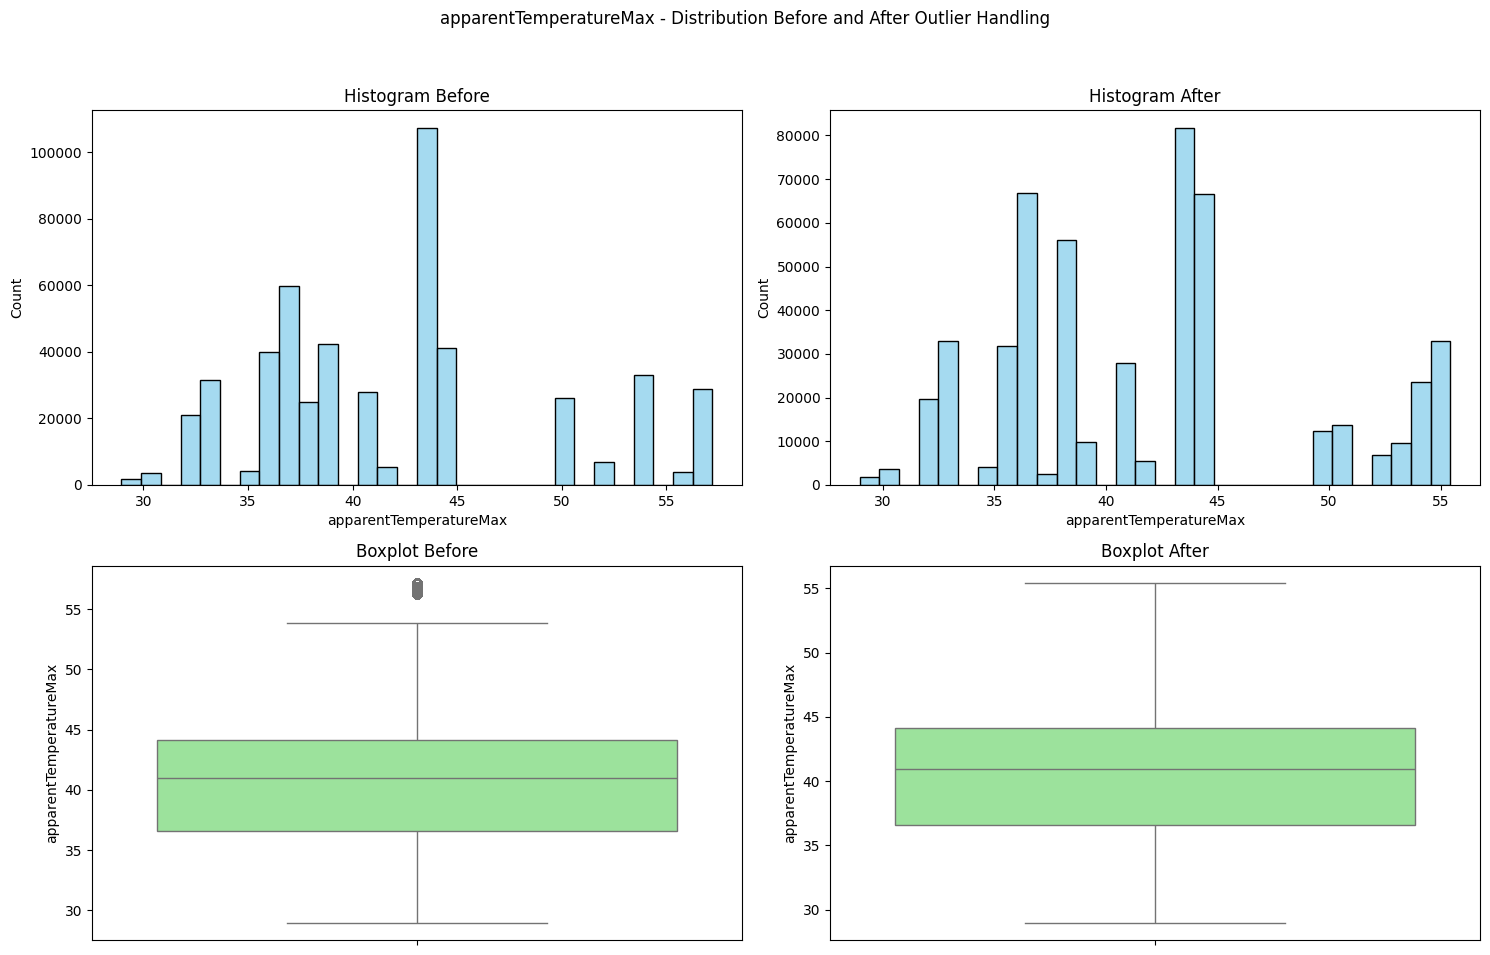

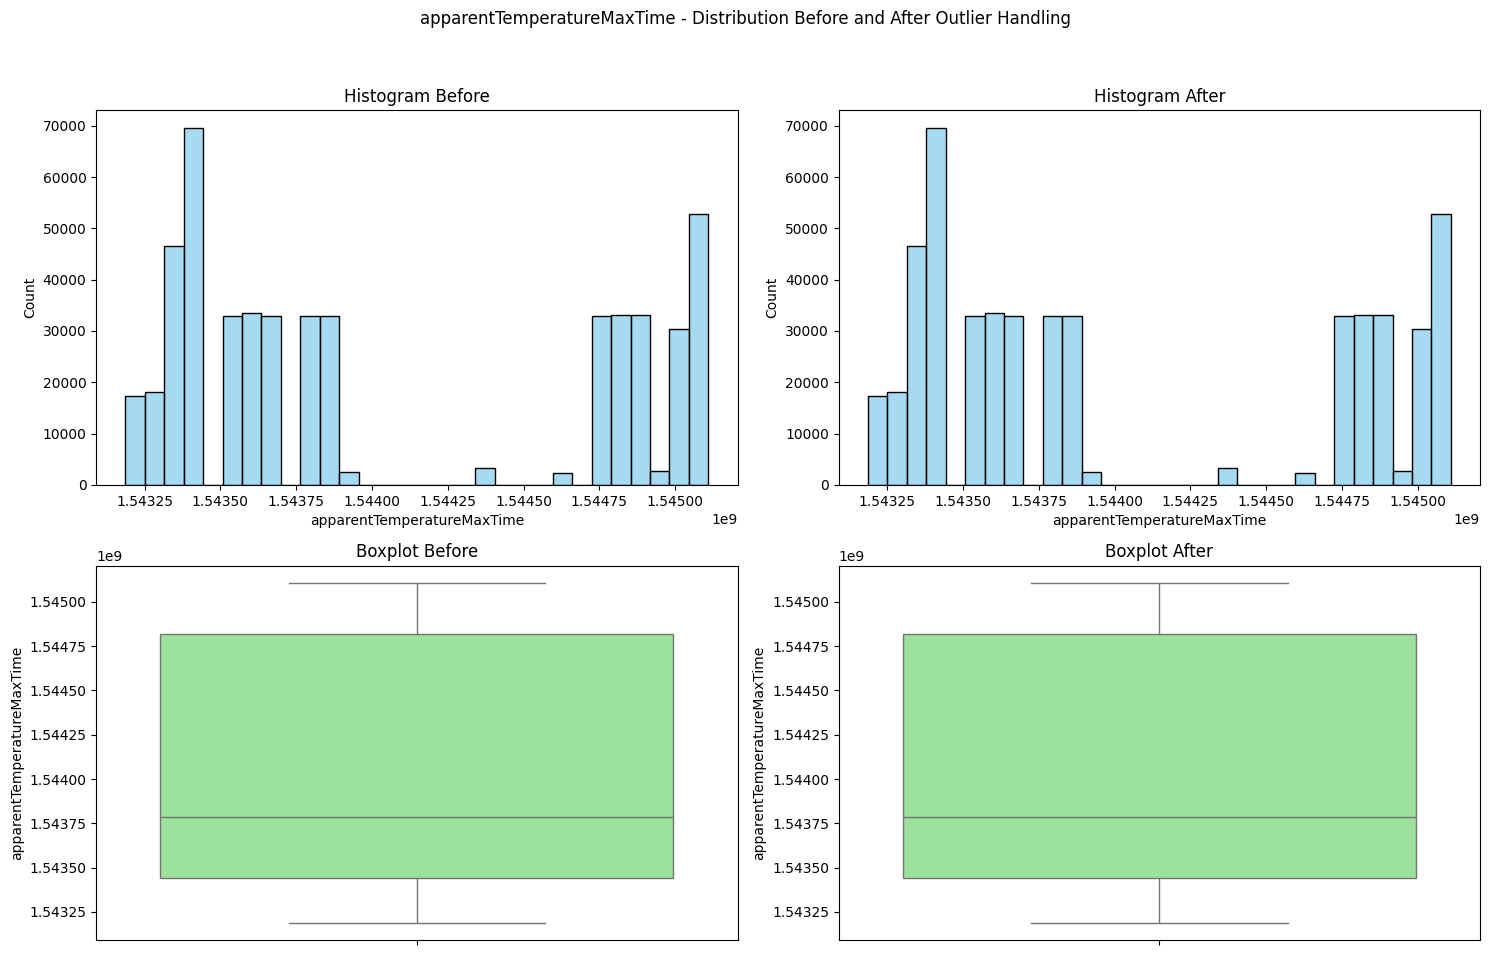

In [48]:
# Using the Function
num_cols = kolom_numerik 
for col in num_cols:
    outlier_handling_plot_comparison(X_train_cleaned, X_train_capped, col)

## Split Data Numerikal dan Kategorikal

In [49]:
# column numeric list
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
# column categorical list
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

print('Numerical List: ', num_columns)
print('Catgorical List: ', cat_columns)

Numerical List:  ['timestamp', 'hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
Catgorical List:  ['datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [50]:
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [51]:
# cek ukuran
print('Train Data')
print('Ukuran X_train_num : ', X_train_num.shape)
print('Ukuran X_train_Cat : ', X_train_cat.shape)
print('')
print('Test Data')
print('Ukuran X_test_num : ', X_test_num.shape)
print('Ukuran X_test_cat : ', X_test_cat.shape)

Train Data
Ukuran X_train_num :  (509690, 45)
Ukuran X_train_Cat :  (509690, 10)

Test Data
Ukuran X_test_num :  (127632, 45)
Ukuran X_test_cat :  (127632, 10)


## Feature Selection

### Categories Feature

In [52]:
# Finding the correlation between categorical columns and 'price' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

cat_corr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

cat_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,datetime,0.000158,8.682786e-01,No Significant Correlation
1,timezone,NaN,NaN,No Significant Correlation
2,source,-0.013007,1.678948e-39,Significant Correlation
3,destination,-0.031933,1.123328e-228,Significant Correlation
4,cab_type,-0.057270,0.000000e+00,Significant Correlation
5,product_id,0.051517,0.000000e+00,Significant Correlation
6,name,-0.397117,0.000000e+00,Significant Correlation
7,short_summary,0.000991,3.394201e-01,No Significant Correlation
8,long_summary,0.000514,6.161421e-01,No Significant Correlation
9,icon,0.001430,1.700313e-01,No Significant Correlation


In [53]:
cat_corr[cat_corr['Interpretation'] == "Significant Correlation"]

,Column Name,Correlation Coefficient,P-value,Interpretation
2,source,-0.013007,1.678948e-39,Significant Correlation
3,destination,-0.031933,1.123328e-228,Significant Correlation
4,cab_type,-0.057270,0.000000e+00,Significant Correlation
5,product_id,0.051517,0.000000e+00,Significant Correlation
6,name,-0.397117,0.000000e+00,Significant Correlation


Karena Product_id berisi nilai unik(high cardinality), saya tidak akan menggunakannya. Sebaliknya kolom yang dipilih dari kategorikal hanya akan digunakan
- source, destination, cab_type, name

### Numerical Feature

In [54]:
# Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

num_corr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

num_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,timestamp,0.000900,0.520513,No Significant Correlation
1,hour,0.001351,0.334752,No Significant Correlation
2,day,0.000143,0.918478,No Significant Correlation
3,month,0.000363,0.795474,No Significant Correlation
4,distance,0.334038,0.000000,Significant Correlation
5,surge_multiplier,0.165873,0.000000,Significant Correlation
6,latitude,0.003067,0.028538,Significant Correlation
7,longitude,-0.002159,0.123167,No Significant Correlation
8,temperature,-0.000526,0.707222,No Significant Correlation
9,apparentTemperature,-0.000724,0.605401,No Significant Correlation


In [55]:
num_corr[num_corr['Interpretation'] == "Significant Correlation"]

,Column Name,Correlation Coefficient,P-value,Interpretation
4,distance,0.334038,0.000000,Significant Correlation
5,surge_multiplier,0.165873,0.000000,Significant Correlation
6,latitude,0.003067,0.028538,Significant Correlation


Dalam korelasi kenaikan harga windBearing, moon phase tidak ada kaitannya secara langsung atau tidak sama sekali, jadi saya drop kolom tersebut.
- distance dan surge_multiplier yang diagunakan

<Axes: >

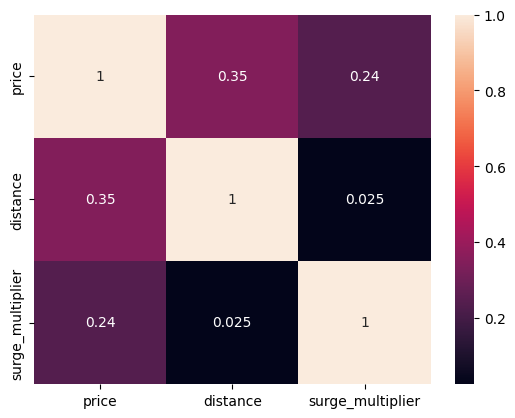

In [56]:
# Visualisasi heatmap korelasi 
sns.heatmap(df[['price','distance','surge_multiplier']].corr(),annot=True)

Dari visualisasi korelasinya  cukup rendah, saya abaikan untuk sekarang

#### Membuat variable baru Untuk Feature yang berkolerasi

In [57]:
# Membuat list Feature berkorelasi dari numerikal dan kategorikal
selected_col_cat = ['cab_type','name','source','destination']
selected_col_num = ['distance','surge_multiplier']

In [58]:
# append ke x_train dan X_test
X_train_cat = X_train_cat[selected_col_cat]
X_train_num = X_train_num[selected_col_num]

X_test_cat = X_test_cat[selected_col_cat]
X_test_num = X_test_num[selected_col_num]

In [59]:
# Checking the categorical data
X_train_cat

,cab_type,name,source,destination
590817,Uber,Black,Theatre District,South Station
575385,Lyft,Lux Black,North End,North Station
330586,Uber,UberX,Back Bay,Fenway
505682,Lyft,Lyft,North Station,Boston University
387028,Lyft,Lyft,Haymarket Square,Back Bay
...,...,...,...,...
259351,Lyft,Lux Black XL,Fenway,Financial District
366156,Uber,UberXL,Financial District,Boston University
131964,Uber,Black,North Station,Northeastern University
672152,Lyft,Lux Black XL,Beacon Hill,Haymarket Square


In [60]:
# Checking the numerical data
X_train_num

,distance,surge_multiplier
590817,0.550,1.0
575385,1.010,1.0
330586,1.340,1.0
505682,3.100,1.0
387028,2.380,1.0
...,...,...
259351,4.380,1.0
366156,5.405,1.0
131964,3.300,1.0
672152,1.310,1.0


### Scaling dan Encoding

#### Scaling

In [61]:
# Scaling menggunakan Standar Scaler karena lebih cocok untuk model linear regression 

#Initialize the Standar Scaler
scaler = StandardScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## only fit in train
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-1.4783949 , -0.15837441],
       [-1.0612326 , -0.15837441],
       [-0.76196399, -0.15837441],
       ...,
       [ 1.01551017, -0.15837441],
       [-0.78917023, -0.15837441],
       [-0.75289525, -0.15837441]])

#### Encoding 

In [62]:
dummp1 = X_train_cat.copy()
dummp2 = X_test_cat.copy()

In [63]:
# Menggunakan One Hot Encoder karena fitur kategorikal kami tampaknya tidak memiliki hierarki yang ditentukan

#Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)


#Fit_transform for X_train, transform for X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


#Fit_transform for X_train, transform for X_test

X_train_cat_encoded

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### Concatenate Categorical and Numerical

In [64]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded],axis=1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [65]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.478395,-0.158374,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.061233,-0.158374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.761964,-0.158374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.834135,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.181186,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509685,1.994935,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509686,2.924481,-0.158374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509687,1.015510,-0.158374,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
509688,-0.789170,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.453248,-0.158374,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.299079,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.151920,-0.158374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.043095,-0.158374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.910878,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127627,1.659391,7.680982,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127628,1.097129,-0.158374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127629,-0.517108,-0.158374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127630,0.480454,-0.158374,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


---

# vi. Model Definition

In [67]:
# inisialisasi model
model_linreg = LinearRegression()

---

# vii. Model Training

In [68]:
# fitting model train
model_linreg.fit(X_train_final, y_train)

LinearRegression()

---

## 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

##### coefficients/slope dan intercept
- coefisien atau slope menunjukan seberapakuat hubungan antara feature dan target. nilai positif ketika X naik maka y cenderung naik, jika nilai negatif x naik maka y cenderung turun.
- intercept titik awal garis yang mana menunjukan nilai y ketika X bernilai nol.

In [69]:
# Check coefficients and intercept

coefficients = model_linreg.coef_
intercept = model_linreg.intercept_

params = {
    'feature': X_train_final.columns.tolist(),
    'coefficient': model_linreg.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  -57372554571.71829


,feature,coefficient
0,0,3.336838e+00
1,1,1.759463e+00
2,2,-1.307016e+10
3,3,4.845205e+10
4,4,2.296534e+10
5,5,2.296534e+10
6,6,8.448755e+10
7,7,8.448755e+10
8,8,8.448755e+10
9,9,8.448755e+10


Untuk nilai intercept -93 dalam prediksi harga itu tidak masuk akal sehingga tidak dapat di interpretasikan. Slope/coef adanya peningkatan dan penurunan harga bisa dilihat dalam positif kah atau negatif dengan melihat pola perubahan di Feature



---

# viii. Model Evaluation

In [70]:
# model evaluasi Train set
y_pred_train = model_linreg.predict(X_train_final)

# model evaluasi Test set
y_pred_test = model_linreg.predict(X_test_final)

In [71]:
y_pred_train

array([16.01689148, 19.496521  ,  6.7146759 , ..., 23.88119507,
       28.8097229 , 12.99952698])

In [72]:
y_pred_test

array([18.56018066,  9.47129822, 11.9306488 , ...,  8.70759583,
       33.21081543, 10.45858765])

In [73]:
y_test.shape

(127632,)

In [74]:
y_pred_train.shape

(509690,)

In [75]:
# Model Evaluation using RMSE dan R2 score.

print('RMSE - Train Set : ', root_mean_squared_error(y_train, y_pred_train))
print('RMSE - Test Set  : ', root_mean_squared_error(y_test, y_pred_test))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

RMSE - Train Set :  2.4833042615608965
RMSE - Test Set  :  2.465050435118111

R2 Score - Train Set :  0.9291157917555006
R2 Score - Test Set  :  0.930012768508604


Dalam kasus ini, Saya menggunakan RMSE karena bebrapa alasan:
- mudah diinterpretasikan kepada user yang tidak terbiasa dengan terminologi statistik yang lebih kompleks
- sensitive outlier cocok untuk model linear regression
- optimasi model menghasilkan nilai kontinu (Kontinuitas), mengurangi eror sekecil mungkin 
- Tujuan bisnis ini mengurangi kesalahan prediksi harga agar tidak merugikan perusahaan UBER ATAU LYFT


R2 score sebagai tambahan untuk membantu dalam Evaluasi

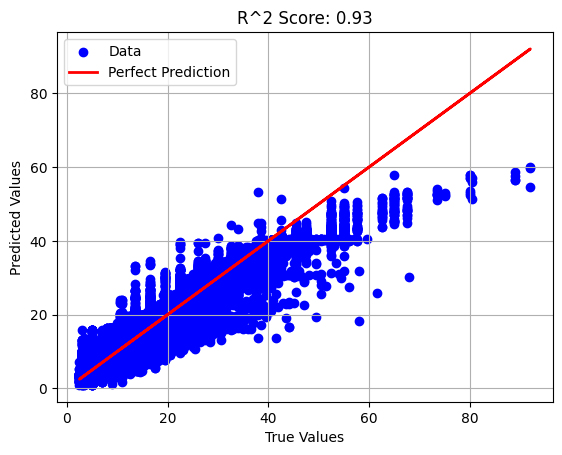

In [76]:
# Plot evaluasi model dengan R2 Score
r2 = r2_score(y_test, y_pred_test)

# plot data
plt.figure()
plt.scatter(y_test, y_pred_test, c='blue', label='Data')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R^2 Score: {r2:.2f}')
plt.legend()
plt.grid(True)
plt.show()

Dalam plot bisa di katakan menyimpang, namun dalam model evaluasi RMSE bisa di katakan bagus yaitu good fit dan mendekati 0 untuk Erorr nya.
selanjutnya mungkin bisa di imnprove dangan hyperparameter dan mecoba model lain yang sesuai

In [77]:
# Evaluasi model dengan asumsi Multivariate Normality

# get residual
y_test_residuals = y_test - y_pred_test
y_test_residuals

548431    0.939819
67345     1.028702
502918   -0.430649
453199    0.032394
655038    3.989502
            ...   
555464    6.219757
203760   -1.586945
592252   -0.707596
620963    0.789185
295621    0.541412
Name: price, Length: 127632, dtype: float64

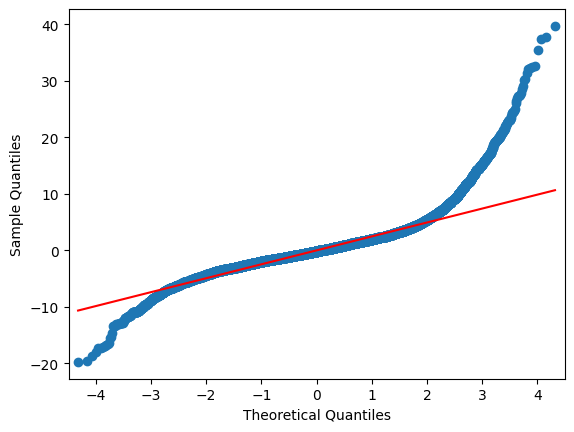

In [78]:
# Plot QQ plot residual

sm.qqplot(y_test_residuals, line ='s')
plt.show()

Terlihat bahwa pattren atau pola dari residual tidak mendekati garis linear sehingga Multivariate Normality tidak terpenuhi

---

# ix. Model Saving

In [79]:
#Model saving

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(selected_col_num, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(selected_col_cat, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model.pkl', 'wb') as file_5:
  pickle.dump(model_linreg, file_5)

---

# x. Model Inference

In [80]:

# Load model and other files

with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

with open("model.pkl", "rb") as file_3:
  model = pickle.load(file_3)

with open("scaler.pkl", "rb") as file_4:
  scaler = pickle.load(file_4)

with open("encoder.pkl", "rb") as file_5:
  encoder = pickle.load(file_5)

In [ ]:
# Making a randomized dataset for inference

data_inf = [{'id': 'd5db3269-4d95-493d-9c36-df94c9e97b7b',
 'timestamp': 1543685583.0,
 'hour': 10,
 'day': 14,
 'month': 12,
 'datetime': '2018-12-14 10:11:12',
 'timezone': 'America/New_York',
 'source': 'Northeastern University',
 'destination': 'Financial District',
 'cab_type': 'Lyft',
 'product_id': 'lyft_line',
 'name': 'Shared',
 'distance': 4.55,
 'surge_multiplier': 2.0,
 'latitude': 42.3647,
 'longitude': -71.0542,
 'temperature': 38.95,
 'apparentTemperature': 35.84,
 'short_summary': ' Possible Drizzle ',
 'long_summary': ' Light rain until evening. ',
 'precipIntensity': 0.1264,
 'precipProbability': 1.0,
 'humidity': 0.94,
 'windSpeed': 9.42,
 'windGust': 12,
 'windGustTime': 1543672800,
 'visibility': 4.786,
 'temperatureHigh': 44.54,
 'temperatureHighTime': 1543438800,
 'temperatureLow': 35.75,
 'temperatureLowTime': 1543712400,
 'apparentTemperatureHigh': 43.87,
 'apparentTemperatureHighTime': 1543690800,
 'apparentTemperatureLow': 35.99,
 'apparentTemperatureLowTime': 1543921200,
 'icon': ' rain ',
 'dewPoint': 44.66,
 'pressure': 1007.94,
 'windBearing': 333,
 'cloudCover': 0.54,
 'uvIndex': 0,
 'visibility.1': 9.987,
 'ozone': 278.4,
 'sunriseTime': 1545048523,
 'sunsetTime': 1544908439,
 'moonPhase': 0.88,
 'precipIntensityMax': 0.0222,
 'uvIndexTime': 1543770000,
 'temperatureMin': 28.99,
 'temperatureMinTime': 1543402800,
 'temperatureMax': 42.24,
 'temperatureMaxTime': 1543320000,
 'apparentTemperatureMin': 29.11,
 'apparentTemperatureMinTime': 1544688000,
 'apparentTemperatureMax': 43.87,
 'apparentTemperatureMaxTime': 1543690800},
 {'id': '0ba5f4fa-bed2-4ec4-b166-69dc8409c190',
 'timestamp': 1543320922.0,
 'hour': 11,
 'day': 11,
 'month': 11,
 'datetime': '2018-11-11 11:11:11',
 'timezone': 'America/New_York',
 'source': 'Haymarket Square',
 'destination': 'West End',
 'cab_type': 'Uber',
 'product_id': '997acbb5-e102-41e1-b155-9df7de0a73f2',
 'name': 'UberPool',
 'distance': 0.61,
 'surge_multiplier': 1.25,
 'latitude': 42.3661,
 'longitude': -71.0631,
 'temperature': 45.84,
 'apparentTemperature': 44.34,
 'short_summary': ' Overcast ',
 'long_summary': ' Partly cloudy throughout the day. ',
 'precipIntensity': 0.0,
 'precipProbability': 0.0,
 'humidity': 0.48,
 'windSpeed': 7.77,
 'windGust': 5.55,
 'windGustTime': 1545015600,
 'visibility': 10.0,
 'temperatureHigh': 44.44,
 'temperatureHighTime': 1544990400,
 'temperatureLow': 37.73,
 'temperatureLowTime': 1544443200,
 'apparentTemperatureHigh': 53.35,
 'apparentTemperatureHighTime': 1543611600,
 'apparentTemperatureLow': 36.63,
 'apparentTemperatureLowTime': 1544443200,
 'icon': ' clear-day ',
 'dewPoint': 21.12,
 'pressure': 1022.24,
 'windBearing': 88,
 'cloudCover': 0.01,
 'uvIndex': 1,
 'visibility.1': 10.0,
 'ozone': 321.1,
 'sunriseTime': 1544962118,
 'sunsetTime': 1543612470,
 'moonPhase': 0.69,
 'precipIntensityMax': 0,
 'uvIndexTime': 1544979600,
 'temperatureMin': 33.33,
 'temperatureMinTime': 1544353200,
 'temperatureMax': 55.55,
 'temperatureMaxTime': 1543320000,
 'apparentTemperatureMin': 34.56,
 'apparentTemperatureMinTime': 1543438800,
 'apparentTemperatureMax': 49.94,
 'apparentTemperatureMaxTime': 1544378400}]

data_inf = pd.DataFrame(data_inf)
data_inf.head()

#### Splitting Dataset Into Categorical and Numerical Columns

In [ ]:
#Splitting the dataset into categorical and numerical columns

data_infNum = data_inf[list_num_col]
data_infCat = data_inf[list_cat_col]

#### Scaling and Encoding

In [ ]:
# Scaling the numerical features, encoding the categorical features, and concatenating them back again

data_inf_scaled_num = scaler.transform(data_infNum)
data_inf_cat_encoded = encoder.transform(data_infCat)
data_inference_final = np.concatenate([data_inf_scaled_num, data_inf_cat_encoded], axis = 1)

#### Predicting

In [ ]:
#Predicting

y_pred_inference = model.predict(data_inference_final)
y_pred_inference

array([31.45135498,  8.98527527])

model berjalan dengan baik

---

# xi. Pengambilan Kesimpulan

### Conclusions

Model Analysis

Hasil model bisa di katakan cukup baik bisa dilihat dari nilai residual/ nilai erorr selisih 2 (mendekati nol) dan dari train - test tidak ada selisih signifikan artinya good fit. dalam R2 score juga dikatakan baik namun dalam plot qq ada penyimpangan dari garis predict dengan scatter.
model yang dibuat harus di lakukan perbaikan (improvement) yaitu:
- feature engineering (scaling, encoding, feature selection, dll), 
- menggunakan model algorithm lain seperti sgdregressor(gradient decent), polinomial regression(non-linear) dan lain-lain,
- dan melakukan tuning parmeter.

EDA insight

Dari analysis yang saya temukan sebegai berikut:
- bahwa Uber lebih dominan dari Lyft (customer lebih banyak di uber), bisa di jelaskan dari distribusi data,adapun penjelasan lain seperti price uber cenderung lebih rendah dari lyft.
- Dari name service shared lyft populer 
- Dari distribusi trend time analysis ada penurunan di tanggal 4, 9 dan 10 dan kenaikan di tanggal 27. dari dataset hanya bulan 11 dan 12, di bulan 12 memilki kenaikan tinggi
- Dari distribusi destination dan source tidak ada pola mana yang lebih banyak atau sedikit

Bisnis insight

Perbandingan Uber dan Lyft, keunggulan *uber* dari segi harga cukup rendah sedangkan keunggulan lyft *service shared lyft* populer.

Bisnis suggestion
- Malakukan promotion discount di tanggal 4,9,10 untuk meningkatkan minat customer
- Melakukan target marketing dengan cara customer segmentasi berdasarkan destination atau source
- Menambah service yang shared yang lebih baik atau meningkatkan visibilitas dan promosi layanan tersebut
- Melakukan promotion seasonal di bulan desember  
